In [1]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load BASELINE RESULTS

import pickle

with open("results_self_i_k",'rb') as f:
    results_self_i_K = pickle.load(f)
with open("results_imports_i_k",'rb') as f:
    results_imports_i_K = pickle.load(f)
with open("results_self_i_l",'rb') as f:
    results_self_i_L = pickle.load(f)
with open("results_imports_i_l",'rb') as f:
    results_imports_i_L = pickle.load(f)
    
with open("results_self_a_k",'rb') as f:
    results_self_a_K = pickle.load(f)
with open("results_imports_a_k",'rb') as f:
    results_imports_a_K = pickle.load(f)
with open("results_self_a_l",'rb') as f:
    results_self_a_L = pickle.load(f)
with open("results_imports_a_l",'rb') as f:
    results_imports_a_L = pickle.load(f)
    
results_imports_i = {ba: (results_imports_i_K[ba],results_imports_i_L[ba]) for ba in results_imports_i_K}
results_self_i = {ba: (results_self_i_K[ba],results_self_i_L[ba]) for ba in results_self_i_K}
results_imports_a = {ba: (results_imports_a_K[ba],results_imports_a_L[ba]) for ba in results_imports_a_K}
results_self_a = {ba: (results_self_a_K[ba],results_self_a_L[ba]) for ba in results_self_a_K}

In [3]:
#Load NO GAS RESULTS

with open("results_self_gas_i_k",'rb') as f:
    results_self_i_K_gas = pickle.load(f)
with open("results_imports_gas_i_k",'rb') as f:
    results_imports_i_K_gas = pickle.load(f)
with open("results_self_gas_i_l",'rb') as f:
    results_self_i_L_gas = pickle.load(f)
with open("results_imports_gas_i_l",'rb') as f:
    results_imports_i_L_gas = pickle.load(f)
    
with open("results_self_gas_a_k",'rb') as f:
    results_self_a_K_gas = pickle.load(f)
with open("results_imports_gas_a_k",'rb') as f:
    results_imports_a_K_gas = pickle.load(f)
with open("results_self_gas_a_l",'rb') as f:
    results_self_a_L_gas = pickle.load(f)
with open("results_imports_gas_a_l",'rb') as f:
    results_imports_a_L_gas = pickle.load(f)
    
results_imports_i_gas = {ba: (results_imports_i_K_gas[ba],results_imports_i_L_gas[ba]) for ba in results_imports_i_K_gas}
results_self_i_gas = {ba: (results_self_i_K_gas[ba],results_self_i_L_gas[ba]) for ba in results_self_i_K_gas}
results_imports_a_gas = {ba: (results_imports_a_K_gas[ba],results_imports_a_L_gas[ba]) for ba in results_imports_a_K_gas}
results_self_a_gas = {ba: (results_self_a_K_gas[ba],results_self_a_L_gas[ba]) for ba in results_self_a_K_gas}

In [4]:
#Load NO COAL RESULTS

with open("results_self_coal_i_k",'rb') as f:
    results_self_i_K_coal = pickle.load(f)
with open("results_imports_coal_i_k",'rb') as f:
    results_imports_i_K_coal = pickle.load(f)
with open("results_self_coal_i_l",'rb') as f:
    results_self_i_L_coal = pickle.load(f)
with open("results_imports_coal_i_l",'rb') as f:
    results_imports_i_L_coal = pickle.load(f)
    
with open("results_self_coal_a_k",'rb') as f:
    results_self_a_K_coal = pickle.load(f)
with open("results_imports_coal_a_k",'rb') as f:
    results_imports_a_K_coal = pickle.load(f)
with open("results_self_coal_a_l",'rb') as f:
    results_self_a_L_coal = pickle.load(f)
with open("results_imports_coal_a_l",'rb') as f:
    results_imports_a_L_coal = pickle.load(f)
    
results_imports_i_coal = {ba: (results_imports_i_K_coal[ba],results_imports_i_L_coal[ba]) for ba in results_imports_i_K_coal}
results_self_i_coal = {ba: (results_self_i_K_coal[ba],results_self_i_L_coal[ba]) for ba in results_self_i_K_coal}
results_imports_a_coal = {ba: (results_imports_a_K_coal[ba],results_imports_a_L_coal[ba]) for ba in results_imports_a_K_coal}
results_self_a_coal = {ba: (results_self_a_K_coal[ba],results_self_a_L_coal[ba]) for ba in results_self_a_K_coal}

In [5]:
#Load COAL2GAS RESULTS

with open("results_self_coal2gas_i_k",'rb') as f:
    results_self_i_K_coal2gas = pickle.load(f)
with open("results_imports_coal2gas_i_k",'rb') as f:
    results_imports_i_K_coal2gas = pickle.load(f)
with open("results_self_coal2gas_i_l",'rb') as f:
    results_self_i_L_coal2gas = pickle.load(f)
with open("results_imports_coal2gas_i_l",'rb') as f:
    results_imports_i_L_coal2gas = pickle.load(f)
    
with open("results_self_coal2gas_a_k",'rb') as f:
    results_self_a_K_coal2gas = pickle.load(f)
with open("results_imports_coal2gas_a_k",'rb') as f:
    results_imports_a_K_coal2gas = pickle.load(f)
with open("results_self_coal2gas_a_l",'rb') as f:
    results_self_a_L_coal2gas = pickle.load(f)
with open("results_imports_coal2gas_a_l",'rb') as f:
    results_imports_a_L_coal2gas = pickle.load(f)
    
results_imports_i_coal2gas = {ba: (results_imports_i_K_coal2gas[ba],results_imports_i_L_coal2gas[ba]) for ba in results_imports_i_K_coal2gas}
results_self_i_coal2gas = {ba: (results_self_i_K_coal2gas[ba],results_self_i_L_coal2gas[ba]) for ba in results_self_i_K_coal2gas}
results_imports_a_coal2gas = {ba: (results_imports_a_K_coal2gas[ba],results_imports_a_L_coal2gas[ba]) for ba in results_imports_a_K_coal2gas}
results_self_a_coal2gas = {ba: (results_self_a_K_coal2gas[ba],results_self_a_L_coal2gas[ba]) for ba in results_self_a_K_coal2gas}

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [6]:
#Load COALCCS RESULTS

with open("results_self_coalCCS_i_k",'rb') as f:
    results_self_i_K_coalCCS = pickle.load(f)
with open("results_imports_coalCCS_i_k",'rb') as f:
    results_imports_i_K_coalCCS = pickle.load(f)
with open("results_self_coalCCS_i_l",'rb') as f:
    results_self_i_L_coalCCS = pickle.load(f)
with open("results_imports_coalCCS_i_l",'rb') as f:
    results_imports_i_L_coalCCS = pickle.load(f)
    
with open("results_self_coalCCS_a_k",'rb') as f:
    results_self_a_K_coalCCS = pickle.load(f)
with open("results_imports_coalCCS_a_k",'rb') as f:
    results_imports_a_K_coalCCS = pickle.load(f)
with open("results_self_coalCCS_a_l",'rb') as f:
    results_self_a_L_coalCCS = pickle.load(f)
with open("results_imports_coalCCS_a_l",'rb') as f:
    results_imports_a_L_coalCCS = pickle.load(f)
    
results_imports_i_coalCCS = {ba: (results_imports_i_K_coalCCS[ba],results_imports_i_L_coalCCS[ba]) for ba in results_imports_i_K_coalCCS}
results_self_i_coalCCS = {ba: (results_self_i_K_coalCCS[ba],results_self_i_L_coalCCS[ba]) for ba in results_self_i_K_coalCCS}
results_imports_a_coalCCS = {ba: (results_imports_a_K_coalCCS[ba],results_imports_a_L_coalCCS[ba]) for ba in results_imports_a_K_coalCCS}
results_self_a_coalCCS = {ba: (results_self_a_K_coalCCS[ba],results_self_a_L_coalCCS[ba]) for ba in results_self_a_K_coalCCS}

In [7]:
#Load GASCCS RESULTS

with open("results_self_gasCCS_i_k",'rb') as f:
    results_self_i_K_gasCCS = pickle.load(f)
with open("results_imports_gasCCS_i_k",'rb') as f:
    results_imports_i_K_gasCCS = pickle.load(f)
with open("results_self_gasCCS_i_l",'rb') as f:
    results_self_i_L_gasCCS = pickle.load(f)
with open("results_imports_gasCCS_i_l",'rb') as f:
    results_imports_i_L_gasCCS = pickle.load(f)
    
with open("results_self_gasCCS_a_k",'rb') as f:
    results_self_a_K_gasCCS = pickle.load(f)
with open("results_imports_gasCCS_a_k",'rb') as f:
    results_imports_a_K_gasCCS = pickle.load(f)
with open("results_self_gasCCS_a_l",'rb') as f:
    results_self_a_L_gasCCS = pickle.load(f)
with open("results_imports_gasCCS_a_l",'rb') as f:
    results_imports_a_L_gasCCS = pickle.load(f)
    
results_imports_i_gasCCS = {ba: (results_imports_i_K_gasCCS[ba],results_imports_i_L_gasCCS[ba]) for ba in results_imports_i_K_gasCCS}
results_self_i_gasCCS = {ba: (results_self_i_K_gasCCS[ba],results_self_i_L_gasCCS[ba]) for ba in results_self_i_K_gasCCS}
results_imports_a_gasCCS = {ba: (results_imports_a_K_gasCCS[ba],results_imports_a_L_gasCCS[ba]) for ba in results_imports_a_K_gasCCS}
results_self_a_gasCCS = {ba: (results_self_a_K_gasCCS[ba],results_self_a_L_gasCCS[ba]) for ba in results_self_a_K_gasCCS}

In [8]:
#Load GASCCS RESULTS

with open("results_self_coal2gasCCS_i_k",'rb') as f:
    results_self_i_K_coal2gasCCS = pickle.load(f)
with open("results_imports_coal2gasCCS_i_k",'rb') as f:
    results_imports_i_K_coal2gasCCS = pickle.load(f)
with open("results_self_coal2gasCCS_i_l",'rb') as f:
    results_self_i_L_coal2gasCCS = pickle.load(f)
with open("results_imports_coal2gasCCS_i_l",'rb') as f:
    results_imports_i_L_coal2gasCCS = pickle.load(f)
    
with open("results_self_coal2gasCCS_a_k",'rb') as f:
    results_self_a_K_coal2gasCCS = pickle.load(f)
with open("results_imports_coal2gasCCS_a_k",'rb') as f:
    results_imports_a_K_coal2gasCCS = pickle.load(f)
with open("results_self_coal2gasCCS_a_l",'rb') as f:
    results_self_a_L_coal2gasCCS = pickle.load(f)
with open("results_imports_coal2gasCCS_a_l",'rb') as f:
    results_imports_a_L_coal2gasCCS = pickle.load(f)
    
results_imports_i_coal2gasCCS = {ba: (results_imports_i_K_coal2gasCCS[ba],results_imports_i_L_coal2gasCCS[ba]) for ba in results_imports_i_K_coal2gasCCS}
results_self_i_coal2gasCCS = {ba: (results_self_i_K_coal2gasCCS[ba],results_self_i_L_coal2gasCCS[ba]) for ba in results_self_i_K_coal2gasCCS}
results_imports_a_coal2gasCCS = {ba: (results_imports_a_K_coal2gasCCS[ba],results_imports_a_L_coal2gasCCS[ba]) for ba in results_imports_a_K_coal2gasCCS}
results_self_a_coal2gasCCS = {ba: (results_self_a_K_coal2gasCCS[ba],results_self_a_L_coal2gasCCS[ba]) for ba in results_self_a_K_coal2gasCCS}

In [9]:
def sort_BAs():

    Control_areas = gpd.read_file("Control_Areas.shp")
    centroids = Control_areas.centroid
    Control_areas["centroids"] = centroids
    Control_areas.head()


    Control_areas["latitude"] = Control_areas.centroids.apply(lambda c: c.y)
    Control_areas["longitude"] = Control_areas.centroids.apply(lambda c: c.x)
    #Control_areas.length
    Control_areas.head()
    BAs_sort = pd.DataFrame(Control_areas.loc[:,["NAME","latitude","longitude"]])
    BAs_sort.head()
    BAs_sort.rename(columns={"NAME":"BANAME"}, inplace=True)

    BA = pd.read_csv("ba_tz.csv")
    BA["BANAME"]=BA["BANAME"].str.upper()
    BA.head()

    BAs_sort = pd.merge(BAs_sort, BA, on="BANAME")
    BAs_sort.sort_values(by=["longitude","latitude"], inplace=True)
    BAs_sort.drop_duplicates(subset="BACODE",inplace=True)

    return BAs_sort

In [10]:
def create_matrices(BAs_sort, deaths, responsible_BAs, affected_BAs, model_choice, CR, csv_flag):
    #rows = importing_codes = BA causing damage
    #columns = codes = BA where deaths occur

    affected_BAs = set(affected_BAs)
    codes = [BA for BA in BAs_sort["BACODE"] if BA in affected_BAs]
    #print("codes")
    #print(codes)
    
    matrices = {}

    importing_codes = [BA for BA in BAs_sort["BACODE"] if BA in deaths]

    deaths_df = pd.DataFrame(index=importing_codes,columns=codes)
    #print(deaths_df.columns)
    deaths_df_pc = pd.DataFrame(index=importing_codes,columns=codes)
    
   
    for ba_row in importing_codes:
        for ba_col in codes:
            deaths_df.loc[ba_row, ba_col] = deaths[ba_row]["results_BA"][deaths[ba_row]["results_BA"]["BACODE"]==ba_col]["Deaths"].values[0]
            deaths_df_pc.loc[ba_row, ba_col] = deaths[ba_row]["results_BA"][deaths[ba_row]["results_BA"]["BACODE"]==ba_col]["Deaths_pc"].values[0]
    
    #Make deaths per TWh imported/generated (in total) matrix
    deaths_df_pe = pd.DataFrame(index = importing_codes, columns = codes)
    for ba in importing_codes:
        #print(ba)
        TWh = deaths[ba]["generation"].sum()/1e6
        #print(TWh)
        deaths_df_pe.loc[ba,:] = deaths_df.loc[ba,:]/TWh

  
    if csv_flag == True:
        deaths_df.to_csv(f'~/Desktop/IMSR/deaths{model_choice}_{CR}_df_coal2gas.csv')
        deaths_df_pc.to_csv('~/Desktop/IMSR/deathsAPSCA_K_df_pc_coal2gas.csv')
        
    matrices["total_deaths"] = deaths_df
    matrices["deaths_pc"] = deaths_df_pc
    matrices["deaths_pe"] = deaths_df_pe
    
    return matrices

In [11]:
def calc_total_deaths_caused(BAs_sorted, results):
    BA_list = [BA for BA in BAs_sorted["BACODE"] if BA in results]
    #print(BA_list)
    total_deaths = {}
    deaths_twh = {}
    total_deaths_outside = {}
    deaths_twh_outside = {}
    
    for ba in BA_list:
        total_deaths[ba] = results[ba]["results_BA"]["Deaths"].sum()
        deaths_twh[ba] = results[ba]["results_BA"]["Deaths"].sum()/results[ba]["generation"].sum()*1e6
               
    #Calculate totals without self-damage
    total_deaths_outside = {}
    deaths_twh_outside = {}
    for ba in BA_list:
        total_deaths_outside[ba] = total_deaths[ba] - results[ba]["results_BA"][results[ba]["results_BA"]["BACODE"]==ba]["Deaths"].values[0]
        deaths_twh_outside[ba] = total_deaths_outside[ba]/results[ba]["generation"].sum()*1e6
    return total_deaths, deaths_twh, total_deaths_outside, deaths_twh_outside



In [12]:
def process_imports_and_self(results_imports, results_self,model_choice,level,CR):
    BAs_sort = sort_BAs()
    #print('sorted BAs')
    #print(BAs_sort)
    
    matrices_imports = create_matrices(BAs_sort, results_imports, BAs_sort, list(results_imports.values())[0]["results_BA"]["BACODE"].drop_duplicates(), "ismr","L",False) 
    matrices_self = create_matrices(BAs_sort, results_self, BAs_sort, list(results_self.values())[0]["results_BA"]["BACODE"].drop_duplicates(), "ismr","L", False)
    #print('Created matrices')
    #print(matrices_imports["total_deaths"])
    
    total_deaths_imports, deaths_twh_imports, total_deaths_out_imports, deaths_twh_out_imports = calc_total_deaths_caused(BAs_sort, results_imports)
    total_deaths_self, deaths_twh_self, total_deaths_out_self, deaths_twh_out_self = calc_total_deaths_caused(BAs_sort, results_self)

    
    
    total_self = {}
    total_imports = {}
    total_self["total_deaths"] = total_deaths_self
    total_self["deaths_twh"] = deaths_twh_self
    total_self["total_out"] = total_deaths_out_self
    total_self["deaths_twh_out"] = deaths_twh_out_self
    total_imports["total_deaths"] = total_deaths_imports
    total_imports["deaths_twh"] = deaths_twh_imports
    total_imports["total_out"] = total_deaths_out_imports
    total_imports["deaths_twh_out"] = deaths_twh_out_imports
    
    return  matrices_imports, matrices_self, total_imports, total_self

In [13]:
#BASELINE SCENARIO
matrices_imports_i_k, matrices_self_i_k, total_imports_i_k, total_self_i_k = process_imports_and_self(results_imports_i_K, results_self_i_K, "ismr","BA","K")
matrices_imports_i_l, matrices_self_i_l, total_imports_i_l, total_self_i_l = process_imports_and_self(results_imports_i_L, results_self_i_L, "ismr","BA","L")
matrices_imports_a_k, matrices_self_a_k, total_imports_a_k, total_self_a_k = process_imports_and_self(results_imports_a_K, results_self_a_K, "aspca_q0","BA","K")
matrices_imports_a_l, matrices_self_a_l, total_imports_a_l, total_self_a_l = process_imports_and_self(results_imports_a_L, results_self_a_L, "apsca_q0","BA","L")

#NO GAS SCENARIO
matrices_imports_i_k_gas, matrices_self_i_k_gas, total_imports_i_k_gas, total_self_i_k_gas = process_imports_and_self(results_imports_i_K_gas, results_self_i_K_gas, "ismr","BA","K")
matrices_imports_i_l_gas, matrices_self_i_l_gas, total_imports_i_l_gas, total_self_i_l_gas = process_imports_and_self(results_imports_i_L_gas, results_self_i_L_gas, "ismr","BA","L")
matrices_imports_a_k_gas, matrices_self_a_k_gas, total_imports_a_k_gas, total_self_a_k_gas = process_imports_and_self(results_imports_a_K_gas, results_self_a_K_gas, "apsca_q0","BA","K")
matrices_imports_a_l_gas, matrices_self_a_l_gas, total_imports_a_l_gas, total_self_a_l_gas = process_imports_and_self(results_imports_a_L_gas, results_self_a_L_gas, "apsca_q0","BA","L")

#NO COAL SCENARIO
matrices_imports_i_k_coal, matrices_self_i_k_coal, total_imports_i_k_coal, total_self_i_k_coal = process_imports_and_self(results_imports_i_K_coal, results_self_i_K_coal, "ismr","BA","K")
matrices_imports_i_l_coal, matrices_self_i_l_coal, total_imports_i_l_coal, total_self_i_l_coal = process_imports_and_self(results_imports_i_L_coal, results_self_i_L_coal, "ismr","BA","L")
matrices_imports_a_k_coal, matrices_self_a_k_coal, total_imports_a_k_coal, total_self_a_k_coal = process_imports_and_self(results_imports_a_K_coal, results_self_a_K_coal, "aspca_q0","BA","K")
matrices_imports_a_l_coal, matrices_self_a_l_coal, total_imports_a_l_coal, total_self_a_l_coal = process_imports_and_self(results_imports_a_L_coal, results_self_a_L_coal, "apsca_q0","BA","L")

#COAL2GAS SCENARIO
matrices_imports_i_k_coal2gas, matrices_self_i_k_coal2gas, total_imports_i_k_coal2gas, total_self_i_k_coal2gas = process_imports_and_self(results_imports_i_K_coal2gas, results_self_i_K_coal2gas, "ismr","BA","K")
matrices_imports_i_l_coal2gas, matrices_self_i_l_coal2gas, total_imports_i_l_coal2gas, total_self_i_l_coal2gas = process_imports_and_self(results_imports_i_L_coal2gas, results_self_i_L_coal2gas, "ismr","BA","L")
matrices_imports_a_k_coal2gas, matrices_self_a_k_coal2gas, total_imports_a_k_coal2gas, total_self_a_k_coal2gas = process_imports_and_self(results_imports_a_K_coal2gas, results_self_a_K_coal2gas, "apsca_q0","BA","K")
matrices_imports_a_l_coal2gas, matrices_self_a_l_coal2gas, total_imports_a_l_coal2gas, total_self_a_l_coal2gas = process_imports_and_self(results_imports_a_L_coal2gas, results_self_a_L_coal2gas, "apsca_q0","BA","L")

#COALCCS SCENARIO

matrices_imports_i_k_coalCCS, matrices_self_i_k_coalCCS, total_imports_i_k_coalCCS, total_self_i_k_coalCCS = process_imports_and_self(results_imports_i_K_coalCCS, results_self_i_K_coalCCS, "ismr","BA","K")
matrices_imports_i_l_coalCCS, matrices_self_i_l_coalCCS, total_imports_i_l_coalCCS, total_self_i_l_coalCCS = process_imports_and_self(results_imports_i_L_coalCCS, results_self_i_L_coalCCS, "ismr","BA","L")
matrices_imports_a_k_coalCCS, matrices_self_a_k_coalCCS, total_imports_a_k_coalCCS, total_self_a_k_coalCCS = process_imports_and_self(results_imports_a_K_coalCCS, results_self_a_K_coalCCS, "aspca_q0","BA","K")
matrices_imports_a_l_coalCCS, matrices_self_a_l_coalCCS, total_imports_a_l_coalCCS, total_self_a_l_coalCCS = process_imports_and_self(results_imports_a_L_coalCCS, results_self_a_L_coalCCS, "apsca_q0","BA","L")

#GASCCS SCENARIO
matrices_imports_i_k_gasCCS, matrices_self_i_k_gasCCS, total_imports_i_k_gasCCS, total_self_i_k_gasCCS = process_imports_and_self(results_imports_i_K_gasCCS, results_self_i_K_gasCCS, "ismr","BA","K")
matrices_imports_i_l_gasCCS, matrices_self_i_l_gasCCS, total_imports_i_l_gasCCS, total_self_i_l_gasCCS = process_imports_and_self(results_imports_i_L_gasCCS, results_self_i_L_gasCCS, "ismr","BA","L")
matrices_imports_a_k_gasCCS, matrices_self_a_k_gasCCS, total_imports_a_k_gasCCS, total_self_a_k_gasCCS = process_imports_and_self(results_imports_a_K_gasCCS, results_self_a_K_gasCCS, "apsca_q0","BA","K")
matrices_imports_a_l_gasCCS, matrices_self_a_l_gasCCS, total_imports_a_l_gasCCS, total_self_a_l_gasCCS = process_imports_and_self(results_imports_a_L_gasCCS, results_self_a_L_gasCCS, "apsca_q0","BA","L")

#COAL2GASCCS SCENARIO
matrices_imports_i_k_coal2gasCCS, matrices_self_i_k_coal2gasCCS, total_imports_i_k_coal2gasCCS, total_self_i_k_coal2gasCCS = process_imports_and_self(results_imports_i_K_coal2gasCCS, results_self_i_K_coal2gasCCS, "ismr","BA","K")
matrices_imports_i_l_coal2gasCCS, matrices_self_i_l_coal2gasCCS, total_imports_i_l_coal2gasCCS, total_self_i_l_coal2gasCCS = process_imports_and_self(results_imports_i_L_coal2gasCCS, results_self_i_L_coal2gasCCS, "ismr","BA","L")
matrices_imports_a_k_coal2gasCCS, matrices_self_a_k_coal2gasCCS, total_imports_a_k_coal2gasCCS, total_self_a_k_coal2gasCCS = process_imports_and_self(results_imports_a_K_coal2gasCCS, results_self_a_K_coal2gasCCS, "apsca_q0","BA","K")
matrices_imports_a_l_coal2gasCCS, matrices_self_a_l_coal2gasCCS, total_imports_a_l_coal2gasCCS, total_self_a_l_coal2gasCCS = process_imports_and_self(results_imports_a_L_coal2gasCCS, results_self_a_L_coal2gasCCS, "apsca_q0","BA","L")





In [15]:
sum(total_self_i_l_coal2gasCCS["total_deaths"].values())

2108.3490583166113

In [498]:
(sum(total_imports_i_l["total_deaths"].values()) - sum(total_imports_i_l_gasCCS["total_deaths"].values()))/(sum(total_imports_i_l["total_deaths"].values()))

0.025698038395252178

In [56]:
sum(total_imports_a_l_gasCCS["total_deaths"].values())

545.0526827414844

In [307]:
total_self_a_l_coal["total_deaths"]

{'PGE': 3.49570245912552,
 'BANC': 2.5412073715635732,
 'PSEI': 2.940443028158899,
 'PACW': 0.8610735479331381,
 'TIDC': 1.1828249940527111,
 'CISO': 45.41555864752311,
 'BPAT': 2.6723809437080233,
 'LDWP': 4.147529895844504,
 'AVA': 0.3335591061352927,
 'NEVP': 11.72918492476458,
 'IPCO': 0.90175573939302,
 'IID': 0.09397945478932797,
 'WALC': 0.1097607211560869,
 'GRIF': 0.015233149011481333,
 'TEPC': 1.944404670268171,
 'DEAA': 0.10686370053289902,
 'SRP': 4.890926292494027,
 'AZPS': 1.2860554852305952,
 'PACE': 2.9598368650141818,
 'NWMT': 0.04915715586722071,
 'PSCO': 4.537164677384309,
 'PNM': 1.081776924916026,
 'WACM': 0.9505610802621021,
 'EPE': 2.103725803765364,
 'SWPP': 53.05983674410062,
 'ERCO': 183.96388573704797,
 'AECI': 4.340548974364878,
 'MISO': 258.6465736715207,
 'EEI': 2.3410358945963303e-05,
 'TVA': 33.95602003370249,
 'AEC': 1.0186095720485981,
 'LGEE': 6.229959673629976,
 'SOCO': 131.23463034787756,
 'TAL': 0.5582381060307402,
 'JEA': 6.909153677426762,
 'SEC'

In [16]:
def make_region_matrix(BA_list, results_imports, results_self):
    #print(BA_list)
    Counties = gpd.read_file("tl_2016_us_county.shp")
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    #print(Counties.columns)
    Counties = Counties[["STATEFP","NAME","GEOID"]]
    #Counties = Counties.drop_duplicates()
    #Counties = Counties[Counties["LSAD"]=="06"]
    #print(len(Counties))
    #print(Counties[Counties["NAME"]=="Richmond"])
    #print(Counties.groupby(['STATEFP','NAME']).size().reset_index().rename({0:"count"}, axis = "columns").sort_values("count", ascending = False))
    regions = pd.read_csv("state_and_division.csv")
    regions.dropna(inplace = True)
    regions["STATEFP"] = pd.to_numeric(regions["STATEFP"], downcast = 'integer')
    #print(regions)
    
    states = regions.merge(Counties, how = "inner", left_on = "STATEFP", right_on = "STATEFP")
    #print(sorted(regions["STATEFP"].unique()))
    #print(len(states))
    
    import_codes = [BA for BA in BA_list["BACODE"] if BA in results_imports]
    self_codes = [BA for BA in BA_list["BACODE"] if BA in results_self]
    
    region_matrix_imports = pd.DataFrame()
    
    for BA in import_codes:
        county_results = results_imports[BA]["results_county"]
        county_results["STATEFP"] = pd.to_numeric(county_results["STATEFP"])
        #print(county_results["Deaths"].sum())
        #print(len(county_results["Deaths"]))
        #print(county_results.groupby(['STATEFP','NAME']).size().max())
        #print(len(states))
        #print(states.groupby(['STATEFP','NAME']).size().reset_index().rename({0:"count"}, axis = "columns").sort_values("count", ascending = False))
        county_results = county_results.merge(states, how = "left", left_on =["STATEFP","NAME","GEOID"], right_on = ["STATEFP","NAME","GEOID"])
        #print(county_results["Deaths"].sum())
        #print(len(county_results["Deaths"]))

        county_results = county_results.groupby(['PADD']).sum()
        #print(county_results["Deaths"].sum())
        
        region_matrix_imports[BA] = county_results["Deaths"]
        
    region_matrix_self = pd.DataFrame()
    
    for BA in self_codes:
        county_results = results_self[BA]["results_county"]
        county_results["STATEFP"] = pd.to_numeric(county_results["STATEFP"])
        #print(county_results["Deaths"].sum())
        county_results = county_results.merge(states, how = "inner", left_on =["STATEFP","NAME","GEOID"], right_on = ["STATEFP","NAME","GEOID"])
        #print(county_results["Deaths"].sum())

        county_results = county_results.groupby(['PADD']).sum()
        #print(county_results["Deaths"].sum())
        
        region_matrix_self[BA] = county_results["Deaths"]
    
 
    return region_matrix_imports, region_matrix_self

In [16]:
BAs_sorted = sort_BAs()

In [18]:
region_imports_baseline, region_self_baseline = make_region_matrix(BAs_sorted, results_imports_i_L, results_self_i_L)
region_imports_coal, region_self_coal = make_region_matrix(BAs_sorted, results_imports_i_L_coal, results_self_i_L_coal)
region_imports_coal2gas, region_self_coal2gas = make_region_matrix(BAs_sorted, results_imports_i_L_coal2gas, results_self_i_L_coal2gas)
region_imports_gas, region_self_gas = make_region_matrix(BAs_sorted, results_imports_i_L_gas, results_self_i_L_gas)
region_imports_coalCCS, region_self_coalCCS = make_region_matrix(BAs_sorted, results_imports_i_L_coalCCS, results_self_i_L_coalCCS)
region_imports_gasCCS, region_self_gasCCS = make_region_matrix(BAs_sorted, results_imports_i_L_gasCCS, results_self_i_L_gasCCS)
region_imports_coal2gasCCS, region_self_coal2gasCCS = make_region_matrix(BAs_sorted, results_imports_i_L_coal2gasCCS, results_self_i_L_coal2gasCCS)



In [96]:
Gulf_Coast = pd.DataFrame(index = ["Baseline","No Gas", "Coal to Gas", "No Coal", "Coal+CCS", "Gas+CCS", "Coal to Gas+CCS"], columns = ["Self-generation","Imports"])
Central_Atlantic = pd.DataFrame(index = ["Baseline","No Gas", "Coal to Gas", "No Coal", "Coal+CCS", "Gas+CCS","Coal to Gas+CCS"], columns = ["Self-generation","Imports"])
West_Coast = pd.DataFrame(index = ["Baseline","No Gas", "Coal to Gas", "No Coal", "Coal+CCS", "Gas+CCS", "Coal to Gas+CCS"], columns = ["Self-generation","Imports"])
Rocky_Mountain = pd.DataFrame(index = ["Baseline","No Gas", "Coal to Gas", "No Coal", "Coal+CCS", "Gas+CCS", "Coal to Gas+CCS"], columns = ["Self-generation","Imports"])
New_England = pd.DataFrame(index = ["Baseline","No Gas", "Coal to Gas", "No Coal", "Coal+CCS", "Gas+CCS", "Coal to Gas+CCS"], columns = ["Self-generation","Imports"])
Lower_Atlantic = pd.DataFrame(index = ["Baseline","No Gas", "Coal to Gas", "No Coal", "Coal+CCS", "Gas+CCS", "Coal to Gas+CCS"], columns = ["Self-generation","Imports"])
Midwest = pd.DataFrame(index = ["Baseline","No Gas", "Coal to Gas", "No Coal", "Coal+CCS", "Gas+CCS", "Coal to Gas+CCS"], columns = ["Self-generation","Imports"])


name_dict = {"Gulf Coast": Gulf_Coast, "Central Atlantic":Central_Atlantic, "Lower Atlantic": Lower_Atlantic,
            "Midwest": Midwest, "New England": New_England, "Rocky Mountain":Rocky_Mountain, "West Coast": West_Coast}

for name, df in name_dict.items():
    df.loc["Baseline","Imports"] = region_imports_baseline.T[name].sum()
    df.loc["Baseline", "Self-generation"] = region_self_baseline.T[name].sum()
    df.loc["No Gas", "Imports"] = region_imports_gas.T[name].sum()
    df.loc["No Gas", "Self-generation"] = region_self_gas.T[name].sum()
    df.loc["Coal to Gas", "Imports"] = region_imports_coal2gas.T[name].sum()
    df.loc["Coal to Gas", "Self-generation"] = region_self_coal2gas.T[name].sum()
    df.loc["No Coal", "Imports"] = region_imports_coal.T[name].sum()
    df.loc["No Coal", "Self-generation"] = region_self_coal.T[name].sum()
    df.loc["Coal+CCS", "Imports"] = region_imports_coalCCS.T[name].sum()
    df.loc["Coal+CCS", "Self-generation"] = region_self_coalCCS.T[name].sum()
    df.loc["Gas+CCS", "Imports"] = region_imports_gasCCS.T[name].sum()
    df.loc["Gas+CCS", "Self-generation"] = region_self_gasCCS.T[name].sum()
    df.loc["Coal to Gas+CCS", "Imports"] = region_imports_coal2gasCCS.T[name].sum()
    df.loc["Coal to Gas+CCS", "Self-generation"] = region_self_coal2gasCCS.T[name].sum()
    
print(df.stack().reset_index())

    
def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['c1', 'c2', 'values']
    df['Region'] = name
    return df.iloc[[5,4,7,6,1,0,9,8,3,2,13,12]]
    #return df.iloc[[1,2,8,9,4,5,6,7,2,3,12,13]]

Gulf_Coast = prep_df(Gulf_Coast, 'Gulf Coast')
Lower_Atlantic = prep_df(Lower_Atlantic, 'Lower Atlantic')
Central_Atlantic = prep_df(Central_Atlantic, 'Central Atlantic')
Rocky_Mountain = prep_df(Rocky_Mountain, "Rocky Mountain")
West_Coast = prep_df(West_Coast, "West Coast")
New_England = prep_df(New_England, "New England")
Midwest = prep_df(Midwest, "Midwest")

df = pd.concat([West_Coast, Rocky_Mountain, Gulf_Coast, Midwest, Lower_Atlantic, 
                Central_Atlantic, New_England])

print(df)

            level_0          level_1           0
0          Baseline  Self-generation  105.218429
1          Baseline          Imports   46.291123
2            No Gas  Self-generation    12.72119
3            No Gas          Imports    16.48796
4       Coal to Gas  Self-generation   96.311377
5       Coal to Gas          Imports   34.774696
6           No Coal  Self-generation   93.854849
7           No Coal          Imports   30.462262
8          Coal+CCS  Self-generation  104.337031
9          Coal+CCS          Imports   48.091237
10          Gas+CCS  Self-generation   84.556658
11          Gas+CCS          Imports   37.861009
12  Coal to Gas+CCS  Self-generation   75.454389
13  Coal to Gas+CCS          Imports   26.010986
                 c1               c2     values       Region
5       Coal to Gas          Imports  34.774696   West Coast
4       Coal to Gas  Self-generation  96.311377   West Coast
7           No Coal          Imports  30.462262   West Coast
6           No Coal  

In [98]:
import altair as alt

alt.Chart(df).mark_bar(size = 30).encode(

    # tell Altair which field to group columns on
    x=alt.X('c2:N', title=None, sort = ["Self-generation","Imports"]),

    # tell Altair which field to use as Y values and how to calculate
    y=alt.Y('sum(values):Q',
        axis=alt.Axis(
            grid=False,
            title="Number of Premature Mortalities")),

    # tell Altair which field to use to use as the set of columns to be  represented in each group
    column=alt.Column('c1:N', title=None, header=alt.Header(labelFontSize=20, labelOrient = "top"),sort = ['Baseline','No Gas','Coal+CCS','Coal to Gas','Coal to Gas+CCS','No Coal']),

    # tell Altair which field to use for color segmentation 
    color=alt.Color('Region:N',
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['#A3E4D7 ', '#7FB3D5','#BB8FCE', '#F7DC6F','#F0B27A','#F1948A','#AEB6BF'],
            ),
        ))\
    .configure_view(
        # remove grid lines around column clusters
        strokeOpacity=0    
    ).properties(width = 130, height = 300, title = ['(a) Premature Mortalities Caused by Imports and Self-generation in', 'Regions of the US Under Different Generation Scenarios']).configure_axis(labelFontSize=20,
    titleFontSize=20).configure_legend(labelFontSize = 15, titleFontSize = 15, orient = 'bottom').configure_title(fontSize = 20).configure_axisX(labelAngle = -30, labelFontSize = 20)



alt.Chart(...)

In [17]:
def make_generation_table(results_imports, results_self, BAs_sorted):
    
    generation = pd.DataFrame(index = BAs_sorted["BACODE"], columns = ["Imports", "Self-generation"])
    CO2 = pd.DataFrame(index = BAs_sorted["BACODE"], columns = ["Imports","Self-generation"])
    SO2 = pd.DataFrame(index = BAs_sorted["BACODE"], columns = ["Imports","Self-generation"])
    NOX = pd.DataFrame(index = BAs_sorted["BACODE"], columns = ["Imports","Self-generation"])
    for BA in BAs_sorted["BACODE"]:
        if BA in results_imports.keys():
            generation.loc[BA, "Imports"] = results_imports[BA]["generation"].sum()/1e6
            CO2.loc[BA, "Imports"] = results_imports[BA]["emissions"][2]*0.907
            SO2.loc[BA, "Imports"] = results_imports[BA]["emissions"][0]*0.907
            NOX.loc[BA, "Imports"] = results_imports[BA]["emissions"][1]*0.907
        else:
            generation.loc[BA,"Imports"] = 0
            CO2.loc[BA, "Imports"]  = 0
            SO2.loc[BA, "Imports"] = 0
            NOX.loc[BA, "Imports"] = 0
            
        if BA in results_self.keys():
            generation.loc[BA,"Self-generation"] = results_self[BA]["generation"].sum()/1e6
            CO2.loc[BA, "Self-generation"] = results_self[BA]["emissions"][2]*0.907
            SO2.loc[BA, "Self-generation"] = results_self[BA]["emissions"][0]*0.907
            NOX.loc[BA, "Self-generation"] = results_self[BA]["emissions"][1]*0.907
        else: 
            generation.loc[BA,"Self-generation"] = 0
            CO2.loc[BA, "Self-generation"]  = 0
            SO2.loc[BA, "Self-generation"] = 0
            NOX.loc[BA, "Self-generation"] = 0
            
    generation["Total Demand"] = generation["Imports"]+generation["Self-generation"]
    CO2["Total CO2"] = CO2["Imports"] + CO2["Self-generation"]
    SO2["Total SO2"] = SO2["Imports"] + SO2["Self-generation"]
    NOX["Total NOX"] = NOX["Imports"] + NOX["Self-generation"]
    
    return generation, CO2, SO2, NOX

gen, CO2, SO2, NOX = make_generation_table(results_imports_i_L, results_self_i_L, BAs_sorted)
gen_coal, CO2_coal, SO2_coal, NOX_coal = make_generation_table(results_imports_i_L_coal, results_self_i_L_coal, BAs_sorted)
gen_coal2gas, CO2_coal2gas, SO2_coal2gas, NOX_coal2gas = make_generation_table(results_imports_i_L_coal2gas, results_self_i_L_coal2gas, BAs_sorted)
gen_gas, CO2_gas, SO2_gas, NOX_gas = make_generation_table(results_imports_i_L_gas, results_self_i_L_gas, BAs_sorted)
gen_gasCCS, CO2_gasCCS, SO2_gasCCS, NOX_gasCCS = make_generation_table(results_imports_i_L_gasCCS, results_self_i_L_gasCCS, BAs_sorted)
gen_coalCCS, CO2_coalCCS, SO2_coalCCS, NOX_coalCCS = make_generation_table(results_imports_i_L_coalCCS, results_self_i_L_coalCCS, BAs_sorted)
gen_coal2gasCCS, CO2_coal2gasCCS, SO2_coal2gasCCS, NOX_coal2gasCCS = make_generation_table(results_imports_i_L_coal2gasCCS, results_self_i_L_coal2gasCCS, BAs_sorted)


In [29]:
gen["pct_imports"] = 0
gen.loc[gen["Total Demand"]>0, "pct_imports"] = gen.loc[gen["Total Demand"]>0, "Imports"]/gen.loc[gen["Total Demand"]>0, "Total Demand"]*100

In [52]:
gen.sort_values(by = "pct_imports", ascending = False).head(n= 60)

gen["Imports"].sum()/gen["Total Demand"].sum()

0.11128006753827088

In [100]:
CO2_df = pd.DataFrame(index = ["Baseline","No Gas", "Coal to Gas", "No Coal","Coal+CCS","Gas+CCS","Coal to Gas+CCS"], columns = {"Self-generation", "Imports"})
CO2_df.loc["Baseline","Self-generation"] = CO2["Self-generation"].sum()/1e6
CO2_df.loc["Baseline","Imports"] = CO2["Imports"].sum()/1e6
CO2_df.loc["No Gas","Self-generation"] = CO2_gas["Self-generation"].sum()/1e6
CO2_df.loc["No Gas","Imports"] = CO2_gas["Imports"].sum()/1e6
CO2_df.loc["Coal to Gas","Self-generation"] = CO2_coal2gas["Self-generation"].sum()/1e6
CO2_df.loc["Coal to Gas","Imports"] = CO2_coal2gas["Imports"].sum()/1e6
CO2_df.loc["No Coal","Self-generation"] = CO2_coal["Self-generation"].sum()/1e6
CO2_df.loc["No Coal","Imports"] = CO2_coal["Imports"].sum()/1e6
CO2_df.loc["Coal+CCS","Self-generation"] = CO2_coalCCS["Self-generation"].sum()/1e6
CO2_df.loc["Coal+CCS","Imports"] = CO2_coalCCS["Imports"].sum()/1e6
CO2_df.loc["Gas+CCS","Self-generation"] = CO2_gasCCS["Self-generation"].sum()/1e6
CO2_df.loc["Gas+CCS","Imports"] = CO2_gasCCS["Imports"].sum()/1e6
CO2_df.loc["Coal to Gas+CCS","Self-generation"] = CO2_coal2gasCCS["Self-generation"].sum()/1e6
CO2_df.loc["Coal to Gas+CCS","Imports"] = CO2_coal2gasCCS["Imports"].sum()/1e6

def prep_df(df):
    df = df.stack().reset_index()
    df.columns = ['c1', 'c2', 'values']
    return df.iloc[[0,1,2,3,4,5,6,7,8,9,12,13]]
    
CO2_df_plot = prep_df(CO2_df)

alt.Chart(CO2_df_plot).mark_bar(size= 40).encode(
    x = alt.X('sum(values):Q', title = "Annual CO2 Emissions (Million Metric Tonnes)"),
    y = alt.Y('c1:N', sort = ["Baseline","No Gas", "Coal+CCS","Coal to Gas","Coal to Gas+CCS", "No Coal"], title = "Scenario"),
    color = alt.Color('c2:N', scale = alt.Scale(range=['#45B39D','#2980B9']))
    ).properties(width = 220, height = 300, title = "(b) CO2 Emissions in Each Scenario").configure_axis(labelFontSize=20,
    titleFontSize=20).configure_legend(labelFontSize = 15, titleFontSize = 15, title= None).configure_title(fontSize = 20).configure_axisX(labelAngle = -30, labelFontSize = 20)




alt.Chart(...)

In [108]:
print(CO2.keys())
(CO2['Self-generation'].sum()-CO2_coal2gasCCS['Self-generation'].sum())/CO2['Self-generation'].sum()

Index(['Imports', 'Self-generation', 'Total CO2'], dtype='object')


0.8969570595241569

In [ ]:
def create_county_damage_map_log(BA, results_imports, results_self):
    Control_areas = gpd.read_file("Control_Areas.shp")
    ba = pd.read_csv("ba_tz.csv")
    ba["NAME"]=ba["BANAME"].str.upper()
    Control_areas=Control_areas.merge(ba,how="left",left_on="NAME",right_on = "NAME")
    #print(Control_areas.head())
    BA_outline = Control_areas[Control_areas["BACODE"]==BA]
    #print(BA_outline)
    
    
    
    print(BA)
    Counties = gpd.read_file("tl_2019_us_county.shp")
    deaths_pc_imports = results_imports[BA]["results_county"]
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    
    mapping_imports = Counties.merge(deaths_pc_imports, how="left",left_on=["STATEFP","NAME"],right_on=["STATEFP","NAME"])
    mapping_imports["Deaths_pc"].fillna(0)
    
    alt.Chart(mapping_imports).mark_geoshape().encode(
        color = 'Deaths_pc:Q'
    )
 

In [482]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_total_county_maps(results_imports, results_self):
    county_index = results_imports["CISO"]["results_county"].index
    county_imports = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME", "GEOID","Deaths","Population","Deaths_pc"])
    county_imports["STATEFP"] = pd.to_numeric(results_imports["CISO"]["results_county"]["STATEFP"])
    county_imports["NAME"] = results_imports["CISO"]["results_county"]["NAME"]
    county_imports["GEOID"] = pd.to_numeric(results_imports["CISO"]["results_county"]["GEOID"])
    county_imports["Population"] = results_imports["CISO"]["results_county"]["Population"]
    county_imports["Deaths"] = 0
    county_imports["Deaths_pc"] = 0
    for BA in results_imports.keys():
        county_imports["Deaths"] += results_imports[BA]["results_county"]["Deaths"]
        county_imports["Deaths_pc"] += results_imports[BA]["results_county"]["Deaths_pc"]
        
    county_index = results_self["CISO"]["results_county"].index
    county_self = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME","GEOID" "Deaths","Population","Deaths_pc"])
    county_self["STATEFP"] = pd.to_numeric(results_self["CISO"]["results_county"]["STATEFP"])
    county_self["NAME"] = results_self["CISO"]["results_county"]["NAME"]
    county_self["GEOID"] = pd.to_numeric(results_self["CISO"]["results_county"]["GEOID"])
    county_self["Population"] = results_self["CISO"]["results_county"]["Population"]
    county_self["Deaths"] = 0
    county_self["Deaths_pc"] = 0
    for BA in results_self.keys():
        county_self["Deaths"] += results_self[BA]["results_county"]["Deaths"]
        county_self["Deaths_pc"] += results_self[BA]["results_county"]["Deaths_pc"]
        
        
    Counties = gpd.read_file("tl_2016_us_county.shp")
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
    
    mapping_imports = Counties.merge(county_imports, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_imports["Deaths_pc_log"] = np.log10(mapping_imports["Deaths_pc"]+0.01)
    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_xlim([-125,-65])
    ax.set_ylim([22,50])
    ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Imports", fontsize=25)
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    mapping_imports.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
    cbr = fig.colorbar(sm, cax=cax,)
    cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
    cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
    cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    
    fig.savefig("Paper_figures/total_impacts_imports.png")
    
    mapping_self = Counties.merge(county_self, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_self["Deaths_pc_log"] = np.log10(mapping_self["Deaths_pc"]+0.01)
    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_xlim([-125,-65])
    ax.set_ylim([22,50])
    ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Self-Generation", fontsize=25)
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    mapping_self.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
    cbr = fig.colorbar(sm, cax=cax,)
    cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
    cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
    cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    
    fig.savefig("Paper_figures/total_impacts_self.png")


    
    return county_imports, county_self


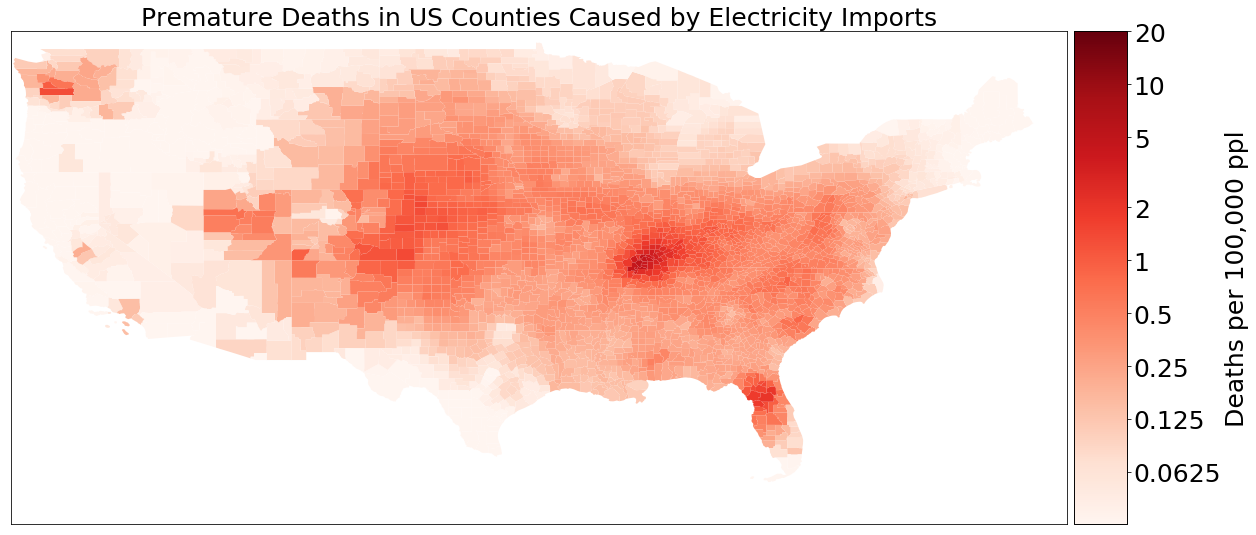

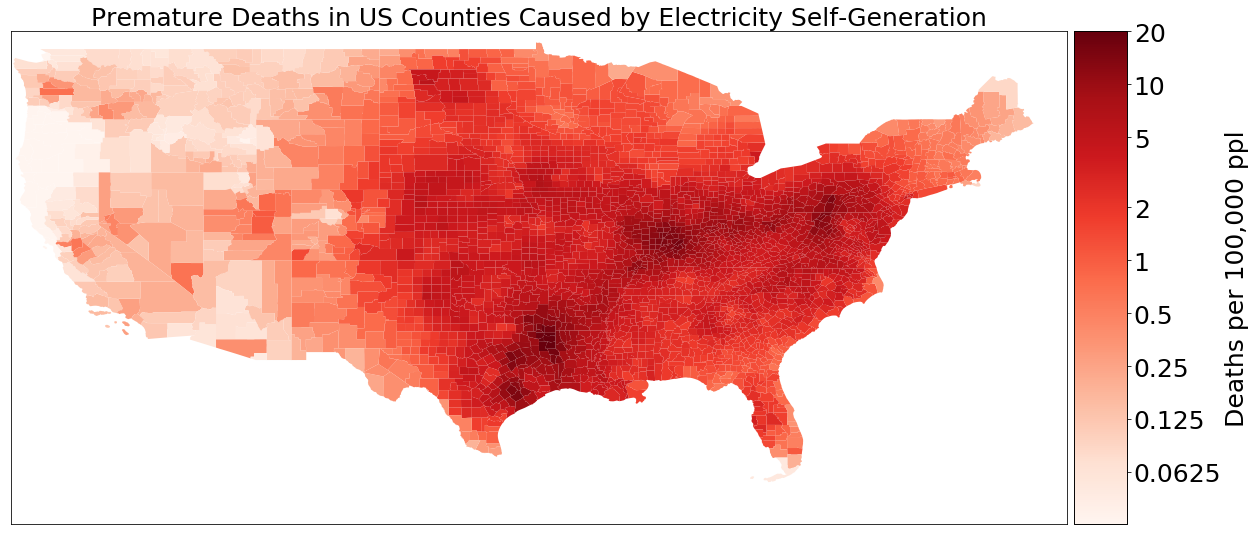

In [483]:
county_imports_i_L, county_self_i_L = make_total_county_maps(results_imports_i_L, results_self_i_L)

In [350]:
county_imports_i_L["Pct_diff_a_L"] = (county_imports_a_L["Deaths"] - county_imports_i_L["Deaths"])/(county_imports_i_L["Deaths"])*100
county_self_i_L["Pct_diff_a_L"] = (county_self_a_L["Deaths"] - county_self_i_L["Deaths"])/(county_self_i_L["Deaths"])*100
county_imports_i_L["Ratio iL/aL"] = county_imports_i_L["Deaths_pc"]/county_imports_a_L["Deaths_pc"]
county_self_i_L["Ratio iL/aL"] = county_self_i_L["Deaths_pc"]/county_self_a_L["Deaths_pc"]
county_imports_i_L["diff_a_L"] = (county_imports_a_L["Deaths"] - county_imports_i_L["Deaths"])
county_self_i_L["diff_a_L"] = (county_self_a_L["Deaths"] - county_self_i_L["Deaths"])

In [54]:
county_imports_a_L[county_imports_a_L["Deaths"]>2].sort_values(by = "Deaths", ascending = False)

STATEFP          NAME  GEOID    Deaths    Population  Deaths_pc
175         6   Los Angeles   6037  6.991172  8.380463e+06   0.083422
74          4      Maricopa   4013  6.492277  3.335111e+06   0.194664
2935       53          King  53033  5.103241  1.306155e+06   0.390707
2945       53        Pierce  53053  4.947992  9.588096e+05   0.516056
186         6        Orange   6059  3.787857  3.893525e+06   0.097286
318        12  Hillsborough  12057  3.634259  1.174650e+06   0.309391
576        17          Cook  17031  3.521161  2.936214e+06   0.119922
338        12        Orange  12095  2.863495  9.415433e+05   0.304128
343        12          Polk  12105  2.523388  6.675300e+05   0.378019
324        12          Lake  12069  2.469667  6.556496e+05   0.376675
708        18          Lake  18089  2.462978  1.690979e+06   0.145654
1259       26       Oakland  26125  2.424987  1.587917e+06   0.152715
78          4         Pinal   4021  2.394813  1.208522e+06   0.198161
1549       29     St. Louis  29189  2.393794  5.898772e+05   0.405812
1546       29   St. Charles  29183  2.329758  5.877564e+05   0.396382
1715       32         Clark  32003  2.219342  2.089640e+06   0.106207
330        12       Manatee  12081  2.164468  7.880687e+05   0.274655

In [67]:
county_imports_i_L[county_imports_i_L["Deaths"]>4].sort_values(by = "Deaths", ascending = False)

STATEFP          NAME  GEOID     Deaths    Population  Deaths_pc
175         6   Los Angeles   6037  14.316657  1.041861e+07   0.137414
1014       21     Jefferson  21111   8.903399  7.832087e+05   1.136785
331        12        Marion  12083   6.718677  3.291051e+05   2.041499
2039       39      Hamilton  39061   6.670405  8.952192e+05   0.745114
318        12  Hillsborough  12057   6.619373  1.304443e+06   0.507448
576        17          Cook  17031   6.417629  5.503673e+06   0.116606
342        12      Pinellas  12103   6.214179  9.914254e+05   0.626792
2945       53        Pierce  53053   5.308106  8.395598e+05   0.632249
338        12        Orange  12095   5.271463  1.265187e+06   0.416655
1549       29     St. Louis  29189   4.246780  1.010524e+06   0.420255
343        12          Polk  12105   4.092130  6.436827e+05   0.635737

In [61]:
Counties = gpd.read_file("tl_2016_us_county.shp")
Counties[Counties["NAME"]=="Philadelphia"]

STATEFP COUNTYFP  COUNTYNS  GEOID          NAME             NAMELSAD LSAD  \
599      42      101  01209187  42101  Philadelphia  Philadelphia County   06   

    CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT      ALAND    AWATER  \
599      H6  G4020   428  37980    37964        C  347519465  22089787   

        INTPTLAT      INTPTLON  \
599  +40.0093755  -075.1333459   

                                              geometry  
599  POLYGON ((-75.28027 39.97496, -75.27951 39.975...

In [303]:
print(county_imports_a_L.head())
print(county_imports_i_L.head())

   STATEFP     NAME  GEOID    Deaths     Population  Deaths_pc
0        1  Autauga   1001  0.218697   74895.348215   0.292003
1        1  Baldwin   1003  0.905671  356991.270886   0.253695
2        1  Barbour   1005  0.052035   17693.773292   0.294086
3        1     Bibb   1007  0.152246   64492.067622   0.236069
4        1   Blount   1009  0.246656   74968.883270   0.329011
   STATEFP     NAME  GEOID    Deaths     Population  Deaths_pc  Pct_diff_a_L  \
0        1  Autauga   1001  0.114552   58735.576661   0.195030     90.915293   
1        1  Baldwin   1003  0.420418  184975.920173   0.227283    115.421346   
2        1  Barbour   1005  0.045697   18932.865251   0.241364     13.869375   
3        1     Bibb   1007  0.078696   37231.491798   0.211371     93.459828   
4        1   Blount   1009  0.217423   66106.437398   0.328898     13.445140   

   Ratio iL/aL  
0     0.667902  
1     0.895888  
2     0.820724  
3     0.895375  
4     0.999658  


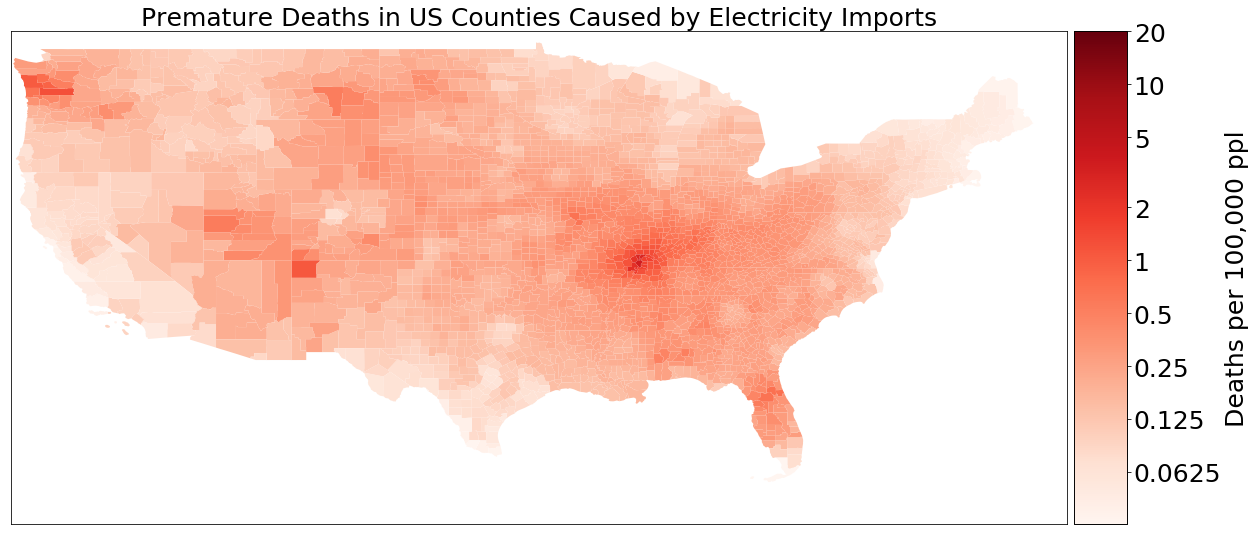

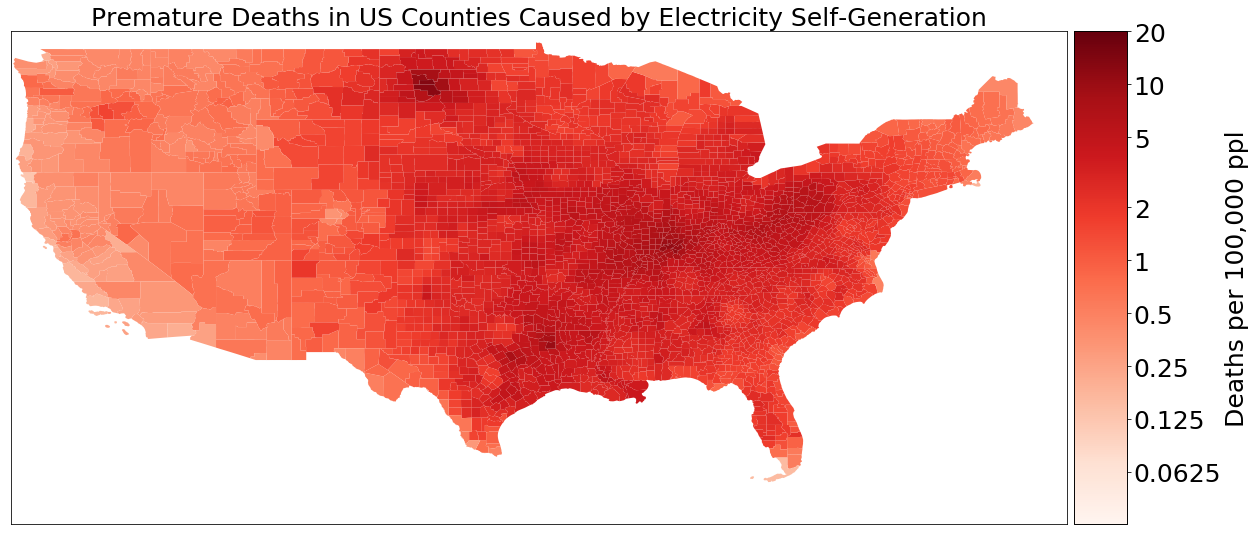

In [484]:
county_imports_a_L, county_self_a_L = make_total_county_maps(results_imports_a_L, results_self_a_L)

In [447]:
def make_compare_models_plot(county_imports, county_self):
    Counties = gpd.read_file("tl_2016_us_county.shp")
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
    
    mapping_imports = Counties.merge(county_imports, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_xlim([-125,-65])
    ax.set_ylim([22,50])
    ax.set_title(f"Imports: Deaths/C from InMAP: Deaths/C from APSCA in each county", fontsize=25)
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    mapping_imports.plot(column="Ratio iL/aL", ax=ax,cax=cax,vmax = 3, vmin = -3, cmap = "RdYlBu_r",legend=True,legend_kwds={'label': "Ratio",'orientation': "vertical"})
  
    fig.savefig("Paper_figures/sensitivity_ratio_imports.png")
    mapping_self = Counties.merge(county_self, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_xlim([-125,-65])
    ax.set_ylim([22,50])
    ax.set_title(f"Self-generaiton: Deaths/C from InMAP: Deaths/C from APSCA in each county", fontsize=25)
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    mapping_self.plot(column="Ratio iL/aL", ax=ax,cax=cax,vmax = 3, vmin = -3, cmap = "RdYlBu_r",legend=True,legend_kwds={'label': "Ratio",'orientation': "vertical"})
      fig.savefig("Paper_figures/sensitivity_ratio_self.png")

IndentationError: unexpected indent (<ipython-input-447-50ea28cc10db>, line 34)

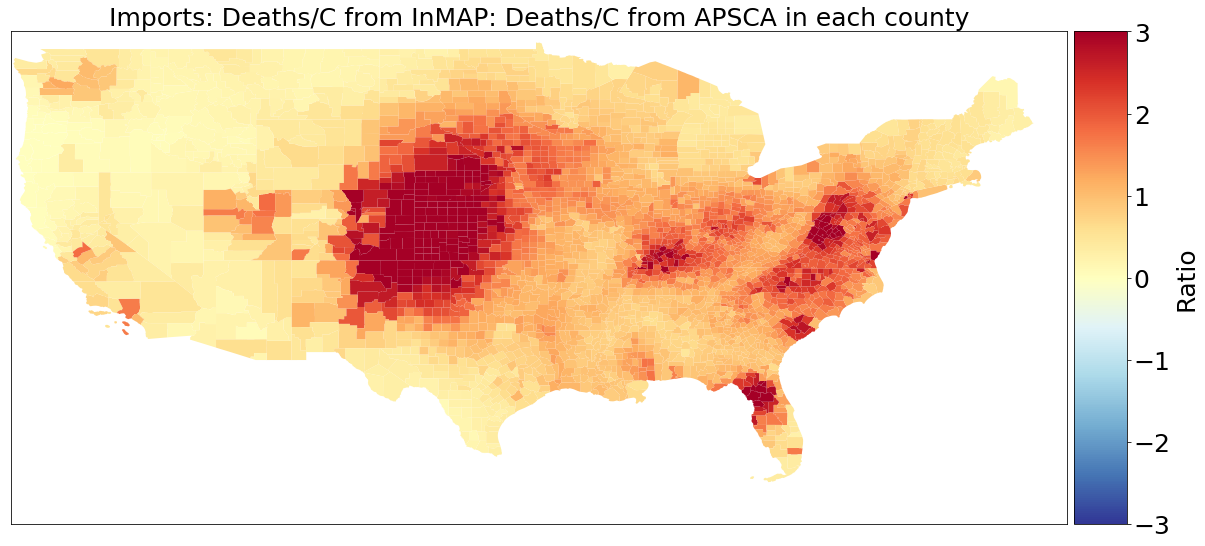

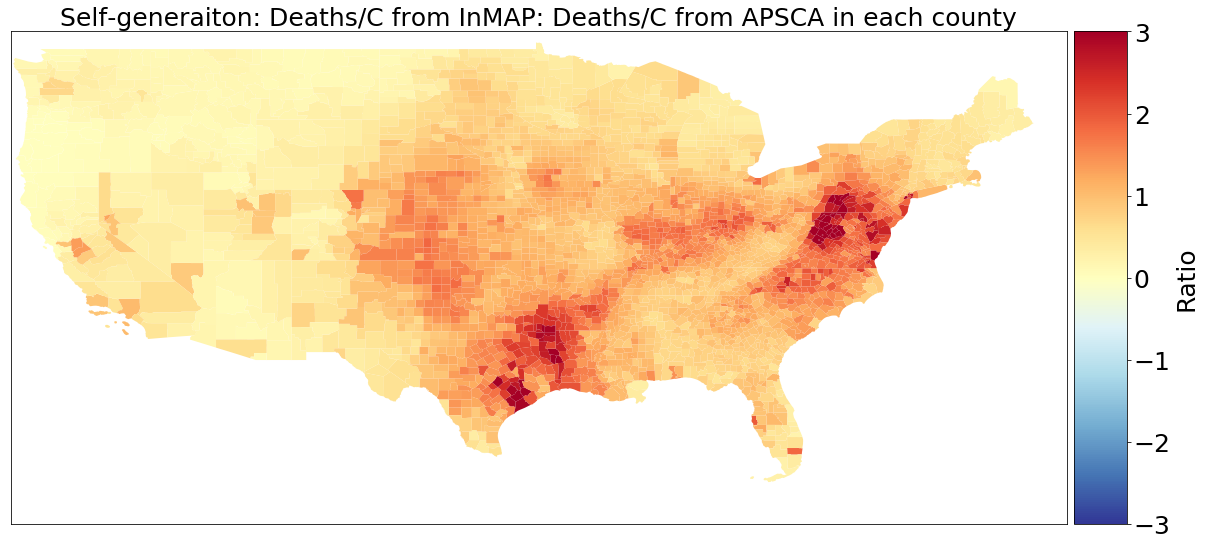

In [448]:
make_compare_models_plot(county_imports_i_L, county_self_i_L)

In [471]:
BAratio_self_ia_l = {key: total_self_i_l["total_deaths"][key] / total_self_a_l["total_deaths"].get(key, 1) 
                        for key in total_self_i_l["total_deaths"].keys()} 
BAratio_imports_ia_l = {key: total_imports_i_l["total_deaths"][key] / total_imports_a_l["total_deaths"].get(key, 1) 
                        for key in total_imports_i_l["total_deaths"].keys()} 

BAdiff_self_ia_l = {key: (total_self_i_l["total_deaths"][key] - total_self_a_l["total_deaths"].get(key, 1))  / total_self_i_l["total_deaths"][key] *100
                        for key in total_self_i_l["total_deaths"].keys()} 
BAdiff_imports_ia_l = {key: (total_imports_i_l["total_deaths"][key]  - total_imports_a_l["total_deaths"].get(key, 1))/ total_imports_i_l["total_deaths"][key]*100 
                        for key in total_imports_i_l["total_deaths"].keys()} 





/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in double_scalars



In [473]:
BAdiff_self_ia_l

{'PGE': -248.9340157404345,
 'BANC': -14.667644179495515,
 'PSEI': -376.67660826697164,
 'PACW': -160.5519232136506,
 'TIDC': -14.819962937291779,
 'CISO': 18.728810763192666,
 'BPAT': -82.65566907436292,
 'LDWP': 51.93308665752062,
 'AVA': -inf,
 'NEVP': 24.03938495744268,
 'IPCO': 1.736859843860413,
 'IID': 43.215253964852785,
 'WALC': 71.84401807699705,
 'GRIF': 50.77377480702335,
 'TEPC': 57.76031237872685,
 'DEAA': 9.61218230255464,
 'SRP': 40.158844713295885,
 'AZPS': 42.16365673875465,
 'PACE': 38.55227900429299,
 'NWMT': -5.691168454550053,
 'PSCO': 34.92299726896239,
 'PNM': 55.75813762795202,
 'WACM': 52.48636612660316,
 'EPE': 71.76143127496432,
 'SWPP': 15.182475293791756,
 'ERCO': 34.82473764635107,
 'AECI': 20.84920165593148,
 'MISO': -1.539781871694836,
 'SPA': -6.456314026872005,
 'EEI': 7.392891865643043,
 'TVA': 13.918616395131295,
 'AEC': 14.596695809851234,
 'LGEE': 17.750988342971365,
 'SOCO': 25.444847881969995,
 'TAL': -81.51850616428295,
 'JEA': 34.5154876422145

In [413]:
ratio_self = pd.DataFrame.from_dict(BAratio_imports_ia_l.copy(), orient = 'index')
ratio_self.columns = ["ratio"]
ratio_self.mean()




ratio    1.273035
dtype: float64

In [480]:
def make_ba_responsibility_comp_maps(ratio_self, ratio_imports):
    Control_areas = gpd.read_file("Control_Areas.shp")
    BA = pd.read_csv("ba_tz.csv")
    BA["NAME"]=BA["BANAME"].str.upper()
    Control_areas=Control_areas.merge(BA,how="left",left_on="NAME",right_on = "NAME")
    
    ratio_self = pd.DataFrame.from_dict(ratio_self.copy(), orient = 'index')
    ratio_self.columns = ["ratio"]
    
    mapping_ratio_self = mapping_df = Control_areas.merge(ratio_self, how="left",left_on="BACODE",right_index = True)
    mapping_ratio_self["ratio"].fillna(1,inplace = True)
    fig=plt.figure(figsize=(20,20))

    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Self-generation: Deaths Caused by Each BA: InMAP/APSCA")
    ax.set_xticks([])
    ax.set_yticks([])



    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_ratio_self.plot(column="ratio", ax = ax, cmap="coolwarm",cax=cax,vmin = -100, vmax = 100,legend=True, legend_kwds={'label': "Ratio of total deaths caused",'orientation': "vertical"})


    ratio_imports = pd.DataFrame.from_dict(ratio_imports.copy(), orient = 'index')
    ratio_imports.columns = ["ratio"]
    
    mapping_ratio_imports = mapping_df = Control_areas.merge(ratio_imports, how="left",left_on="BACODE",right_index = True)
    mapping_ratio_imports["ratio"].fillna(1,inplace = True)
    fig=plt.figure(figsize=(20,20))

    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Imports: Deaths Caused by Each BA: InMAP/APSCA")
    ax.set_xticks([])
    ax.set_yticks([])



    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_ratio_imports.plot(column="ratio", ax = ax, cmap="coolwarm",cax=cax,vmin = -100, vmax = 100,legend=True, legend_kwds={'label': "Ratio of total deaths caused",'orientation': "vertical"})




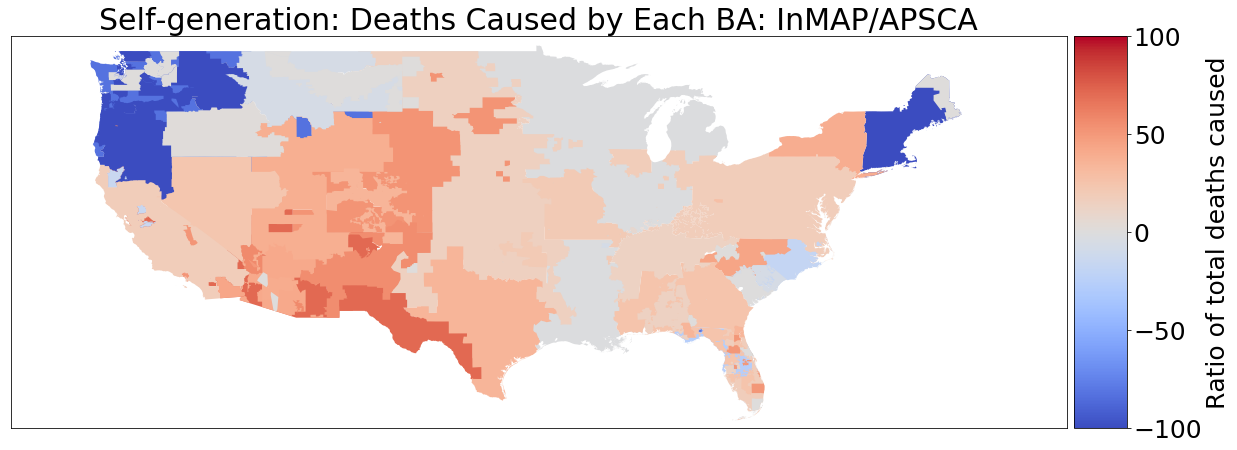

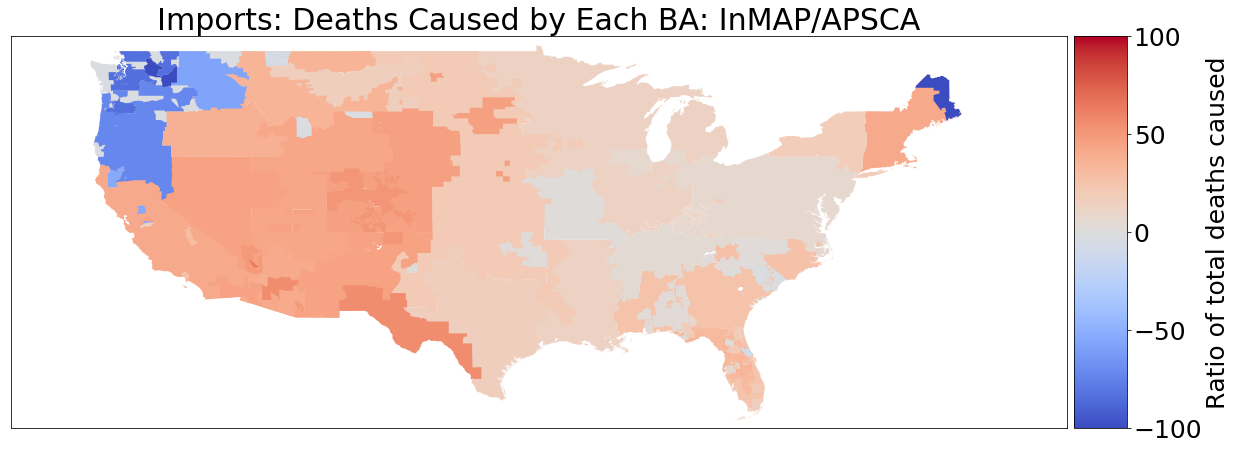

In [481]:
make_ba_responsibility_comp_maps(BAdiff_self_ia_l, BAdiff_imports_ia_l)

In [362]:
def create_county_damage_map_log(BA, results_imports, results_self):
    Control_areas = gpd.read_file("Control_Areas.shp")
    ba = pd.read_csv("ba_tz.csv")
    ba["NAME"]=ba["BANAME"].str.upper()
    Control_areas=Control_areas.merge(ba,how="left",left_on="NAME",right_on = "NAME")
    #print(Control_areas.head())
    BA_outline = Control_areas[Control_areas["BACODE"]==BA]
    #print(BA_outline)
    
    
    
    print(BA)
    Counties = gpd.read_file("tl_2019_us_county.shp")
    deaths_pc_imports = results_imports[BA]["results_county"]
    deaths_pc_imports["GEOID"] = pd.to_numeric(deaths_pc_imports["GEOID"])
    deaths_pc_imports["STATEFP"] = pd.to_numeric(deaths_pc_imports["STATEFP"])
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
    
    mapping_imports = Counties.merge(deaths_pc_imports, how="left",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_imports["Deaths_pc"].fillna(0)
    mapping_imports["log_imports_pc"] = np.log10(mapping_imports["Deaths_pc"]+0.01)
    
    
    power_plants_imports = results_imports[BA]["plants"]
    power_plants_imports["NOx_plot"] = power_plants_imports["NOx"]*0.6
    
    max_pc = mapping_imports["Deaths_pc"].max()
    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_xlim([-125,-65])
    ax.set_ylim([22,50])
    ax.set_title(f"Premature Deaths per Capita in US Counties Caused by {BA} Imports", fontsize=25)
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    mapping_imports.plot(column="log_imports_pc", ax=ax,cax=cax,vmin = -1.5,vmax = 0.5,cmap = "PuRd",legend=True,legend_kwds={'label': "Deaths per 100,000",'orientation': "vertical"})
    #power_plants_imports.plot(ax=ax, color='white',markersize="NOx_plot",alpha=0.4, categorical=False, legend=True)
    BA_outline.boundary.plot(ax = ax, linewidth = 1, color = "black")
    
    sm = plt.cm.ScalarMappable(cmap = "PuRd", norm=plt.Normalize(vmin = -1.5,vmax = 0.5 ))
    cbr = fig.colorbar(sm, cax=cax,)
    cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2]))
    cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2])
    cbr.set_label("Deaths per 100,000 ppl", fontsize = 25)

    fig.savefig(f"Paper_figures/{BA}_county_imports_pc_log.png", bbox_inches="tight")
    
    
    deaths_pc_self = pd.DataFrame(results_self[BA]["results_county"])
    deaths_pc_self["STATEFP"] = pd.to_numeric(deaths_pc_self["STATEFP"])
    deaths_pc_self["GEOID"] = pd.to_numeric(deaths_pc_self["GEOID"])
    
    mapping_self = Counties.merge(deaths_pc_self, how="left",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    
    mapping_self["Deaths_pc"].fillna(0)
    mapping_self["log_self_pc"] = np.log10(mapping_self["Deaths_pc"]+0.01)
    
    
    power_plants_self = results_self[BA]["plants"]
    power_plants_self["NOx_plot"] = power_plants_self["NOx"]*0.6
    
    max_pc = mapping_self["Deaths_pc"].max()
    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_xlim([-125,-65])
    ax.set_ylim([22,50])
    ax.set_title(f"Premature Deaths per Capita in US Counties Caused by {BA} Self-generation", fontsize=30)
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    mapping_self.plot(column="log_self_pc", ax=ax,cax=cax,vmin = -1.5,vmax = 0.5,cmap = "PuRd",legend=True,legend_kwds={'label': "Deaths per 100,000",'orientation': "vertical"})
    #power_plants_self.plot(ax=ax, color='white',markersize="NOx_plot",alpha=0.4, categorical=False, legend=True)
    BA_outline.boundary.plot(ax = ax, linewidth = 1, color = "black")
    
    sm = plt.cm.ScalarMappable(cmap = "PuRd", norm=plt.Normalize(vmin = -1.5,vmax = 0.5 ))
    cbr = fig.colorbar(sm, cax=cax,)
    cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2]))
    cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2])
    cbr.set_label("Deaths per 100,000 ppl")

    #fig.savefig(f"2019_final/{BA}_county_self_pc_log.png", bbox_inches="tight")
    
    print(mapping_imports["log_imports_pc"].max())




/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



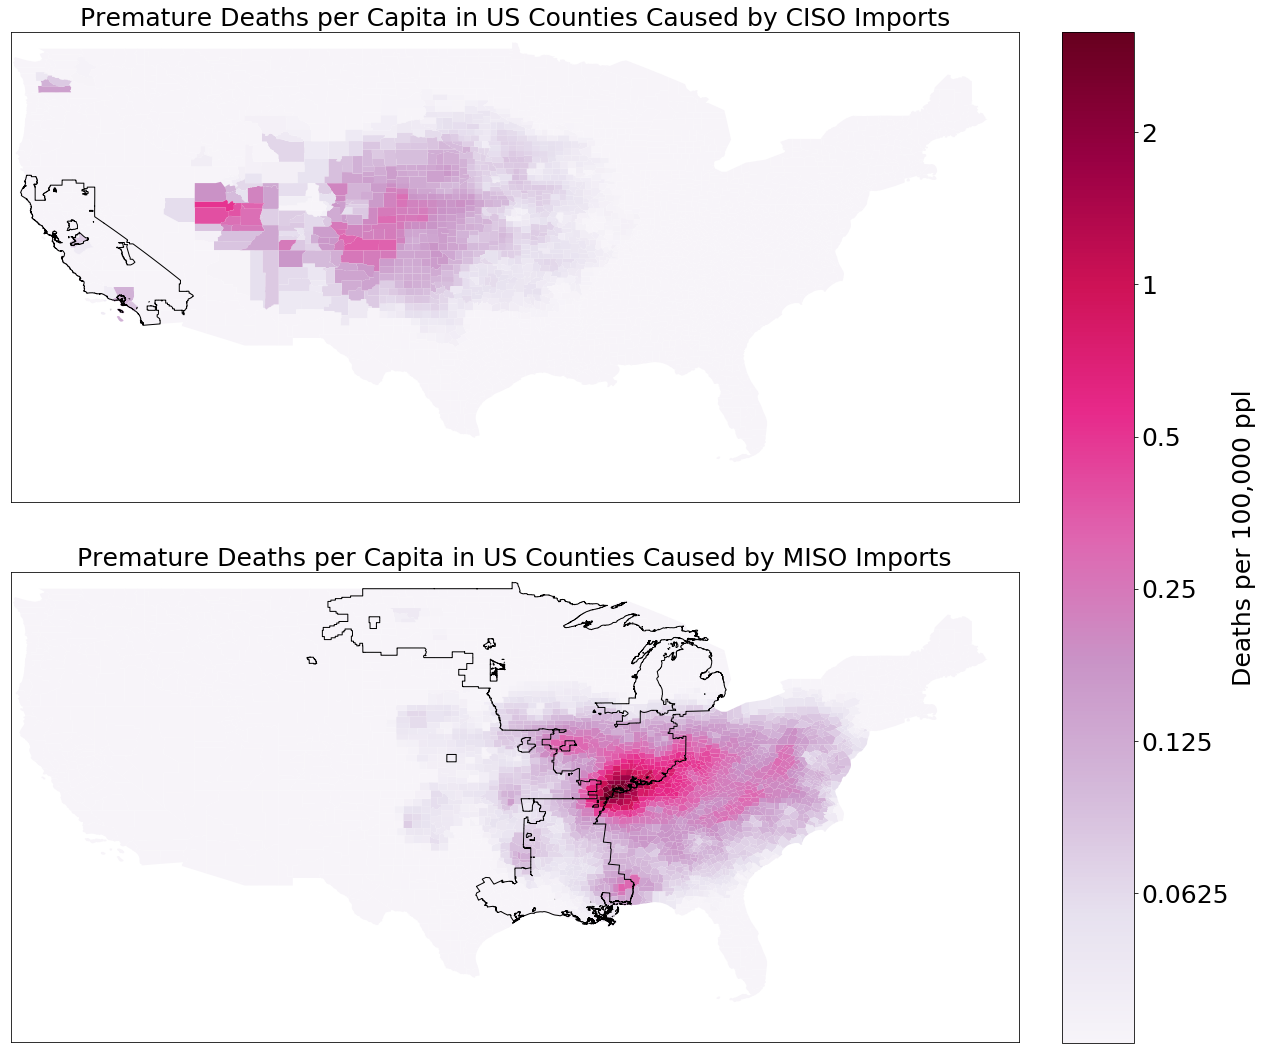

In [385]:
Control_areas = gpd.read_file("Control_Areas.shp")
ba = pd.read_csv("ba_tz.csv")
ba["NAME"] = ba["BANAME"].str.upper()
Control_areas = Control_areas.merge(ba, how="left", left_on="NAME", right_on="NAME")

Counties = gpd.read_file("tl_2019_us_county.shp")
Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

for i, BA in enumerate(["CISO", "MISO"]):
    BA_outline = Control_areas[Control_areas["BACODE"] == BA]

    deaths_pc_imports = results_imports_i_L[BA]["results_county"]
    deaths_pc_imports["GEOID"] = pd.to_numeric(deaths_pc_imports["GEOID"])
    deaths_pc_imports["STATEFP"] = pd.to_numeric(deaths_pc_imports["STATEFP"])
    
    mapping_imports = Counties.merge(deaths_pc_imports, how="left",
                                     left_on=["STATEFP", "NAME", "GEOID"],
                                     right_on=["STATEFP", "NAME", "GEOID"])
    mapping_imports["Deaths_pc"].fillna(0)
    mapping_imports["log_imports_pc"] = np.log10(mapping_imports["Deaths_pc"] + 0.01)

    ax = axes.flat[i]
    ax.set_xlim([-125, -65])
    ax.set_ylim([22, 50])
    ax.set_title(f"Premature Deaths per Capita in US Counties Caused by {BA} Imports", fontsize=25)
    ax.set_xticks([])
    ax.set_yticks([])

    mapping_imports.plot(column="log_imports_pc", ax=ax, vmin=-1.5, vmax=0.5, cmap = "PuRd")
    BA_outline.boundary.plot(ax = ax, linewidth = 1, color = "black")
    
fig.subplots_adjust(bottom=0.1, top=0.85, left=0.1, right=0.8, wspace=0.01, hspace=0)

sm = plt.cm.ScalarMappable(cmap = "PuRd", norm=plt.Normalize(vmin = -1.5, vmax = 0.5))
cax = fig.add_axes([0.83, 0.124, 0.05, 0.702])
cbr = fig.colorbar(sm, cax=cax)
cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2]))
cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2])
cbr.ax.tick_params(labelsize=25)
cbr.set_label("Deaths per 100,000 ppl", fontsize = 25)

fig.savefig("Paper_figures/CISO_MISO_plot.png")

MISO


/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



0.5412984564741556


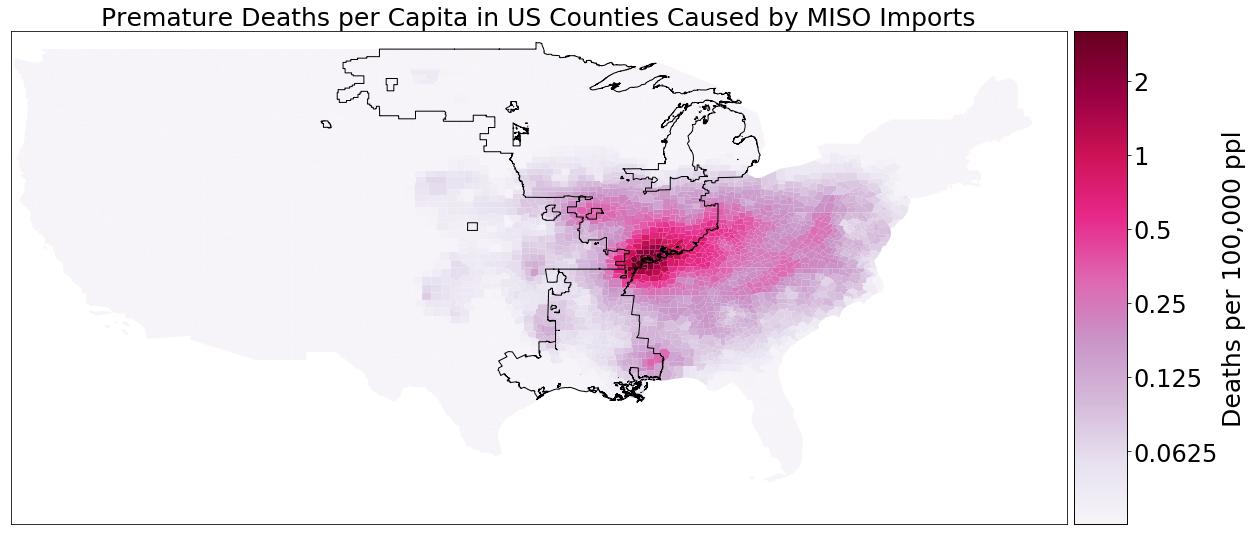

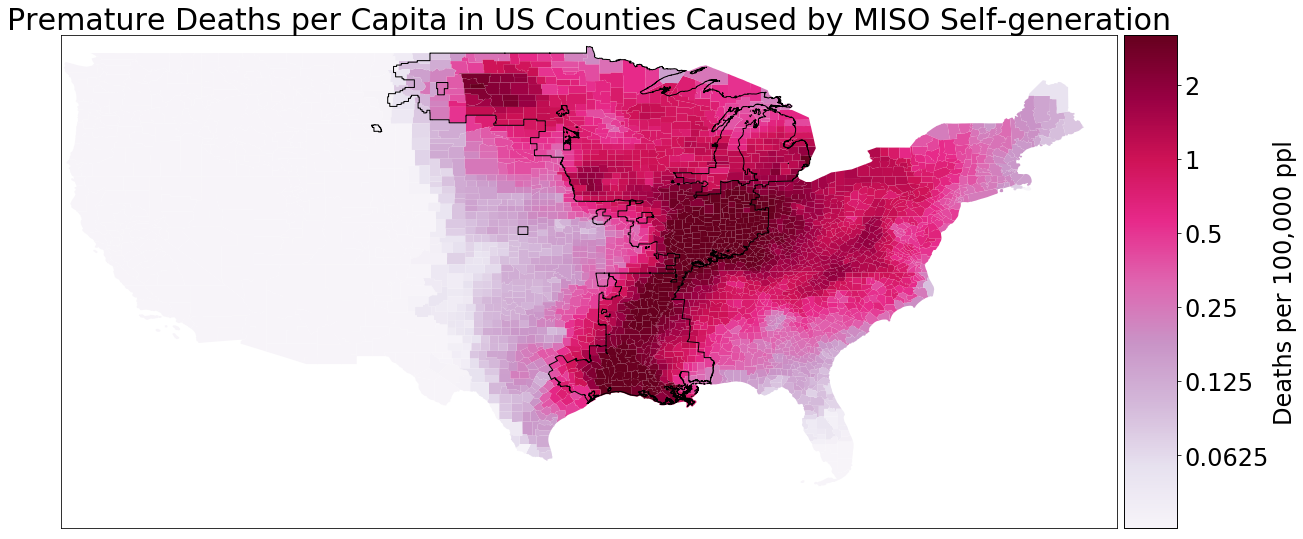

In [363]:
create_county_damage_map_log("MISO", results_imports_i_L, results_self_i_L)

CISO


/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



-0.2951124968901889


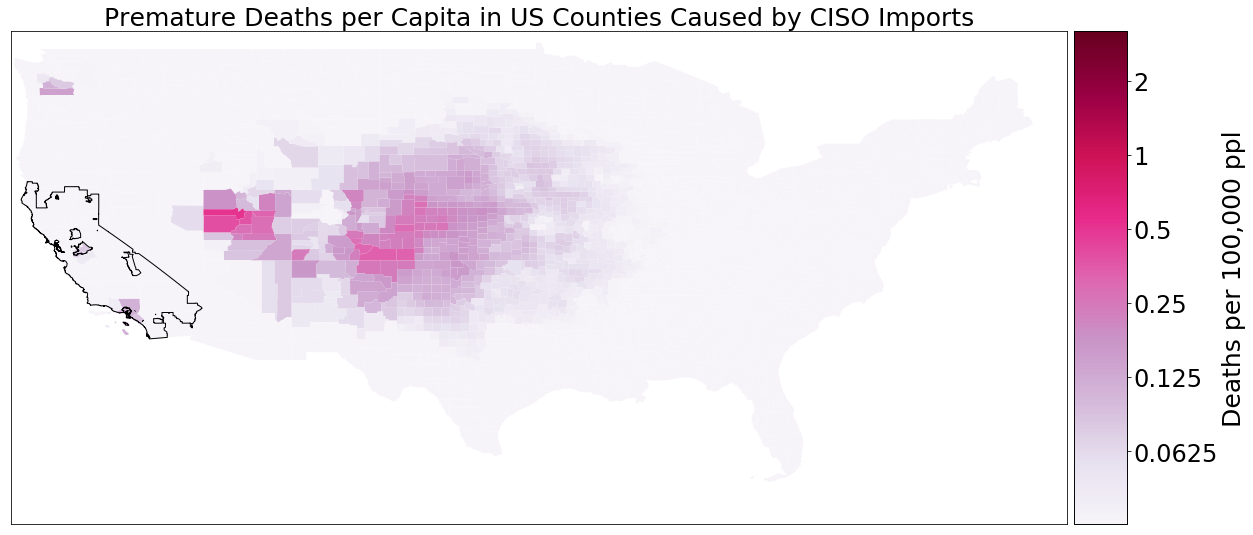

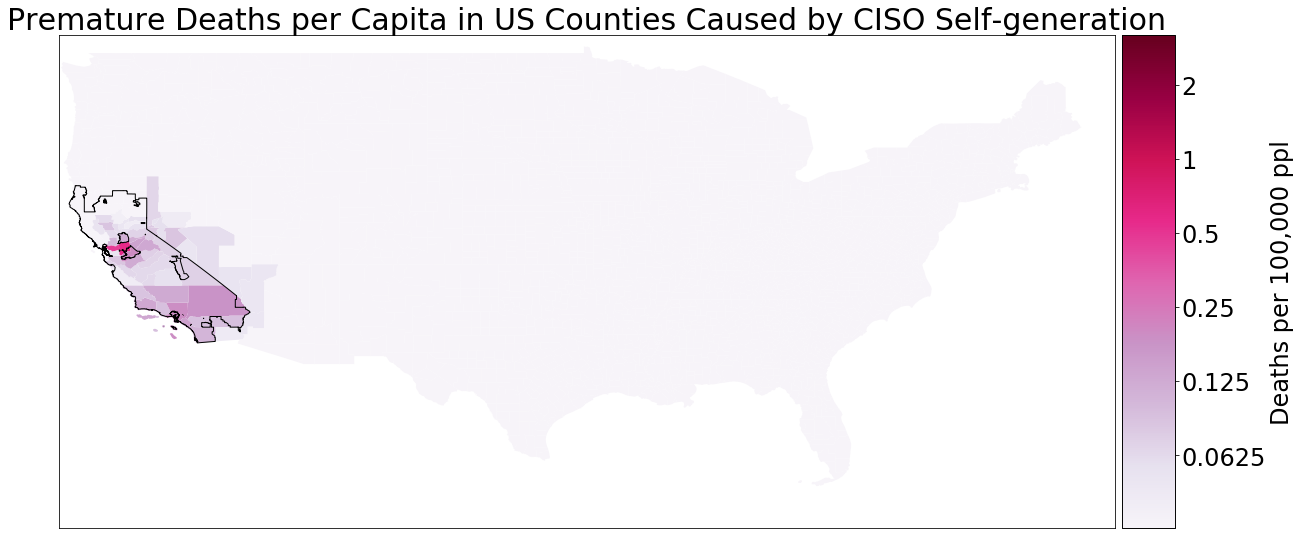

In [364]:
create_county_damage_map_log("CISO", results_imports_i_L, results_self_i_L)

In [429]:
#Maps showing total deaths caused by each BA (responsibility)
def create_responsibility_maps_log(total_imports, total_self, self_harm, save):
    Control_areas = gpd.read_file("Control_Areas.shp")
    #mapping_ISRM_k = Control_areas.merge(deaths_bar)

    BA = pd.read_csv("ba_tz.csv")
    BA["NAME"]=BA["BANAME"].str.upper()
    Control_areas=Control_areas.merge(BA,how="left",left_on="NAME",right_on = "NAME")
    
    
    if self_harm == True:
    
        totals_df = pd.merge(pd.DataFrame(total_imports), pd.DataFrame(total_self), left_index = True, right_index = True, how = "outer" )
        totals_df.columns = ["total_deaths_imports", "deaths_twh_imports","total_out_imports", "deaths_twh_out_imports", "total_deaths_self","deaths_twh_self", "total_out_self","deaths_twh_out_self"]
        totals_df["pct_imports_total"] = totals_df["total_deaths_imports"]/(totals_df["total_deaths_imports"]+totals_df["total_deaths_self"])
        totals_df["pct_imports_twh"] = totals_df["deaths_twh_imports"]/(totals_df["deaths_twh_imports"]+totals_df["deaths_twh_self"])
        totals_df.fillna(0)
        totals_df["total_deaths_imports"] = totals_df["total_deaths_imports"]+1.01
        totals_df["total_deaths_self"] = totals_df["total_deaths_self"] +1.01
        totals_df["total_deaths_imports_log"] = np.log10(totals_df["total_deaths_imports"])
        totals_df["total_deaths_self_log"] = np.log10(totals_df["total_deaths_self"])
        totals_df["deaths_twh_imports_log"] = np.log10(totals_df["deaths_twh_imports"]+0.01)
        totals_df["deaths_twh_self_log"] = np.log10(totals_df["deaths_twh_self"]+0.01)
    
        mapping_df = Control_areas.merge(totals_df, how="left",left_on="BACODE",right_index = True)

        from mpl_toolkits.axes_grid1 import make_axes_locatable

        matplotlib.rcParams.update({'font.size': 24})
        ########Imports
        fig=plt.figure(figsize=(20,20))

        ax = fig.add_subplot(1,1,1)
        ax.set_xlim([-130,-60])
        ax.set_ylim([24,50])
        ax.set_title("Total Deaths Caused by Imports in Each Balancing Area")
        ax.set_xticks([])
        ax.set_yticks([])
 


        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        mapping_df.plot(column="total_deaths_imports_log", ax = ax, cmap="Reds",cax=cax,vmax = mapping_df["total_deaths_self_log"].max(),legend=True, legend_kwds={'label': "Total Deaths Caused",'orientation': "vertical"})

        sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = mapping_df["total_deaths_imports_log"].min(),vmax = mapping_df["total_deaths_self_log"].max() ))
        cbr = fig.colorbar(sm, cax=cax,)
        #print(ax.collections[0])
        cbr.set_ticks([0.01,1,2, 3])
        cbr.set_ticklabels([1,10,100, 1000])
        
        if save == True:
            fig.savefig("Paper_figures/Import_Deaths_map_log.png", bbox_inches="tight")
        
        fig=plt.figure(figsize=(20,20))

        ax = fig.add_subplot(1,1,1)
        ax.set_xlim([-130,-60])
        ax.set_ylim([24,50])
        ax.set_title("Total Deaths Caused by Self-Generation in Each Balancing Area")
        ax.set_xticks([])
        ax.set_yticks([])

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        mapping_df.plot(column="total_deaths_self_log", ax = ax, cmap="Reds",cax=cax,vmax = mapping_df["total_deaths_self_log"].max(),legend=True, legend_kwds={'label': "Total Deaths Caused",'orientation': "vertical"})

        sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = mapping_df["total_deaths_self_log"].min(),vmax = mapping_df["total_deaths_self_log"].max() ))
        cbr = fig.colorbar(sm, cax=cax,)
        #print(ax.collections[0])
        cbr.set_ticks([0.01,1,2, 3])
        cbr.set_ticklabels([1,10,100, 1000])
        
        if save == True:
            fig.savefig("Paper_figures/Self_Deaths_map_log.png", bbox_inches="tight")
        
        fig=plt.figure(figsize=(20,20))

        ax = fig.add_subplot(1,1,1)
        ax.set_xlim([-130,-60])
        ax.set_ylim([24,50])
        ax.set_title("Deaths/TWh Caused by Imports in Each Balancing Area")
        ax.set_xticks([])
        ax.set_yticks([])

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        mapping_df.plot(column="deaths_twh_imports_log", ax = ax, cmap="Reds",cax=cax,vmin = mapping_df["deaths_twh_imports_log"].min(),vmax = 1,legend=True, legend_kwds={'label': "Deaths/TWh Caused",'orientation': "vertical"})

        sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = mapping_df["deaths_twh_imports_log"].min(),vmax = 1 ))
        cbr = fig.colorbar(sm, cax=cax,)
        #print(ax.collections[0])
        cbr.set_ticks(np.log10([0.1,1,10]))
        cbr.set_ticklabels([0.1,1,10])
        
        if save == True:
            fig.savefig("Paper_figures/Import_Deaths_twh_map_log.png", bbox_inches="tight")
        
        fig=plt.figure(figsize=(20,20))

        ax = fig.add_subplot(1,1,1)
        ax.set_xlim([-130,-60])
        ax.set_ylim([24,50])
        ax.set_title("Deaths/TWh Caused by Self-Generation in Each Balancing Area")
        ax.set_xticks([])
        ax.set_yticks([])
        


        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        mapping_df.plot(column="deaths_twh_self_log", ax = ax, cax=cax,cmap="Reds",vmin = mapping_df["deaths_twh_imports_log"].min(),vmax = 1,legend=True, legend_kwds={'label': "Deaths/TWh Caused",'orientation': "vertical"})

        sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = mapping_df["deaths_twh_imports_log"].min(),vmax = 1 ))
        cbr = fig.colorbar(sm, cax=cax,)
        #print(ax.collections[0])
        cbr.set_ticks(np.log10([0.1,1,10]))
        cbr.set_ticklabels([0.1,1,10])
        
        if save == True:
            fig.savefig("Paper_figures/Self_Deaths_twh_map_log.png", bbox_inches="tight")
        
        print(mapping_df["deaths_twh_self_log"].max())

    elif self_harm == False:
            
        totals_df = pd.merge(pd.DataFrame(total_imports), pd.DataFrame(total_self), left_index = True, right_index = True, how = "outer" )
        totals_df.columns = ["total_deaths_imports", "deaths_twh_imports","total_out_imports", "deaths_twh_out_imports", "total_deaths_self","deaths_twh_self", "total_out_self","deaths_twh_out_self"]
        totals_df["pct_imports_total"] = totals_df["total_deaths_imports"]/(totals_df["total_deaths_imports"]+totals_df["total_deaths_self"])
        totals_df["pct_imports_twh"] = totals_df["deaths_twh_imports"]/(totals_df["deaths_twh_imports"]+totals_df["deaths_twh_self"])
        mapping_out_df = Control_areas.merge(totals_df, how="left",left_on="BACODE",right_index = True)
        #print("totals_df")
        from mpl_toolkits.axes_grid1 import make_axes_locatable

        matplotlib.rcParams.update({'font.size': 24})
        ########Imports
        fig=plt.figure(figsize=(20,20))

        ax = fig.add_subplot(1,1,1)
        ax.set_xlim([-130,-60])
        ax.set_ylim([24,50])
        ax.set_title("Total Deaths Caused by Imports in Each Balancing Area")
        ax.set_xticks([])
        ax.set_yticks([])

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        mapping_out_df.plot(column="total_out_imports", ax = ax, cmap="Reds",cax=cax,legend=True, legend_kwds={'label': "Total Deaths Caused",'orientation': "vertical"})

        if save == True:
            fig.savefig("Paper_figures/Import_Deaths_map_out.png", bbox_inches="tight")
        
        fig=plt.figure(figsize=(20,20))

        ax = fig.add_subplot(1,1,1)
        ax.set_xlim([-130,-60])
        ax.set_ylim([24,50])
        ax.set_title("Total Deaths Caused by Self-Generation in Each Balancing Area")
        ax.set_xticks([])
        ax.set_yticks([])

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        mapping_out_df.plot(column="total_out_self", ax = ax, cmap="Reds",cax=cax,legend=True, legend_kwds={'label': "Total Deaths Caused",'orientation': "vertical"})

        if save == True:
            fig.savefig("Paper_figures/Self_Deaths_map_out.png", bbox_inches="tight")
        
        fig=plt.figure(figsize=(20,20))

        ax = fig.add_subplot(1,1,1)
        ax.set_xlim([-130,-60])
        ax.set_ylim([24,50])
        ax.set_title("Deaths/TWh Caused by Imports in Each Balancing Area")
        ax.set_xticks([])
        ax.set_yticks([])

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        mapping_out_df.plot(column="deaths_twh_out_imports", ax = ax, cmap="Reds",cax=cax,legend=True, legend_kwds={'label': "Deaths/TWh Caused",'orientation': "vertical"})

        if save == True:
            fig.savefig("Paper_figures/Import_Deaths_twh_map_out.png", bbox_inches="tight")
        
        fig=plt.figure(figsize=(20,20))

        ax = fig.add_subplot(1,1,1)
        ax.set_xlim([-130,-60])
        ax.set_ylim([24,50])
        ax.set_title("Deaths/TWh Caused by Self-Generation in Each Balancing Area")
        ax.set_xticks([])
        ax.set_yticks([])

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        mapping_out_df.plot(column="deaths_twh_out_self", ax = ax, cmap="Reds",cax=cax,legend=True, legend_kwds={'label': "Deaths/TWh Caused",'orientation': "vertical"})


        #vmax=10 for th eper TWh plots
        if save == True:
            fig.savefig("Paper_figures/Self_Deaths_twh_map_out.png", bbox_inches="tight")




/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



1.224287652480833


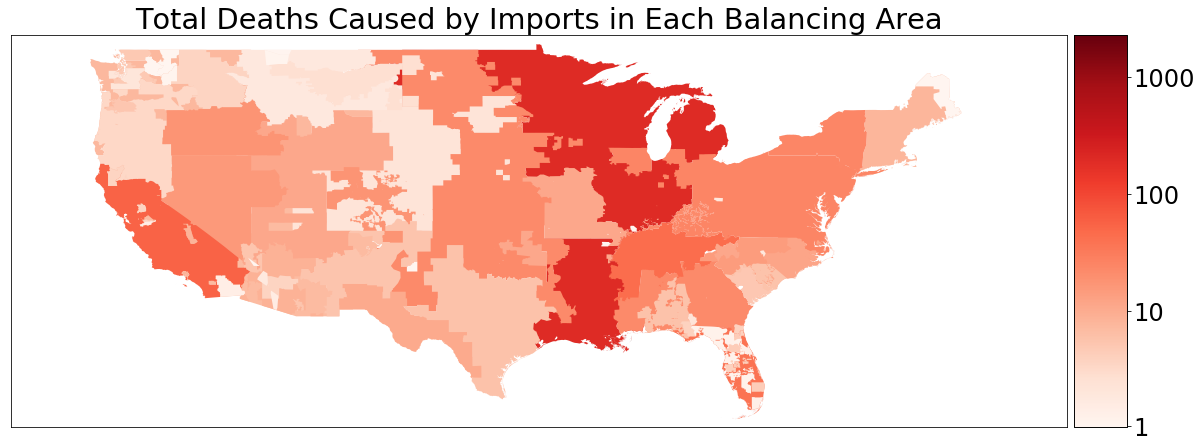

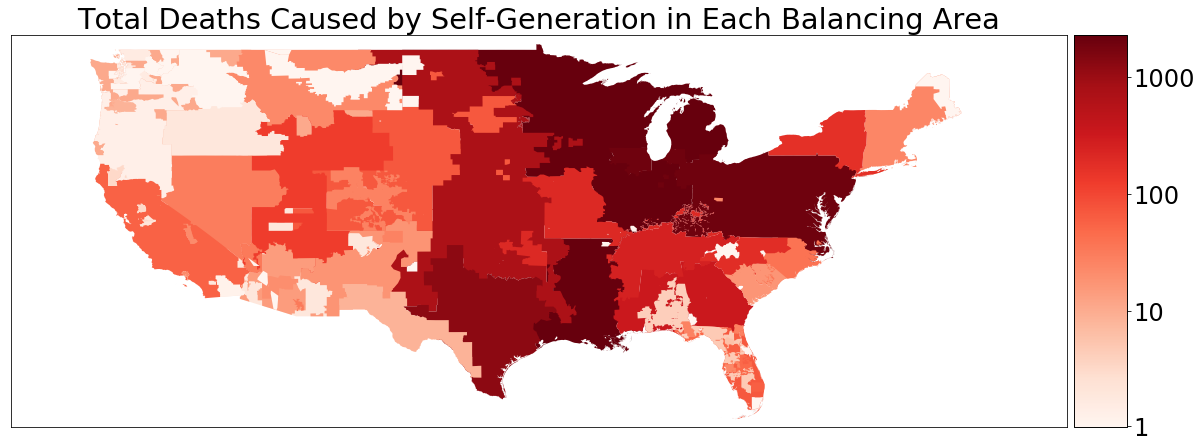

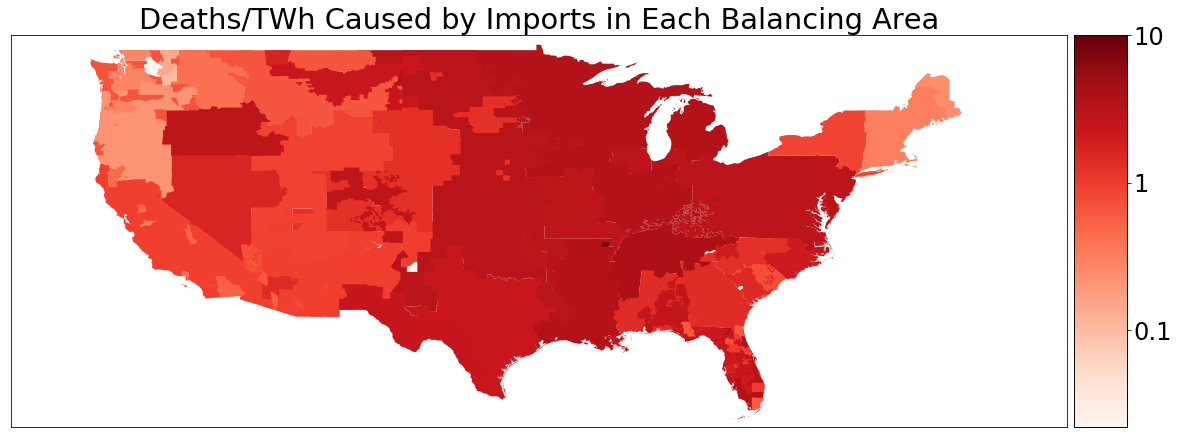

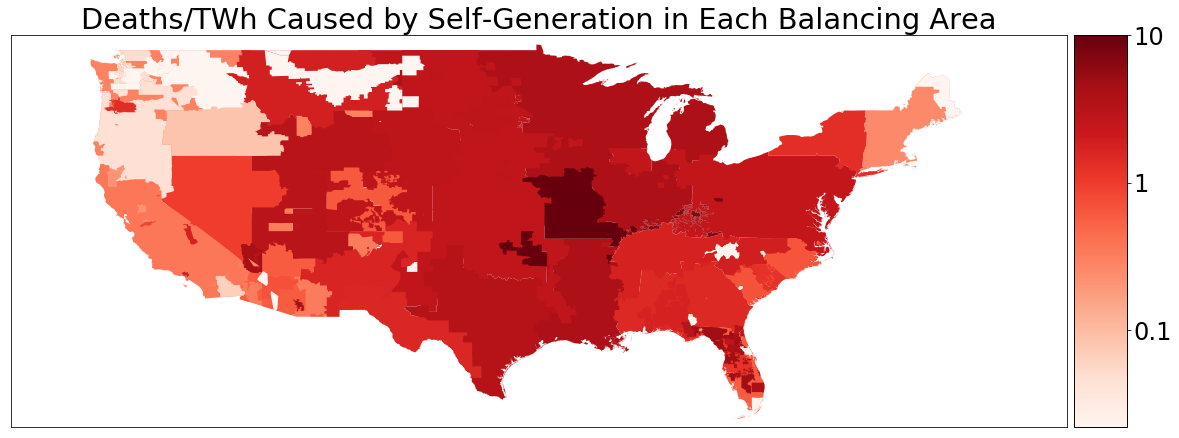

In [430]:
create_responsibility_maps_log(total_imports_i_l, total_self_i_l, self_harm = True, save = True)

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



1.1909526601096163


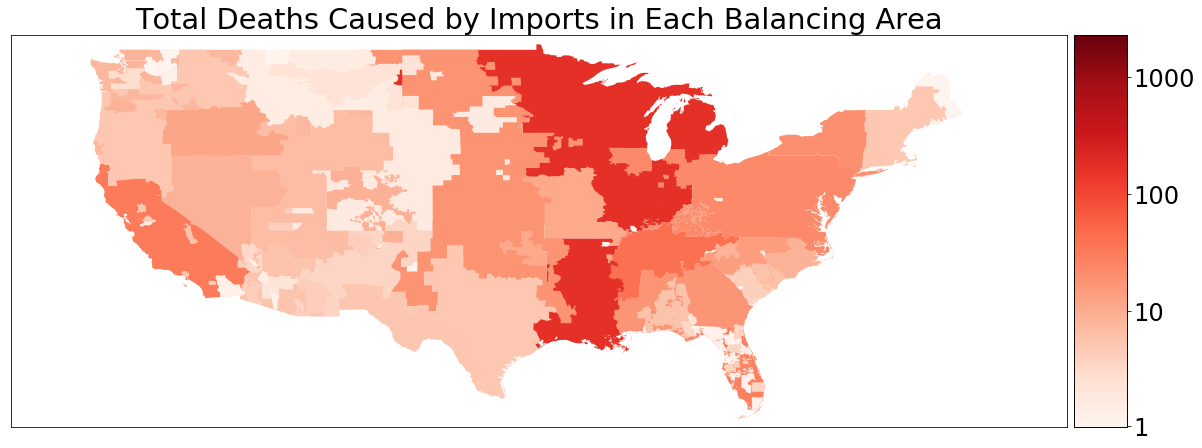

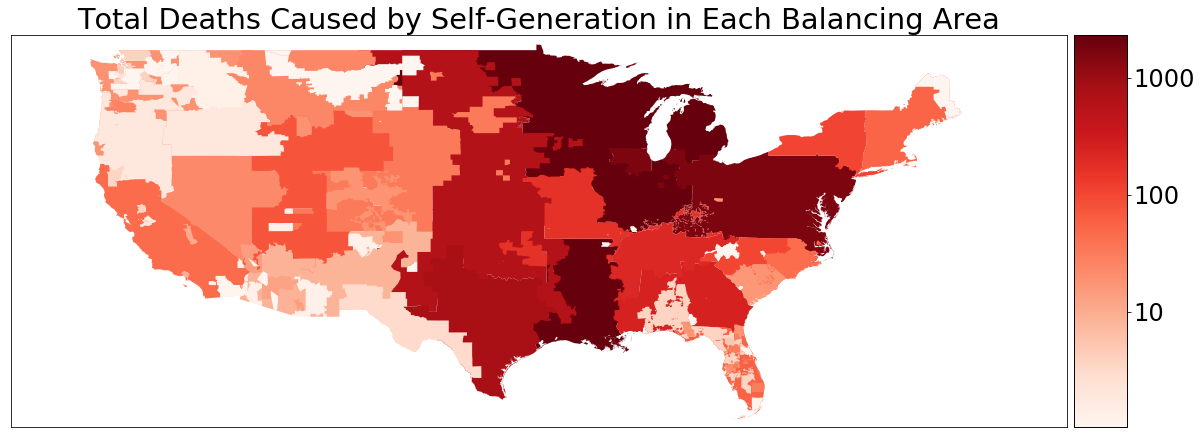

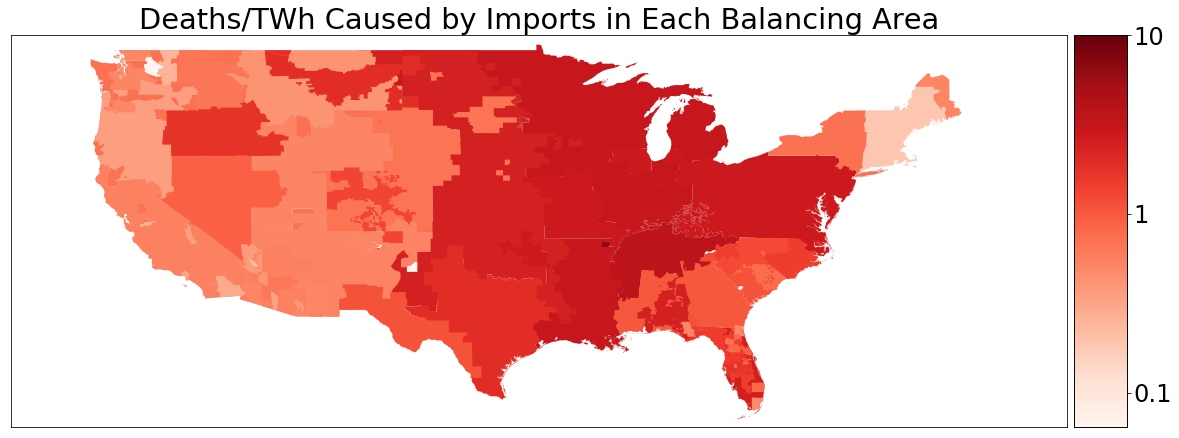

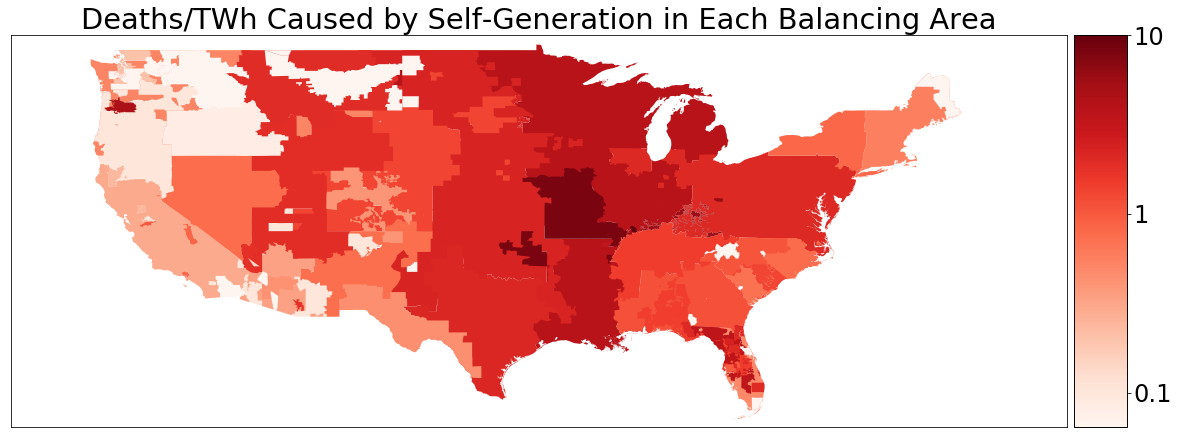

In [485]:
create_responsibility_maps_log(total_imports_a_l, total_self_a_l, self_harm = True, save = True)

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


0.19116420173066717


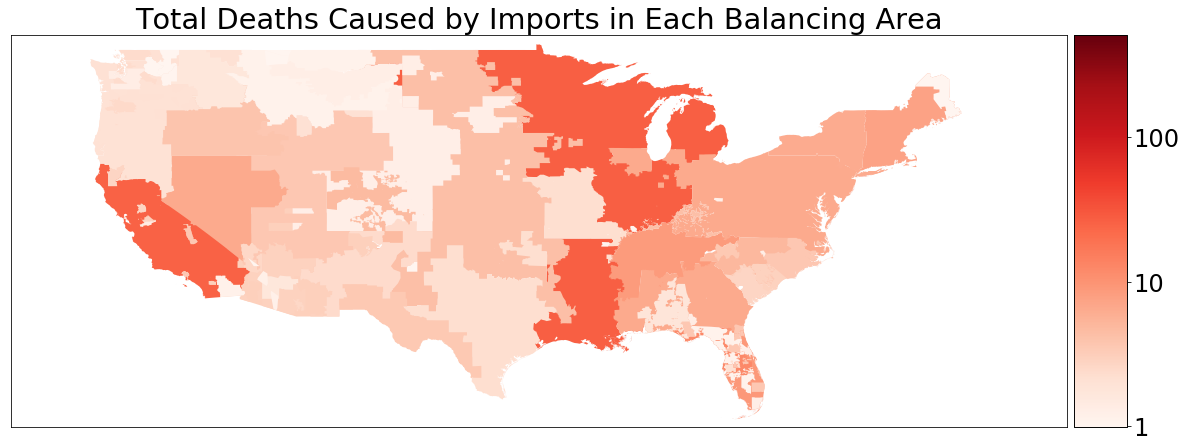

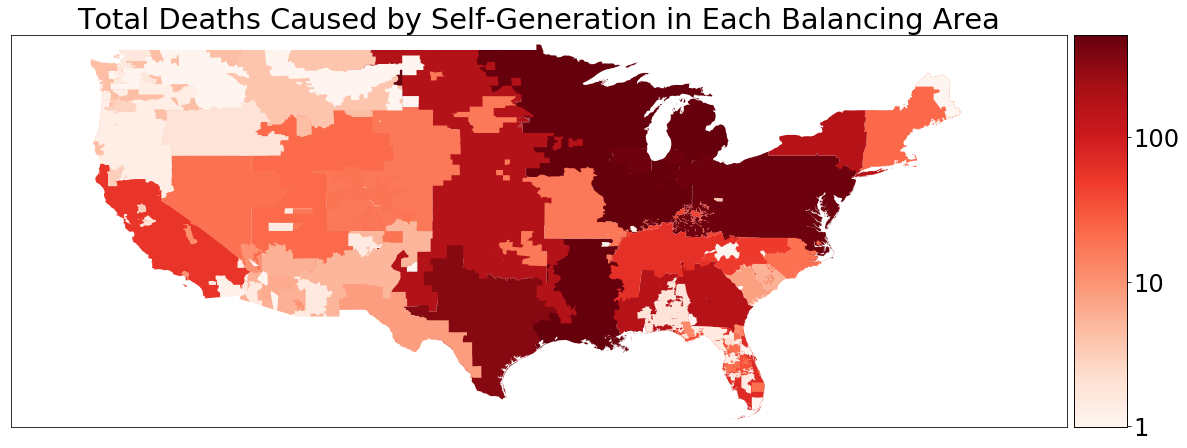

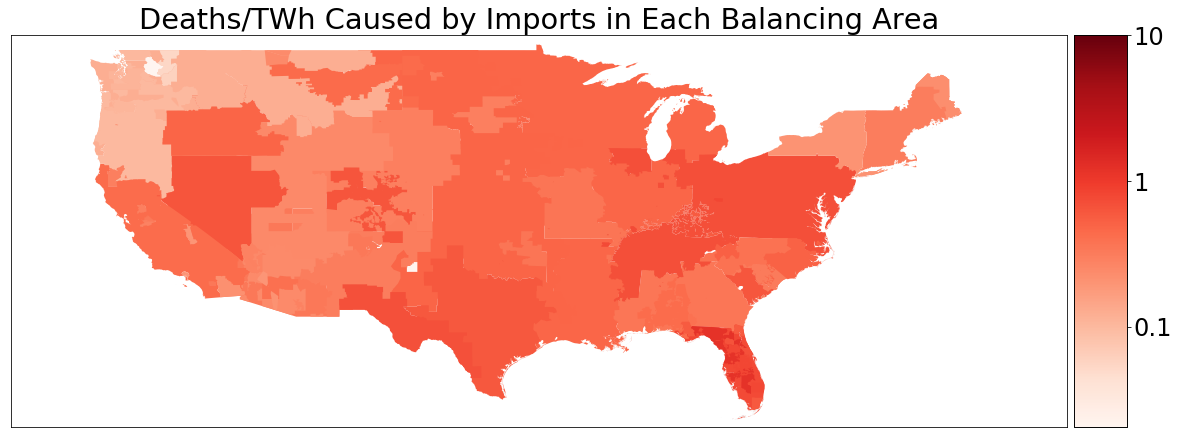

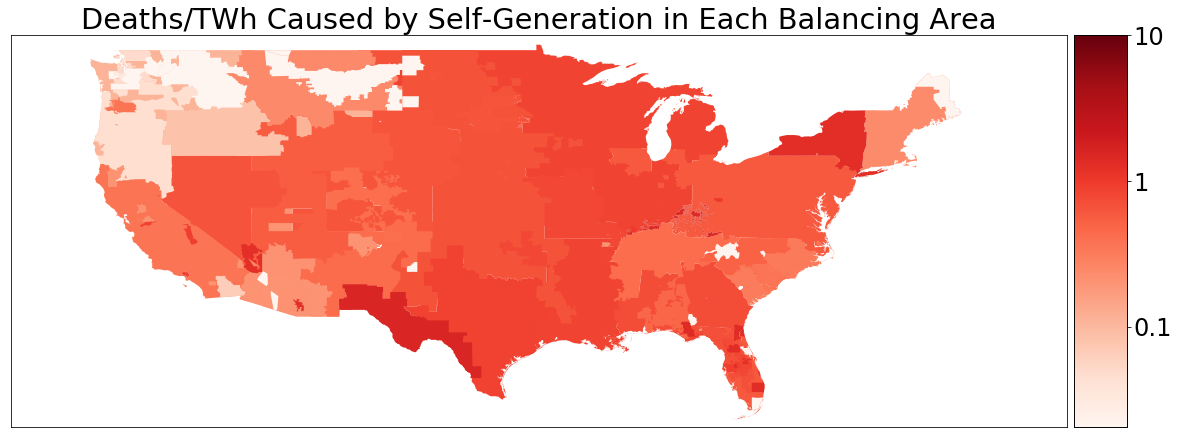

In [434]:
create_responsibility_maps_log(total_imports_i_l_coal2gas, total_self_i_l_coal2gas, self_harm = True, save = False)

In [55]:
def make_generation_table(results_imports, results_self, BAs_sorted):
    
    generation = pd.DataFrame(index = BAs_sorted["BACODE"], columns = ["Imports", "Self-generation"])
    CO2 = pd.DataFrame(index = BAs_sorted["BACODE"], columns = ["Imports","Self-generation"])
    SO2 = pd.DataFrame(index = BAs_sorted["BACODE"], columns = ["Imports","Self-generation"])
    NOX = pd.DataFrame(index = BAs_sorted["BACODE"], columns = ["Imports","Self-generation"])
    for BA in BAs_sorted["BACODE"]:
        if BA in results_imports.keys():
            generation.loc[BA, "Imports"] = results_imports[BA]["generation"].sum()/1e6
            CO2.loc[BA, "Imports"] = results_imports[BA]["emissions"][2]*0.907
            SO2.loc[BA, "Imports"] = results_imports[BA]["emissions"][0]*0.907
            NOX.loc[BA, "Imports"] = results_imports[BA]["emissions"][1]*0.907
        else:
            generation.loc[BA,"Imports"] = 0
            CO2.loc[BA, "Imports"]  = 0
            SO2.loc[BA, "Imports"] = 0
            NOX.loc[BA, "Imports"] = 0
            
        if BA in results_self.keys():
            generation.loc[BA,"Self-generation"] = results_self[BA]["generation"].sum()/1e6
            CO2.loc[BA, "Self-generation"] = results_self[BA]["emissions"][2]*0.907
            SO2.loc[BA, "Self-generation"] = results_self[BA]["emissions"][0]*0.907
            NOX.loc[BA, "Self-generation"] = results_self[BA]["emissions"][1]*0.907
        else: 
            generation.loc[BA,"Self-generation"] = 0
            CO2.loc[BA, "Self-generation"]  = 0
            SO2.loc[BA, "Self-generation"] = 0
            NOX.loc[BA, "Self-generation"] = 0
            
    generation["Total Demand"] = generation["Imports"]+generation["Self-generation"]
    CO2["Total CO2"] = CO2["Imports"] + CO2["Self-generation"]
    SO2["Total SO2"] = SO2["Imports"] + SO2["Self-generation"]
    NOX["Total NOX"] = NOX["Imports"] + NOX["Self-generation"]
    
    nox_twh = pd.DataFrame(index = NOX.index, columns = ["Imports","Self-generation"], dtype = float)
    for ba in NOX.index:
        if generation.loc[ba, "Imports"] > 0:
            nox_twh.loc[ba,"Imports"] = NOX.loc[ba,"Imports"]/generation.loc[ba,"Imports"]
        else:
            nox_twh.loc[ba,"Imports"] = 0
        if generation.loc[ba,"Self-generation"] > 0:
            nox_twh.loc[ba,"Self-generation"] = NOX.loc[ba,"Self-generation"]/generation.loc[ba,"Self-generation"]
        else:
            nox_twh.loc[ba,"Self-generation"] = 0
            
    so2_twh = pd.DataFrame(index = SO2.index, columns = ["Imports","Self-generation"], dtype = float)
    for ba in SO2.index:
        if generation.loc[ba, "Imports"] > 0:
            so2_twh.loc[ba,"Imports"] = SO2.loc[ba,"Imports"]/generation.loc[ba,"Imports"]
        else:
            so2_twh.loc[ba,"Imports"] = 0
        if generation.loc[ba,"Self-generation"] > 0:
            so2_twh.loc[ba,"Self-generation"] = SO2.loc[ba,"Self-generation"]/generation.loc[ba,"Self-generation"]
        else:
            so2_twh.loc[ba,"Self-generation"] = 0
    
    co2_twh = pd.DataFrame(index = CO2.index, columns = ["Imports","Self-generation"], dtype = float)
    for ba in CO2.index:
        if generation.loc[ba, "Imports"] > 0:
            co2_twh.loc[ba,"Imports"] = CO2.loc[ba,"Imports"]/generation.loc[ba,"Imports"]
        else:
            co2_twh.loc[ba,"Imports"] = 0
        if generation.loc[ba,"Self-generation"] > 0:
            co2_twh.loc[ba,"Self-generation"] = CO2.loc[ba,"Self-generation"]/generation.loc[ba,"Self-generation"]
        else:
            co2_twh.loc[ba,"Self-generation"] = 0


    
    return generation, CO2, SO2, NOX, nox_twh, so2_twh, co2_twh

In [56]:
gen_i_L, CO2_i_L, SO2_i_L, NOX_i_L, nox_twh_i_L, so2_twh_i_L, co2_twh_i_L = make_generation_table(results_imports_i_L, results_self_i_L, BAs_sorted)

In [117]:
so2_twh_i_L

Imports  Self-generation
BACODE                             
HECO      0.000000         0.000000
CEA       0.000000         0.000000
AMPL      0.000000         0.000000
PGE      20.292445       646.925431
BANC     17.366784         0.774395
...            ...              ...
YAD      42.542423         0.000000
CPLE    132.054773        29.491768
NYIS     62.628594        12.831000
ISNE      3.088434         7.359393
NBSO      3.892212         0.000000

[70 rows x 2 columns]

In [204]:
nox_twh_i_L.max()

Imports             699.481000
Self-generation    1090.237534
dtype: float64

In [307]:
def create_emissions_deaths_maps(total_imports, total_self, gen, SO2, NOX):
    Control_areas = gpd.read_file("Control_Areas.shp")
    BA = pd.read_csv("ba_tz.csv")
    BA["NAME"]=BA["BANAME"].str.upper()
    Control_areas=Control_areas.merge(BA,how="left",left_on="NAME",right_on = "NAME")
    
    SO2_map= Control_areas.merge(SO2, how = "right", left_on = "BACODE", right_index = True)
    SO2_map["Imports"] = np.log10(SO2_map["Imports"].astype(float)+0.01)
    SO2_map["Self-generation"] = np.log10(SO2_map["Self-generation"].astype(float)+0.01)
    NOX_map = Control_areas.merge(NOX, how = "right", left_on = "BACODE", right_index = True)
    NOX_map["Imports"] = np.log10(NOX_map["Imports"].astype(float)+0.01)
    NOX_map["Self-generation"] = np.log10(NOX_map["Self-generation"].astype(float)+0.01)
    gen_map = Control_areas.merge(gen, how = "right", left_on = "BACODE", right_index = True)
    gen_map["Imports"] = np.log10(gen_map["Imports"].astype(float)+0.01)
    gen_map["Self-generation"] = np.log10(gen_map["Self-generation"].astype(float)+0.01)
    gen_map["Total Demand"] = np.log10(gen_map["Total Demand"].astype(float)+0.01)
    gen_map["Pct_imports"] = np.log10(gen_map["Imports"]/gen_map["Total Demand"]*100+0.01)
    
    gen_map = gen_map.loc[range(0,len(gen_map))]
    SO2_map = SO2_map.loc[range(0,len(SO2_map))]
    NOX_map = NOX_map.loc[range(0,len(NOX_map))]
    
    
    
    totals_df = pd.merge(pd.DataFrame(total_imports), pd.DataFrame(total_self), left_index = True, right_index = True, how = "outer" )
    totals_df.columns = ["total_deaths_imports", "deaths_twh_imports","total_out_imports", "deaths_twh_out_imports", "total_deaths_self","deaths_twh_self", "total_out_self","deaths_twh_out_self"]
    totals_df["pct_imports_total"] = totals_df["total_deaths_imports"]/(totals_df["total_deaths_imports"]+totals_df["total_deaths_self"])
    totals_df["pct_imports_twh"] = totals_df["deaths_twh_imports"]/(totals_df["deaths_twh_imports"]+totals_df["deaths_twh_self"])
    totals_df.fillna(0)
    totals_df["total_deaths_imports"] = totals_df["total_deaths_imports"]+.01
    totals_df["total_deaths_self"] = totals_df["total_deaths_self"] +.01
    totals_df["total_deaths_imports_log"] = np.log10(totals_df["total_deaths_imports"]+0.01)
    totals_df["total_deaths_self_log"] = np.log10(totals_df["total_deaths_self"]+0.01)
    totals_df["deaths_twh_imports_log"] = np.log10(totals_df["deaths_twh_imports"]+0.01)
    totals_df["deaths_twh_self_log"] = np.log10(totals_df["deaths_twh_self"]+0.01)

    mapping_df = Control_areas.merge(totals_df, how="left",left_on="BACODE",right_index = True)

    
    
    fig=plt.figure(figsize=(20,14))
    fig.suptitle("Electricity Consumption, Emissions, and Mortalities \n Caused by Each BA", fontsize = 25)

    #Deaths: Imports
    ax = fig.add_subplot(4,2,7)
    ax.set_xlim([-127.5,-65])
    ax.set_ylim([24,50])
    ax.set_title("g) Deaths: Imports", fontsize = 16, loc = "left")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="total_deaths_imports_log", ax = ax, cmap="Reds",cax=cax,vmax = mapping_df["total_deaths_self_log"].max(),legend=True, legend_kwds={'label': "Total Deaths Caused",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = mapping_df["total_deaths_imports_log"].min(),vmax = mapping_df["total_deaths_self_log"].max() ))
    cbr = fig.colorbar(sm, cax=cax,)
    #print(ax.collections[0])
    cbr.set_ticks([0.01,1,2, 3])
    cbr.set_ticklabels([1,10,100, 1000])
    
    #Deaths: Self
    ax = fig.add_subplot(4,2,8)
    ax.set_xlim([-127.5,-65])
    ax.set_ylim([24,50])
    ax.set_title("h) Deaths: Self-generation", fontsize = 16, loc = "left")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="total_deaths_self_log", ax = ax, cmap="Reds",cax=cax,vmax = mapping_df["total_deaths_self_log"].max(),legend=True, legend_kwds={'label': "Total Deaths Caused",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = mapping_df["total_deaths_imports_log"].min(),vmax = mapping_df["total_deaths_self_log"].max() ))
    cbr = fig.colorbar(sm, cax=cax,)
    #print(ax.collections[0])
    cbr.set_ticks(np.log10([1,10, 100, 1000]))
    cbr.set_ticklabels([1,10, 100, 1000])
    
    #NOX: imports
    ax = fig.add_subplot(4,2,3)
    ax.set_xlim([-127.5,-65])
    ax.set_ylim([24,50])
    ax.set_title("c) NOX Emissions/TWh: Imports (tonnes/MWh)", fontsize = 16, loc = "left")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    NOX_map.plot(column="Imports", ax = ax, cmap="Purples",cax=cax,vmin = 0,vmax = NOX_map["Self-generation"].max(),legend=True, legend_kwds={'label': "Emissions (tons/ TWh)",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "Purples", norm=plt.Normalize(vmin = 0,vmax = NOX_map["Self-generation"].max() ))
    cbr = fig.colorbar(sm, cax=cax,)
    #print(ax.collections[0])
    cbr.set_ticks(np.log10([1,10, 100, 1000, 10000, 1000000]))
    cbr.set_ticklabels([1,10, 100, 1000, 10000, 1000000])
    
    #NOX: Self
    ax = fig.add_subplot(4,2,4)
    ax.set_xlim([-127.5,-65])
    ax.set_ylim([24,50])
    ax.set_title("d) NOX Emissions/TWh: Self-generation (tonnes/MWh)", fontsize = 16, loc = "left")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    NOX_map.plot(column="Self-generation", ax = ax, cmap="Purples",cax=cax,vmin = 0,vmax = NOX_map["Self-generation"].max(),legend=True, legend_kwds={'label': "Emissions (tons/TWh)",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "Purples", norm=plt.Normalize(vmin = 0,vmax = NOX_map["Self-generation"].max() ))
    cbr = fig.colorbar(sm, cax=cax,)
    #print(ax.collections[0])
    cbr.set_ticks(np.log10([1, 10,100, 1000, 1000000]))
    cbr.set_ticklabels([1, 10,100, 1000, 1000000])
    
    #sO2: imports
    ax = fig.add_subplot(4,2,5)
    ax.set_xlim([-127.5,-65])
    ax.set_ylim([24,50])
    ax.set_title("e) SO2 Emissions: Imports (tonnes/MWh)", fontsize = 16, loc = "left")
    ax.set_xticks([])
    ax.set_yticks([])

    print(SO2_map["Self-generation"].max())
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    SO2_map.plot(column="Imports", ax = ax, cmap="Greens",cax=cax,vmin = 0,vmax = SO2_map["Self-generation"].max(),legend=True, legend_kwds={'label': "Total Emissions (tons)",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "Greens", norm=plt.Normalize(vmin = 0,vmax = SO2_map["Self-generation"].max() ))
    cbr = fig.colorbar(sm, cax=cax,)
    #print(ax.collections[0])
    cbr.set_ticks(np.log10([1,10, 100, 1000]))
    cbr.set_ticklabels([1,10, 100, 1000])
    
    #SO2: Self
    ax = fig.add_subplot(4,2,6)
    ax.set_xlim([-127.5,-65])
    ax.set_ylim([24,50])
    ax.set_title("f) SO2 Emissions/TWh: Self-generation (tonnes/MWh)", fontsize = 16, loc = "left")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    SO2_map.plot(column="Self-generation", ax = ax, cmap="Greens",cax=cax,vmin = 0, vmax = SO2_map["Self-generation"].max(),legend=True, legend_kwds={'label': "Emissions (tons/TWh)",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "Greens", norm=plt.Normalize(vmin = 0,vmax = SO2_map["Self-generation"].max() ))
    cbr = fig.colorbar(sm, cax=cax,)
    #print(ax.collections[0])
    cbr.set_ticks(np.log10([1,10, 100, 1000]))
    cbr.set_ticklabels([1,10, 100, 1000])
    
    #Generaiton: imports
    ax = fig.add_subplot(4,2,1)
    ax.set_xlim([-127.5,-65])
    ax.set_ylim([24,50])
    ax.set_title("a) Electricity Consumption: Imports (MWh)", fontsize = 16, loc = "left")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    gen_map.plot(column="Imports", ax = ax, cmap="Blues",cax=cax,vmin = 0, vmax = gen_map["Self-generation"].max(),legend=True, legend_kwds={'label': "Total Emissions (tons)",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "Blues", norm=plt.Normalize(vmin = 0,vmax = gen_map["Self-generation"].max() ))
    cbr = fig.colorbar(sm, cax=cax,)
    #print(ax.collections[0])
    cbr.set_ticks(np.log10([1,10, 100, 1000, 10000, 1000000]))
    cbr.set_ticklabels([1,10, 100, 1000, 10000, 1000000])
    
    #generation: Self
    ax = fig.add_subplot(4,2,2)
    ax.set_xlim([-127.5,-65])
    ax.set_ylim([24,50])
    ax.set_title("b) Electricity Consumption: Self-generation (MWh)", fontsize = 16, loc = "left")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    gen_map.plot(column="Self-generation", ax = ax, cmap="Blues",cax=cax,vmin = 0, vmax = gen_map["Self-generation"].max(),legend=True, legend_kwds={'label': "Total Emissions (tons)",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "Blues", norm=plt.Normalize(vmin = 0,vmax = gen_map["Self-generation"].max() ))
    cbr = fig.colorbar(sm, cax=cax,)
    #print(ax.collections[0])
    cbr.set_ticks(np.log10([1,10, 100, 1000]))
    cbr.set_ticklabels([1,10, 100, 1000])
    
    fig.savefig("Paper_figures/Figure_1.png", bbox_inches="tight")

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

invalid value encountered in log10

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



3.3393142034617447


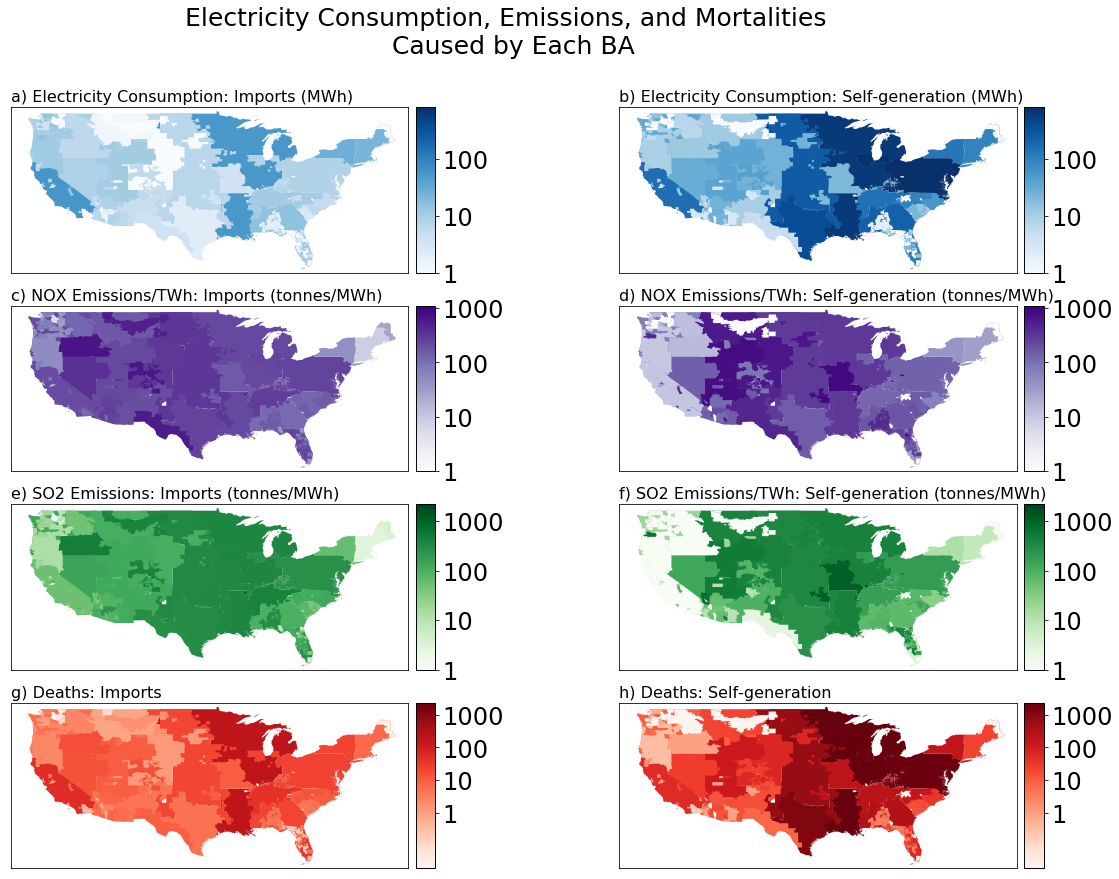

In [308]:
create_emissions_deaths_maps(total_imports_i_l, total_self_i_l, gen_i_L, so2_twh_i_L, nox_twh_i_L)

In [137]:
gen_i_L.sort_values(by = "Imports", ascending = False)

Imports Self-generation Total Demand
BACODE                                        
CISO    57.467184      157.908508   215.375692
MISO    55.403557      595.740174   651.143731
NYIS    27.323416      128.055579   155.378995
ISNE    22.420824       95.531341   117.952166
SOCO    15.706568      223.261333     238.9679
...           ...             ...          ...
SPA      0.000031        0.009111     0.009142
GRIS            0               0            0
CEA             0               0            0
AMPL            0               0            0
HECO            0               0            0

[70 rows x 3 columns]

In [86]:
def make_mapping_data(results_imports, results_self, results_imports_gas, results_self_gas, results_imports_coal,
                      results_self_coal, results_imports_coal2gas, results_self_coal2gas, results_imports_coalCCS,
                      results_self_coalCCS, results_imports_gasCCS, results_self_gasCCS,results_imports_coal2gasCCS, results_self_coal2gasCCS):
    county_index = results_imports["CISO"]["results_county"].index
    county_imports = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME", "GEOID","Deaths","Population","Deaths_pc"])
    county_imports["STATEFP"] = pd.to_numeric(results_imports["CISO"]["results_county"]["STATEFP"])
    county_imports["NAME"] = results_imports["CISO"]["results_county"]["NAME"]
    county_imports["GEOID"] = pd.to_numeric(results_imports["CISO"]["results_county"]["GEOID"])
    county_imports["Population"] = results_imports["CISO"]["results_county"]["Population"]
    county_imports["Deaths"] = 0
    county_imports["Deaths_pc"] = 0
    for BA in results_imports.keys():
        county_imports["Deaths"] += results_imports[BA]["results_county"]["Deaths"]
        county_imports["Deaths_pc"] += results_imports[BA]["results_county"]["Deaths_pc"]
        
    county_index = results_self["CISO"]["results_county"].index
    county_self = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME","GEOID" "Deaths","Population","Deaths_pc"])
    county_self["STATEFP"] = pd.to_numeric(results_self["CISO"]["results_county"]["STATEFP"])
    county_self["NAME"] = results_self["CISO"]["results_county"]["NAME"]
    county_self["GEOID"] = pd.to_numeric(results_self["CISO"]["results_county"]["GEOID"])
    county_self["Population"] = results_self["CISO"]["results_county"]["Population"]
    county_self["Deaths"] = 0
    county_self["Deaths_pc"] = 0
    for BA in results_self.keys():
        county_self["Deaths"] += results_self[BA]["results_county"]["Deaths"]
        county_self["Deaths_pc"] += results_self[BA]["results_county"]["Deaths_pc"]
        
        
    Counties = gpd.read_file("tl_2016_us_county.shp")
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
    
    mapping_imports = Counties.merge(county_imports, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_imports["Deaths_pc_log"] = np.log10(mapping_imports["Deaths_pc"]+0.01)
    
    mapping_self = Counties.merge(county_self, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_self["Deaths_pc_log"] = np.log10(mapping_self["Deaths_pc"]+0.01)
    
    #Gas scenario
    county_index = results_imports_gas["CISO"]["results_county"].index
    county_imports_gas = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME", "GEOID","Deaths","Population","Deaths_pc"])
    county_imports_gas["STATEFP"] = pd.to_numeric(results_imports_gas["CISO"]["results_county"]["STATEFP"])
    county_imports_gas["NAME"] = results_imports_gas["CISO"]["results_county"]["NAME"]
    county_imports_gas["GEOID"] = pd.to_numeric(results_imports_gas["CISO"]["results_county"]["GEOID"])
    county_imports_gas["Population"] = results_imports_gas["CISO"]["results_county"]["Population"]
    county_imports_gas["Deaths"] = 0
    county_imports_gas["Deaths_pc"] = 0
    for BA in results_imports_gas.keys():
        county_imports_gas["Deaths"] += results_imports_gas[BA]["results_county"]["Deaths"]
        county_imports_gas["Deaths_pc"] += results_imports_gas[BA]["results_county"]["Deaths_pc"]
        
    county_index = results_self_gas["CISO"]["results_county"].index
    county_self_gas = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME","GEOID" "Deaths","Population","Deaths_pc"])
    county_self_gas["STATEFP"] = pd.to_numeric(results_self_gas["CISO"]["results_county"]["STATEFP"])
    county_self_gas["NAME"] = results_self_gas["CISO"]["results_county"]["NAME"]
    county_self_gas["GEOID"] = pd.to_numeric(results_self_gas["CISO"]["results_county"]["GEOID"])
    county_self_gas["Population"] = results_self_gas["CISO"]["results_county"]["Population"]
    county_self_gas["Deaths"] = 0
    county_self_gas["Deaths_pc"] = 0
    for BA in results_self_gas.keys():
        county_self_gas["Deaths"] += results_self_gas[BA]["results_county"]["Deaths"]
        county_self_gas["Deaths_pc"] += results_self_gas[BA]["results_county"]["Deaths_pc"]
        
        
    Counties = gpd.read_file("tl_2016_us_county.shp")
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
    
    mapping_imports_gas = Counties.merge(county_imports_gas, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_imports_gas["Deaths_pc_log"] = np.log10(mapping_imports_gas["Deaths_pc"]+0.01)
    
    mapping_self_gas = Counties.merge(county_self_gas, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_self_gas["Deaths_pc_log"] = np.log10(mapping_self_gas["Deaths_pc"]+0.01)
    
    # Coal scenario
    county_index = results_imports_coal["CISO"]["results_county"].index
    county_imports_coal = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME", "GEOID","Deaths","Population","Deaths_pc"])
    county_imports_coal["STATEFP"] = pd.to_numeric(results_imports_coal["CISO"]["results_county"]["STATEFP"])
    county_imports_coal["NAME"] = results_imports_coal["CISO"]["results_county"]["NAME"]
    county_imports_coal["GEOID"] = pd.to_numeric(results_imports_coal["CISO"]["results_county"]["GEOID"])
    county_imports_coal["Population"] = results_imports_coal["CISO"]["results_county"]["Population"]
    county_imports_coal["Deaths"] = 0
    county_imports_coal["Deaths_pc"] = 0
    for BA in results_imports_coal.keys():
        county_imports_coal["Deaths"] += results_imports_coal[BA]["results_county"]["Deaths"]
        county_imports_coal["Deaths_pc"] += results_imports_coal[BA]["results_county"]["Deaths_pc"]
        
    county_index = results_self_coal["CISO"]["results_county"].index
    county_self_coal = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME","GEOID" "Deaths","Population","Deaths_pc"])
    county_self_coal["STATEFP"] = pd.to_numeric(results_self_coal["CISO"]["results_county"]["STATEFP"])
    county_self_coal["NAME"] = results_self_coal["CISO"]["results_county"]["NAME"]
    county_self_coal["GEOID"] = pd.to_numeric(results_self_coal["CISO"]["results_county"]["GEOID"])
    county_self_coal["Population"] = results_self_coal["CISO"]["results_county"]["Population"]
    county_self_coal["Deaths"] = 0
    county_self_coal["Deaths_pc"] = 0
    for BA in results_self_coal.keys():
        county_self_coal["Deaths"] += results_self_coal[BA]["results_county"]["Deaths"]
        county_self_coal["Deaths_pc"] += results_self_coal[BA]["results_county"]["Deaths_pc"]
        
        
    Counties = gpd.read_file("tl_2016_us_county.shp")
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
    
    mapping_imports_coal = Counties.merge(county_imports_coal, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_imports_coal["Deaths_pc_log"] = np.log10(mapping_imports_coal["Deaths_pc"]+0.01)
    
    mapping_self_coal = Counties.merge(county_self_coal, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_self_coal["Deaths_pc_log"] = np.log10(mapping_self_coal["Deaths_pc"]+0.01)
    
    #Coal 2 gas scenario
    county_index = results_imports_coal2gas["CISO"]["results_county"].index
    county_imports_coal2gas = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME", "GEOID","Deaths","Population","Deaths_pc"])
    county_imports_coal2gas["STATEFP"] = pd.to_numeric(results_imports_coal2gas["CISO"]["results_county"]["STATEFP"])
    county_imports_coal2gas["NAME"] = results_imports_coal2gas["CISO"]["results_county"]["NAME"]
    county_imports_coal2gas["GEOID"] = pd.to_numeric(results_imports_coal2gas["CISO"]["results_county"]["GEOID"])
    county_imports_coal2gas["Population"] = results_imports_coal2gas["CISO"]["results_county"]["Population"]
    county_imports_coal2gas["Deaths"] = 0
    county_imports_coal2gas["Deaths_pc"] = 0
    for BA in results_imports_coal2gas.keys():
        county_imports_coal2gas["Deaths"] += results_imports_coal2gas[BA]["results_county"]["Deaths"]
        county_imports_coal2gas["Deaths_pc"] += results_imports_coal2gas[BA]["results_county"]["Deaths_pc"]
        
    county_index = results_self_coal2gas["CISO"]["results_county"].index
    county_self_coal2gas = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME","GEOID" "Deaths","Population","Deaths_pc"])
    county_self_coal2gas["STATEFP"] = pd.to_numeric(results_self_coal2gas["CISO"]["results_county"]["STATEFP"])
    county_self_coal2gas["NAME"] = results_self_coal2gas["CISO"]["results_county"]["NAME"]
    county_self_coal2gas["GEOID"] = pd.to_numeric(results_self_coal2gas["CISO"]["results_county"]["GEOID"])
    county_self_coal2gas["Population"] = results_self_coal2gas["CISO"]["results_county"]["Population"]
    county_self_coal2gas["Deaths"] = 0
    county_self_coal2gas["Deaths_pc"] = 0
    for BA in results_self_coal2gas.keys():
        county_self_coal2gas["Deaths"] += results_self_coal2gas[BA]["results_county"]["Deaths"]
        county_self_coal2gas["Deaths_pc"] += results_self_coal2gas[BA]["results_county"]["Deaths_pc"]
        
        
    Counties = gpd.read_file("tl_2016_us_county.shp")
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
    
    mapping_imports_coal2gas = Counties.merge(county_imports_coal2gas, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_imports_coal2gas["Deaths_pc_log"] = np.log10(mapping_imports_coal2gas["Deaths_pc"]+0.01)
    
    mapping_self_coal2gas = Counties.merge(county_self_coal2gas, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_self_coal2gas["Deaths_pc_log"] = np.log10(mapping_self_coal2gas["Deaths_pc"]+0.01)
    
    # gas CCS scenario
    county_index = results_imports_gasCCS["CISO"]["results_county"].index
    county_imports_gasCCS = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME", "GEOID","Deaths","Population","Deaths_pc"])
    county_imports_gasCCS["STATEFP"] = pd.to_numeric(results_imports_gasCCS["CISO"]["results_county"]["STATEFP"])
    county_imports_gasCCS["NAME"] = results_imports_gasCCS["CISO"]["results_county"]["NAME"]
    county_imports_gasCCS["GEOID"] = pd.to_numeric(results_imports_gasCCS["CISO"]["results_county"]["GEOID"])
    county_imports_gasCCS["Population"] = results_imports_gasCCS["CISO"]["results_county"]["Population"]
    county_imports_gasCCS["Deaths"] = 0
    county_imports_gasCCS["Deaths_pc"] = 0
    for BA in results_imports_gasCCS.keys():
        county_imports_gasCCS["Deaths"] += results_imports_gasCCS[BA]["results_county"]["Deaths"]
        county_imports_gasCCS["Deaths_pc"] += results_imports_gasCCS[BA]["results_county"]["Deaths_pc"]
        
    county_index = results_self_gasCCS["CISO"]["results_county"].index
    county_self_gasCCS = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME","GEOID" "Deaths","Population","Deaths_pc"])
    county_self_gasCCS["STATEFP"] = pd.to_numeric(results_self_gasCCS["CISO"]["results_county"]["STATEFP"])
    county_self_gasCCS["NAME"] = results_self_gasCCS["CISO"]["results_county"]["NAME"]
    county_self_gasCCS["GEOID"] = pd.to_numeric(results_self_gasCCS["CISO"]["results_county"]["GEOID"])
    county_self_gasCCS["Population"] = results_self_gasCCS["CISO"]["results_county"]["Population"]
    county_self_gasCCS["Deaths"] = 0
    county_self_gasCCS["Deaths_pc"] = 0
    for BA in results_self_gasCCS.keys():
        county_self_gasCCS["Deaths"] += results_self_gasCCS[BA]["results_county"]["Deaths"]
        county_self_gasCCS["Deaths_pc"] += results_self_gasCCS[BA]["results_county"]["Deaths_pc"]
        
        
    Counties = gpd.read_file("tl_2016_us_county.shp")
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
    
    mapping_imports_gasCCS = Counties.merge(county_imports_gasCCS, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_imports_gasCCS["Deaths_pc_log"] = np.log10(mapping_imports_gasCCS["Deaths_pc"]+0.01)
    
    mapping_self_gasCCS = Counties.merge(county_self_gasCCS, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_self_gasCCS["Deaths_pc_log"] = np.log10(mapping_self_gasCCS["Deaths_pc"]+0.01)
    
    # coal CCS scenario
    county_index = results_imports_coalCCS["CISO"]["results_county"].index
    county_imports_coalCCS = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME", "GEOID","Deaths","Population","Deaths_pc"])
    county_imports_coalCCS["STATEFP"] = pd.to_numeric(results_imports_coalCCS["CISO"]["results_county"]["STATEFP"])
    county_imports_coalCCS["NAME"] = results_imports_coalCCS["CISO"]["results_county"]["NAME"]
    county_imports_coalCCS["GEOID"] = pd.to_numeric(results_imports_coalCCS["CISO"]["results_county"]["GEOID"])
    county_imports_coalCCS["Population"] = results_imports_coalCCS["CISO"]["results_county"]["Population"]
    county_imports_coalCCS["Deaths"] = 0
    county_imports_coalCCS["Deaths_pc"] = 0
    for BA in results_imports_coalCCS.keys():
        county_imports_coalCCS["Deaths"] += results_imports_coalCCS[BA]["results_county"]["Deaths"]
        county_imports_coalCCS["Deaths_pc"] += results_imports_coalCCS[BA]["results_county"]["Deaths_pc"]
        
    county_index = results_self_coalCCS["CISO"]["results_county"].index
    county_self_coalCCS = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME","GEOID" "Deaths","Population","Deaths_pc"])
    county_self_coalCCS["STATEFP"] = pd.to_numeric(results_self_coalCCS["CISO"]["results_county"]["STATEFP"])
    county_self_coalCCS["NAME"] = results_self_coalCCS["CISO"]["results_county"]["NAME"]
    county_self_coalCCS["GEOID"] = pd.to_numeric(results_self_coalCCS["CISO"]["results_county"]["GEOID"])
    county_self_coalCCS["Population"] = results_self_coalCCS["CISO"]["results_county"]["Population"]
    county_self_coalCCS["Deaths"] = 0
    county_self_coalCCS["Deaths_pc"] = 0
    for BA in results_self_coalCCS.keys():
        county_self_coalCCS["Deaths"] += results_self_coalCCS[BA]["results_county"]["Deaths"]
        county_self_coalCCS["Deaths_pc"] += results_self_coalCCS[BA]["results_county"]["Deaths_pc"]
        
        
    Counties = gpd.read_file("tl_2016_us_county.shp")
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
    
    mapping_imports_coalCCS = Counties.merge(county_imports_coalCCS, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_imports_coalCCS["Deaths_pc_log"] = np.log10(mapping_imports_coalCCS["Deaths_pc"]+0.01)
    
    mapping_self_coalCCS = Counties.merge(county_self_coalCCS, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_self_coalCCS["Deaths_pc_log"] = np.log10(mapping_self_coalCCS["Deaths_pc"]+0.01)
    
    
     # coal2gas CCS scenario
    county_index = results_imports_coal2gasCCS["CISO"]["results_county"].index
    county_imports_coal2gasCCS = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME", "GEOID","Deaths","Population","Deaths_pc"])
    county_imports_coal2gasCCS["STATEFP"] = pd.to_numeric(results_imports_coal2gasCCS["CISO"]["results_county"]["STATEFP"])
    county_imports_coal2gasCCS["NAME"] = results_imports_coal2gasCCS["CISO"]["results_county"]["NAME"]
    county_imports_coal2gasCCS["GEOID"] = pd.to_numeric(results_imports_coal2gasCCS["CISO"]["results_county"]["GEOID"])
    county_imports_coal2gasCCS["Population"] = results_imports_coal2gasCCS["CISO"]["results_county"]["Population"]
    county_imports_coal2gasCCS["Deaths"] = 0
    county_imports_coal2gasCCS["Deaths_pc"] = 0
    for BA in results_imports_coal2gasCCS.keys():
        county_imports_coal2gasCCS["Deaths"] += results_imports_coal2gasCCS[BA]["results_county"]["Deaths"]
        county_imports_coal2gasCCS["Deaths_pc"] += results_imports_coal2gasCCS[BA]["results_county"]["Deaths_pc"]
        
    county_index = results_self_coal2gasCCS["CISO"]["results_county"].index
    county_self_coal2gasCCS = pd.DataFrame(index = county_index, columns = ["STATEFP", "NAME","GEOID" "Deaths","Population","Deaths_pc"])
    county_self_coal2gasCCS["STATEFP"] = pd.to_numeric(results_self_coal2gasCCS["CISO"]["results_county"]["STATEFP"])
    county_self_coal2gasCCS["NAME"] = results_self_coal2gasCCS["CISO"]["results_county"]["NAME"]
    county_self_coal2gasCCS["GEOID"] = pd.to_numeric(results_self_coal2gasCCS["CISO"]["results_county"]["GEOID"])
    county_self_coal2gasCCS["Population"] = results_self_coal2gasCCS["CISO"]["results_county"]["Population"]
    county_self_coal2gasCCS["Deaths"] = 0
    county_self_coal2gasCCS["Deaths_pc"] = 0
    for BA in results_self_coal2gasCCS.keys():
        county_self_coal2gasCCS["Deaths"] += results_self_coal2gasCCS[BA]["results_county"]["Deaths"]
        county_self_coal2gasCCS["Deaths_pc"] += results_self_coal2gasCCS[BA]["results_county"]["Deaths_pc"]
        
        
    Counties = gpd.read_file("tl_2016_us_county.shp")
    Counties["STATEFP"] = pd.to_numeric(Counties["STATEFP"])
    Counties["GEOID"] = pd.to_numeric(Counties["GEOID"])
    
    mapping_imports_coal2gasCCS = Counties.merge(county_imports_coal2gasCCS, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_imports_coal2gasCCS["Deaths_pc_log"] = np.log10(mapping_imports_coal2gasCCS["Deaths_pc"]+0.01)
    
    mapping_self_coal2gasCCS = Counties.merge(county_self_coal2gasCCS, how="inner",left_on=["STATEFP","NAME","GEOID"],right_on=["STATEFP","NAME","GEOID"])
    mapping_self_coal2gasCCS["Deaths_pc_log"] = np.log10(mapping_self_coal2gasCCS["Deaths_pc"]+0.01)

    return [("Baseline", mapping_imports, mapping_self),
            ("No Gas", mapping_imports_gas, mapping_self_gas),
            ("No Coal", mapping_imports_coal, mapping_self_coal),
            ("Coal to Gas", mapping_imports_coal2gas, mapping_self_coal2gas),
            ("Coal + CCS", mapping_imports_coalCCS, mapping_self_coalCCS),
            ("Coal to Gas\n + CCS", mapping_imports_coal2gasCCS, mapping_self_coal2gasCCS)]

In [87]:
mapping_data = make_mapping_data(results_imports_i_L, results_self_i_L, results_imports_i_L_gas, results_self_i_L_gas, results_imports_i_L_coal,
                                 results_self_i_L_coal, results_imports_i_L_coal2gas, results_self_i_L_coal2gas, results_imports_i_L_coalCCS,
                                 results_self_i_L_coalCCS, results_imports_i_L_gasCCS, results_self_i_L_gasCCS,results_imports_i_L_coal2gasCCS, results_self_i_L_coal2gasCCS)

In [103]:
def make_total_county_maps_all(mapping_data):
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 13))
    fig.suptitle("Deaths/C in US Counties Caused by Electricity \nConsumption in Emissions Scenarios", fontsize = 25, wrap = True)
    fig.tight_layout()

    for i, (ylabel, imports_df, self_df) in enumerate(mapping_data):
        ax = axes.flat[2*i]
        ax.set_xlim([-125, -65])
        ax.set_ylim([24, 50])
        if i == 0:
            ax.set_title("Imports", fontsize=25)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel(ylabel, fontsize = 20, rotation = 0, ha = "right")
        imports_df.plot(column="Deaths_pc_log", ax=ax, cmap="Reds", vmin=-1.5, vmax=np.log10(20))

        ax = axes.flat[2*i + 1]
        ax.set_xlim([-125, -65])
        ax.set_ylim([24, 50])
        if i == 0:
            ax.set_title("Self-generation", fontsize=25)
        ax.set_xticks([])
        ax.set_yticks([])
        self_df.plot(column="Deaths_pc_log", ax=ax, cmap="Reds", vmin=-1.5, vmax=np.log10(20))

    fig.subplots_adjust(bottom=0.1, top=0.85, left=0.1, right=0.8, wspace=0.01, hspace=0)

    sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=-1.5, vmax=np.log10(20)))
    cax = fig.add_axes([0.83, 0.1, 0.05, 0.75])
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
    cbar.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label("Deaths per 100,000 ppl", fontsize=25)
    
    fig.savefig("Paper_figures/scenario_impacts.png")

#     ax = axes.flat[0]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     ax.set_title(f"Imports", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_ylabel("Baseline")

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_imports.plot(column="Deaths_pc_log", ax=ax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=False,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     #sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     #cbr = fig.colorbar(sm, cax=cax,)
#     #cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     #cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     #cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    
    
#     ax = axes.flat[1]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     ax.set_title(f"Self-generation", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_self.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     cbr.set_label("Deaths per 100,000 ppl", fontsize=25)

#     #NO GAS SCENARIO
#     ax = axes.flat[2]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     #ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Imports: No Gas", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_ylabel("No Gas")

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_imports_gas.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     #cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     #cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     #cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    

    
#     ax = axes.flat[3]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     #ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Self-Generation: No Gas", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_self_gas.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    
    
#     ##No coal scenarios
#     ax = axes.flat[4]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     #ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Imports: No Coal", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_ylabel("No Coal")

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_imports_coal.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     #cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     #cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     #cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    

    
#     ax = axes.flat[5]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     #ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Self-Generation: No Coal", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_self_coal.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
      
        
#     ##Coal 2 gas
#     ax = axes.flat[6]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     #ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Imports: Coal to Gas", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_ylabel("Coal to Gas")

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_imports_coal2gas.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     #cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     #cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     #cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    

    
#     ax = axes.flat[7]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     #ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Self-Generation: Coal to Gas", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_self_coal2gas.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    
#     #COAL CCS
#     ax = axes.flat[8]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     #ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Imports: Coal + CCS", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_ylabel("Coal + CCS")

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_imports_coalCCS.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     #cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     #cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     #cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    

    
#     ax = axes.flat[9]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     #ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Self-Generation: Coal + CCS", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_self_coalCCS.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    
#     #GAS CCS
#     ax = axes.flat[10]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     #ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Imports: Gas + CCS", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_ylabel("Gas + CCS")

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_imports_gasCCS.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     #cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     #cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     #cbr.set_label("Deaths per 100,000 ppl", fontsize=25)
    

    
#     ax = axes.flat[11]
#     ax.set_xlim([-125,-65])
#     ax.set_ylim([22,50])
#     #ax.set_title(f"Premature Deaths in US Counties Caused by Electricity Self-Generation: Gas + CCS", fontsize=25)
#     ax.set_xticks([])
#     ax.set_yticks([])

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)

#     mapping_self_gasCCS.plot(column="Deaths_pc_log", ax=ax,cax=cax,cmap = "Reds",vmin = -1.5,vmax = np.log10(20),legend=True,legend_kwds={'label': "Deaths per 100,000 ppl",'orientation': "vertical"})

#     sm = plt.cm.ScalarMappable(cmap = "Reds", norm=plt.Normalize(vmin = -1.5,vmax = np.log10(20) ))
#     cbr = fig.colorbar(sm, cax=cax,)
#     cbr.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     cbr.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
#     cbr.set_label("Deaths per 100,000 ppl", fontsize=25)

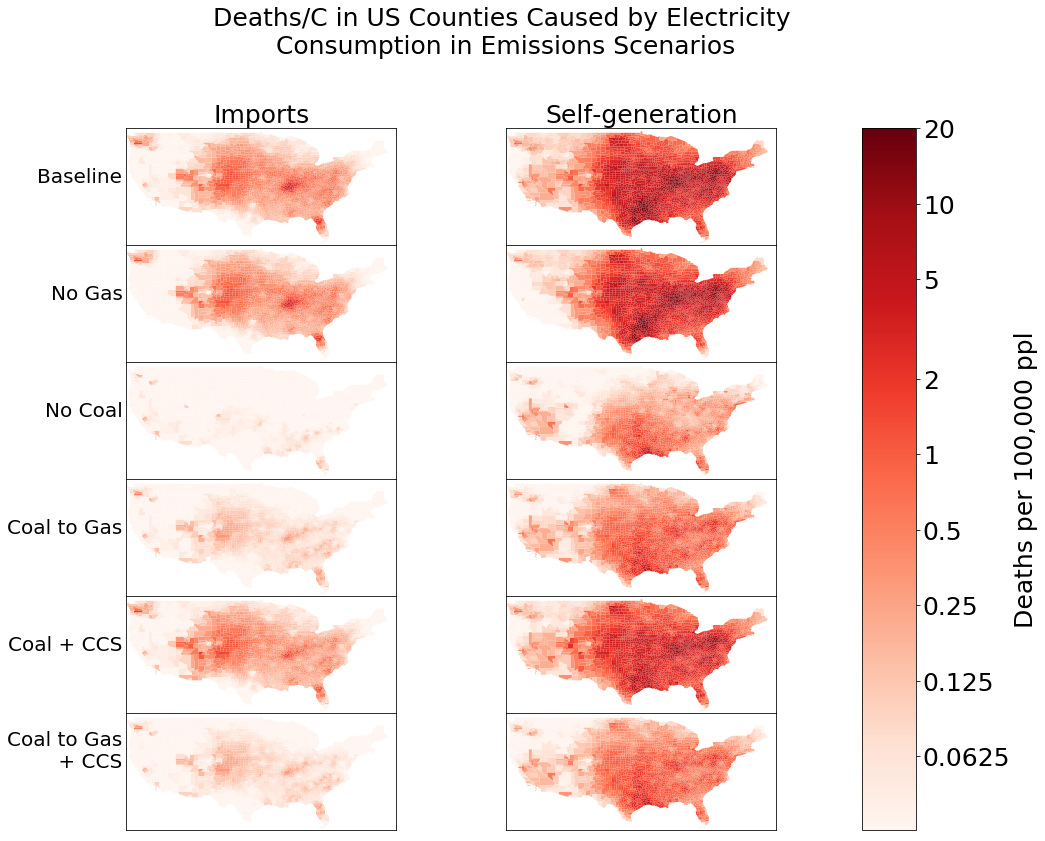

In [104]:
make_total_county_maps_all(mapping_data)

In [220]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

BA_colors = [
    'rgba(220,20,60,0.5)',
    'rgba(255,165,0,0.5)',
    'rgba(255,215,0,0.5)',
    'rgba(60,179,113,0.5)',
    'rgba(64,224,208,0.5)',
    'rgba(100,149,237,0.5)',
    'rgba(147,112,219,0.5)',
    'rgba(238,130,238,0.5)',
    'rgba(255,192,203,0.5)',
    'rgba(210,105,30,0.5)', 
    'rgba(210,210,210,0.5)' 
]

def make_sankey_imports(region_imports):
    n = 10
    region_imports.loc["Total"] = region_imports.sum()
    region_imports_sorted = region_imports.sort_values(by = "Total", ascending = False, axis = 1)
    #print(region_self_sorted.keys())
    region_imports_sorted.drop(["Total"], inplace = True)
    region_imports_topn = region_imports_sorted.T.iloc[0:n]
    region_imports_topn.loc["Other"] = region_imports_sorted.iloc[:,n:].sum(axis = 1)
    #print(region_self_topn)

    labels_BA = region_imports_topn.index.tolist()
    labels_regions = region_imports_topn.keys().tolist()

    labels = labels_BA  + labels_regions
    ID = range(0,len(labels))

    df_nodes = pd.DataFrame({"ID": ID, 'Label':labels})
    df_nodes["Color"] = ['rgba(220,20,60,1)',
                        'rgba(255,165,0,1)',
                        'rgba(255,215,0,1)',
                        'rgba(60,179,113,1)',
                        'rgba(64,224,208,1)',
                        'rgba(100,149,237,1)',
                        'rgba(147,112,219,1)',
                        'rgba(238,130,238,1)',
                        'rgba(255,192,203,1)',
                        'rgba(210,105,30,1)',
                        'rgba(210,210,210,0.5)', 
                        'rgba(128,0,0, 0.9)',
                        'rgba(85,107,47, 0.9)',
                        'rgba(47,79,79, 0.9)',
                        'rgba(75,0,130, 0.9)',
                        'rgba(139,69,19, 0.9)',
                        'rgba(112,128,144, 0.9)',
                        'rgba(25,25,112, 0.9)']

    df_links = pd.DataFrame(columns = ["Source", "Target","Value","Link Color"])
    print(df_links)

    for BA in labels_BA:
        #print(BA)
        for region in labels_regions:
            #print(region)
            source = df_nodes[df_nodes["Label"]==BA].index.values[0]
            #print(source)
            reg = df_nodes[df_nodes["Label"]==region].index.values[0]
            #print(st)
            #df_links = links_df.append({"Source":source, "Target":st, "Value":states_imports.loc[BA, state], "Link Color":"Red"}, ignore_index = True)
            BA_index = region_imports_topn.index.get_loc(BA)
            df_links.loc[len(df_links.index)] = [source, reg, region_imports_topn.loc[BA, region], BA_colors[BA_index]]




    # Sankey plot setup
    data_trace = dict(
        type='sankey',
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 10,
        # thickness = 30,
          line = dict(
            color = "black",
            width = 0
          ),
          label =  df_nodes['Label'].dropna(axis=0, how='any'),
          color = df_nodes['Color']
        ),
        link = dict(
          source = df_links['Source'].dropna(axis=0, how='any'),
          target = df_links['Target'].dropna(axis=0, how='any'),
          value = df_links['Value'].dropna(axis=0, how='any'),
          color = df_links['Link Color'].dropna(axis=0, how='any'),
      )
    )

    layout = dict(
            title = "Locations of Mortalities Caused by Consumption of <br>Electricity Imports in Most Damaging BAs",
        height = 772,
        width = 500,
        font = dict(
          size = 10),)

    fig = dict(data=[data_trace], layout=layout)
    iplot(fig, validate=False)

In [310]:
make_sankey_imports(region_imports_baseline)

Empty DataFrame
Columns: [Source, Target, Value, Link Color]
Index: []


In [35]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

BA_colors = [
    'rgba(220,20,60,0.5)',
    'rgba(255,165,0,0.5)',
    'rgba(255,215,0,0.5)',
    'rgba(60,179,113,0.5)',
    'rgba(64,224,208,0.5)',
    'rgba(100,149,237,0.5)',
    'rgba(147,112,219,0.5)',
    'rgba(238,130,238,0.5)',
    'rgba(255,192,203,0.5)',
    'rgba(210,105,30,0.5)', 
    'rgba(210,210,210,0.5)' 
]

def make_sankey_self(region_self):
    n = 10
    region_self.loc["Total"] = region_self.sum()
    region_self_sorted = region_self.sort_values(by = "Total", ascending = False, axis = 1)
    #print(region_self_sorted.keys())
    region_self_sorted.drop(["Total"], inplace = True)
    region_self_topn = region_self_sorted.T.iloc[0:n]
    region_self_topn.loc["Other"] = region_self_sorted.iloc[:,n:].sum(axis = 1)
    #print(region_self_topn)

    labels_BA = region_self_topn.index.tolist()
    labels_regions = region_self_topn.keys().tolist()

    labels = labels_BA  + labels_regions
    ID = range(0,len(labels))

    df_nodes = pd.DataFrame({"ID": ID, 'Label':labels})
    df_nodes["Color"] = ['rgba(220,20,60,1)',
                        'rgba(255,165,0,1)',
                        'rgba(255,215,0,1)',
                        'rgba(60,179,113,1)',
                        'rgba(64,224,208,1)',
                        'rgba(100,149,237,1)',
                        'rgba(147,112,219,1)',
                        'rgba(238,130,238,1)',
                        'rgba(255,192,203,1)',
                        'rgba(210,105,30,1)',
                        'rgba(210,210,210,0.5)', 
                        'rgba(128,0,0, 0.9)',
                        'rgba(85,107,47, 0.9)',
                        'rgba(47,79,79, 0.9)',
                        'rgba(75,0,130, 0.9)',
                        'rgba(139,69,19, 0.9)',
                        'rgba(112,128,144, 0.9)',
                        'rgba(25,25,112, 0.9)']

    df_links = pd.DataFrame(columns = ["Source", "Target","Value","Link Color"])
    print(df_links)

    for BA in labels_BA:
        #print(BA)
        for region in labels_regions:
            #print(region)
            source = df_nodes[df_nodes["Label"]==BA].index.values[0]
            #print(source)
            reg = df_nodes[df_nodes["Label"]==region].index.values[0]
            #print(st)
            #df_links = links_df.append({"Source":source, "Target":st, "Value":states_imports.loc[BA, state], "Link Color":"Red"}, ignore_index = True)
            BA_index = region_self_topn.index.get_loc(BA)
            df_links.loc[len(df_links.index)] = [source, reg, region_self_topn.loc[BA, region], BA_colors[BA_index]]




    # Sankey plot setup
    data_trace = dict(
        type='sankey',
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 10,
        # thickness = 30,
          line = dict(
            color = "black",
            width = 0
          ),
          label =  df_nodes['Label'].dropna(axis=0, how='any'),
          color = df_nodes['Color']
        ),
        link = dict(
          source = df_links['Source'].dropna(axis=0, how='any'),
          target = df_links['Target'].dropna(axis=0, how='any'),
          value = df_links['Value'].dropna(axis=0, how='any'),
          color = df_links['Link Color'].dropna(axis=0, how='any'),
      )
    )

    layout = dict(
            title = "Locations of Mortalities Caused by Consumption of <br>Electricity Self-Generation in Most Damaging BAs",
        height = 772,
        width = 500,
        font = dict(
          size = 10),)

    fig = dict(data=[data_trace], layout=layout)
    iplot(fig, validate=False)

In [311]:
make_sankey_self(region_self_baseline)

Empty DataFrame
Columns: [Source, Target, Value, Link Color]
Index: []


In [76]:
region_imports_baseline.sum(axis=1)

PADD
Central Atlantic      79.683692
Gulf Coast            57.925525
Lower Atlantic       193.220994
Midwest              283.965171
New England            4.124440
Rocky Mountain        27.798925
West Coast            46.291123
Total               6237.088830
dtype: float64

In [81]:
region_imports_gasCCS.sum(axis=1)

PADD
Central Atlantic     77.413366
Gulf Coast           57.337797
Lower Atlantic      187.975058
Midwest             283.198346
New England           4.061631
Rocky Mountain       27.332061
West Coast           37.861009
dtype: float64

In [82]:
(region_imports_baseline.sum(axis=1) - region_imports_gasCCS.sum(axis=1))/region_imports_baseline.sum(axis=1)

PADD
Central Atlantic    0.028492
Gulf Coast          0.010146
Lower Atlantic      0.027150
Midwest             0.002700
New England         0.015228
Rocky Mountain      0.016794
Total                    NaN
West Coast          0.182111
dtype: float64

In [108]:
max(total_self_i_l["total_deaths"].values())

2285.8418546817106

In [136]:
total_self_i_l["total_deaths"]
sorted(total_imports_i_l["total_deaths"].items(), key=lambda x:x[1])

[('SPA', 0.0002574288153274676),
 ('CHPD', 0.0021074615418208175),
 ('EEI', 0.0059491252581695565),
 ('NBSO', 0.009400973007233766),
 ('GRIF', 0.013202009122720692),
 ('DOPD', 0.02707547711381654),
 ('WWA', 0.052971461641725066),
 ('GWA', 0.07273032285037143),
 ('GCPD', 0.0852096306953952),
 ('DEAA', 0.08825533767909471),
 ('SEC', 0.19981409096109534),
 ('GVL', 0.2032303750074667),
 ('HST', 0.3274872713306376),
 ('NSB', 0.35636568286208725),
 ('TIDC', 0.4175236056300191),
 ('IID', 0.43291978546968496),
 ('GRMA', 0.5454450055671465),
 ('HGMA', 0.7610009055818006),
 ('NWMT', 0.8335905560668966),
 ('YAD', 0.8433311962928874),
 ('OVEC', 0.8777317057536181),
 ('TPWR', 1.021664236840699),
 ('TAL', 1.1420921504044397),
 ('SEPA', 1.2159397983034492),
 ('WACM', 1.216126782530797),
 ('SCL', 1.6548443431418536),
 ('WAUW', 1.6986764369711618),
 ('PACW', 2.330066383983144),
 ('AVA', 2.592025081031324),
 ('SRP', 2.608070979823076),
 ('BANC', 2.634017598670241),
 ('JEA', 2.8464538843489366),
 ('TEC',

In [57]:
def calc_avg_effects(results_imports, results_self, gen_table):
    summary = gen_table.copy()
    summary["Imports CO2"] = 0
    summary["Self-gen CO2"] = 0
    summary["Imports deaths"] = 0
    summary["Self-gen deaths"] = 0
    summary["CO2/TWh_self"] = 0
    summary["CO2/TWh_imports"] = 0
    summary["deaths/TWh_self"] = 0 
    summary["deaths/TWh_imports"] = 0
    #print(summary)
    
    for BA in gen_table.index:
        #print(BA)
        if BA in results_imports.keys():
            CO2_imports = results_imports[BA]["emissions"][2]
            summary.loc[BA,"Imports CO2"] = CO2_imports
            NOX_imports = results_imports[BA]["emissions"][1]
            summary.loc[BA,"Imports NOX"] = NOX_imports
            SO2_imports = results_imports[BA]["emissions"][0]
            summary.loc[BA,"Imports SO2"] = SO2_imports
            
            Imports_deaths = results_imports[BA]["results_BA"]["Deaths"].sum()
            summary.loc[BA,"Imports deaths"] = Imports_deaths
            
            summary.loc[BA,"CO2/TWh_imports"] = summary.loc[BA,"Imports CO2"]/summary.loc[BA, "Imports"]
            summary.loc[BA,"NOX/TWh_imports"] = summary.loc[BA,"Imports NOX"]/summary.loc[BA, "Imports"]
            summary.loc[BA,"SO2/TWh_imports"] = summary.loc[BA,"Imports SO2"]/summary.loc[BA, "Imports"]
            summary.loc[BA,"deaths/TWh_imports"] = summary.loc[BA,"Imports deaths"]/summary.loc[BA, "Imports"]
            
            
            
            
        if BA in results_self.keys():
            #print(BA)
            CO2_self = results_self[BA]["emissions"][2]
            summary.loc[BA,"Self-gen CO2"] = CO2_self
            NOX_self = results_self[BA]["emissions"][1]
            summary.loc[BA,"Self-gen NOX"] = NOX_self
            SO2_self = results_self[BA]["emissions"][0]
            summary.loc[BA,"Self-gen SO2"] = SO2_self
            
            Self_deaths = results_self[BA]["results_BA"]["Deaths"].sum()
            summary.loc[BA,"Self-gen deaths"] = Self_deaths
            
            summary.loc[BA,"CO2/TWh_self"] = summary.loc[BA,"Self-gen CO2"]/summary.loc[BA, "Self-generation"]
            summary.loc[BA,"NOX/TWh_self"] = summary.loc[BA,"Self-gen NOX"]/summary.loc[BA, "Self-generation"]
            summary.loc[BA,"SO2/TWh_self"] = summary.loc[BA,"Self-gen SO2"]/summary.loc[BA, "Self-generation"]
            summary.loc[BA,"deaths/TWh_self"] = summary.loc[BA,"Self-gen deaths"]/summary.loc[BA, "Self-generation"]
            
        
    summary.loc["Total"] = summary.sum()
    summary.loc["Total","CO2/TWh_imports"] = summary.loc["Total","Imports CO2"]/summary.loc["Total","Imports"]
    summary.loc["Total","NOX/TWh_imports"] = summary.loc["Total","Imports NOX"]/summary.loc["Total","Imports"]
    summary.loc["Total","SO2/TWh_imports"] = summary.loc["Total","Imports SO2"]/summary.loc["Total","Imports"]
    summary.loc["Total","deaths/TWh_imports"] = summary.loc["Total","Imports deaths"]/summary.loc["Total","Imports"]
    summary.loc["Total","CO2/TWh_self"] = summary.loc["Total","Self-gen CO2"]/summary.loc["Total","Self-generation"]
    summary.loc["Total","NOX/TWh_self"] = summary.loc["Total","Self-gen NOX"]/summary.loc["Total","Self-generation"]
    summary.loc["Total","SO2/TWh_self"] = summary.loc["Total","Self-gen SO2"]/summary.loc["Total","Self-generation"]
    summary.loc["Total","deaths/TWh_self"] = summary.loc["Total","Self-gen deaths"]/summary.loc["Total","Self-generation"]

    national_avg = {
    "deaths_twh_self" : summary.loc["Total","Self-gen deaths"]/summary.loc["Total","Self-generation"],
    #print(summary.loc["Total","Self-gen deaths"])
    "deaths_twh_imports" : summary.loc["Total","Imports deaths"]/summary.loc["Total","Imports"],
    "co2_twh_self" : summary.loc["Total","Self-gen CO2"]/summary.loc["Total","Self-generation"],
    "nox_twh_self" : summary.loc["Total","Self-gen NOX"]/summary.loc["Total","Self-generation"],
    "so2_twh_self" : summary.loc["Total","Self-gen SO2"]/summary.loc["Total","Self-generation"],
    "co2_twh_imports" : summary.loc["Total","Imports CO2"]/summary.loc["Total","Imports"],
    "nox_twh_imports" : summary.loc["Total","Imports NOX"]/summary.loc["Total","Imports"],
    "so2_twh_imports" : summary.loc["Total","Imports SO2"]/summary.loc["Total","Imports"]}

    summary["CO2_diff"] = summary["CO2/TWh_imports"]-summary["CO2/TWh_self"]
    summary["NOX_diff"] = summary["NOX/TWh_imports"]-summary["NOX/TWh_self"]
    summary["SO2_diff"] = summary["SO2/TWh_imports"]-summary["SO2/TWh_self"]
    summary["deaths_diff"] = summary["deaths/TWh_imports"]-summary["deaths/TWh_self"]
    summary["CO2_pct_diff"] = summary["CO2_diff"]/summary["CO2/TWh_self"]*100
    summary["NOX_pct_diff"] = summary["NOX_diff"]/summary["NOX/TWh_self"]*100
    summary["SO2_pct_diff"] = summary["SO2_diff"]/summary["SO2/TWh_self"]*100
    summary["deaths_pct_diff"] = summary["deaths_diff"]/summary["deaths/TWh_self"]*100
    summary["CO2_pct_imports"] = summary["Imports CO2"]/(summary["Imports CO2"]+summary["Self-gen CO2"])*100
    summary["NOX_pct_imports"] = summary["Imports NOX"]/(summary["Imports NOX"]+summary["Self-gen NOX"])*100
    summary["SO2_pct_imports"] = summary["Imports SO2"]/(summary["Imports SO2"]+summary["Self-gen SO2"])*100
    summary["deaths_pct_imports"] = summary["Imports deaths"]/(summary["Imports deaths"]+summary["Self-gen deaths"])*100


         
        
        
    #print(summary)
    return summary, national_avg
 

In [58]:
summary, nat_avg = calc_avg_effects(results_imports_i_L, results_self_i_L, gen_i_L)

In [63]:
def make_difference_maps (summary):
    from matplotlib.colors import DivergingNorm
    
    Control_areas = gpd.read_file("Control_Areas.shp")
    #mapping_ISRM_k = Control_areas.merge(deaths_bar)

    BA = pd.read_csv("ba_tz.csv")
    BA["NAME"]=BA["BANAME"].str.upper()
    Control_areas=Control_areas.merge(BA,how="left",left_on="NAME",right_on = "NAME")
     

    mapping_df = Control_areas.merge(summary, how="left",left_on="BACODE",right_index = True)
    mapping_df.replace([np.inf, -np.inf], np.nan)
    
    print(mapping_df.dtypes)

    from mpl_toolkits.axes_grid1 import make_axes_locatable

    matplotlib.rcParams.update({'font.size': 24})
    ########Imports
    fig=plt.figure(figsize=(20,20))
    
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Percent Difference between Deaths/TWh caused by Imports and Self-generation")
    ax.set_xticks([])
    ax.set_yticks([])
    
    mapping_df["deaths_pct_diff"].fillna(0)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="deaths_pct_diff", ax = ax, cmap = "coolwarm",vmin = -200, vmax = 200, cax=cax,legend=True, legend_kwds={'label': "Imports - Self-generation",'orientation': "vertical"})

    fig=plt.figure(figsize=(20,20))
    
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Percent Difference between NOX emissions/TWh caused by Imports and Self-generation")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="NOX_pct_diff", ax = ax, cmap = "coolwarm",vmin = -200, vmax = 200, cax=cax,legend=True, legend_kwds={'label': "Imports - Self-generation",'orientation': "vertical"})

    fig=plt.figure(figsize=(20,20))
    
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Percent Difference between SO2 emissions/TWh caused by Imports and Self-generation")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="SO2_pct_diff", ax = ax, cmap = "coolwarm",vmin = -200, vmax = 200, cax=cax,legend=True, legend_kwds={'label': "Imports - Self-generation",'orientation': "vertical"})



    #fig.savefig("2019_final/Difference_map_deaths_twh.png", bbox_inches="tight")

    
    
    fig=plt.figure(figsize=(20,20))
    
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Percent Difference between CO2/TWh caused by Imports and Self-generation")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="CO2_pct_diff", ax = ax, cmap = "Reds",vmin = -200, vmax = 200,cax=cax,legend=True, legend_kwds={'label': "Imports - Self-generation",'orientation': "vertical"})

    #fig.savefig("2019_final/Difference_map_deaths_co2.png", bbox_inches="tight")
    
    
    
    
    
    fig=plt.figure(figsize=(20,20))
    
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Percent of CO2 Emissions caused by Imports in each BA")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="CO2_pct_imports", ax = ax, cmap = "Reds",vmin = 0, vmax = 100,cax=cax,legend=True, legend_kwds={'label': "Percent of CO2 Emissions",'orientation': "vertical"})

    #fig.savefig("2019_final/Pct_imports_co2.png", bbox_inches="tight")
    
    fig=plt.figure(figsize=(20,20))
    
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    #ax.set_title("Percent of Premature Mortalities caused by Imports in each BA")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="deaths_pct_imports", ax = ax, cmap = "YlOrRd",vmin = 0, vmax = 100,cax=cax,legend=True, legend_kwds={'label': "Percent of Premature Mortalities",'orientation': "vertical"})

    fig.savefig("Paper_figures/Pct_imports_deaths_new.png", bbox_inches="tight")
    
    fig=plt.figure(figsize=(20,20))
    
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Percent of NOX emissions caused by Imports in each BA")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="NOX_pct_imports", ax = ax, cmap = "Purples",vmin = 0, vmax = 100,cax=cax,legend=True, legend_kwds={'label': "Percent of Premature Mortalities",'orientation': "vertical"})

    fig.savefig("Paper_figures/Pct_imports_nox.png", bbox_inches="tight")
    
    fig=plt.figure(figsize=(20,20))
    
    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Percent of SO2 emissions caused by Imports in each BA")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="SO2_pct_imports", ax = ax, cmap = "Greens",vmin = 0, vmax = 100,cax=cax,legend=True, legend_kwds={'label': "Percent of Premature Mortalities",'orientation': "vertical"})

    fig.savefig("Paper_figures/Pct_imports_so2.png", bbox_inches="tight")

OBJECTID                int64
ID                     object
NAME                   object
ADDRESS                object
CITY                   object
                       ...   
deaths_pct_diff       float64
CO2_pct_imports       float64
NOX_pct_imports       float64
SO2_pct_imports       float64
deaths_pct_imports    float64
Length: 62, dtype: object


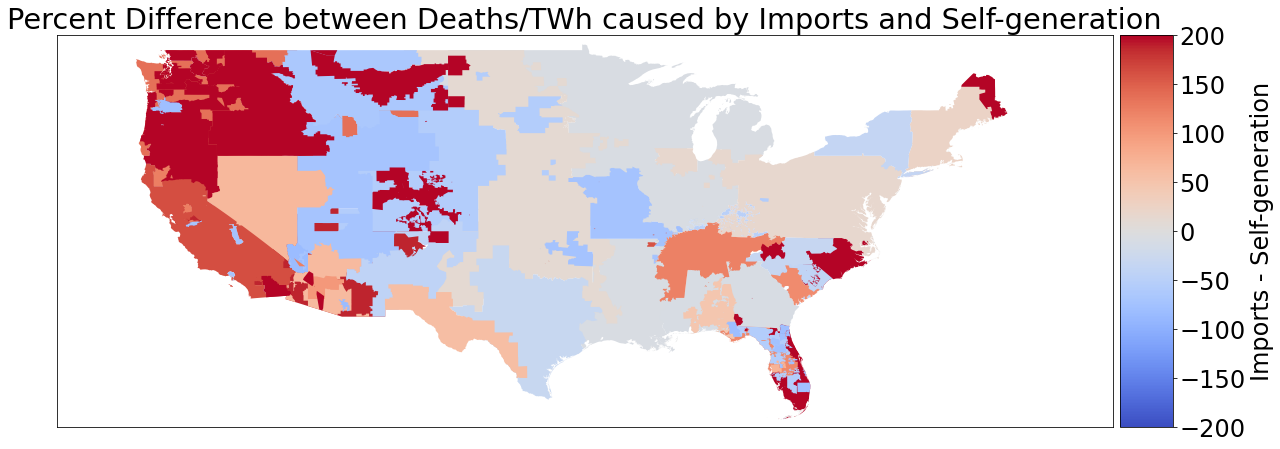

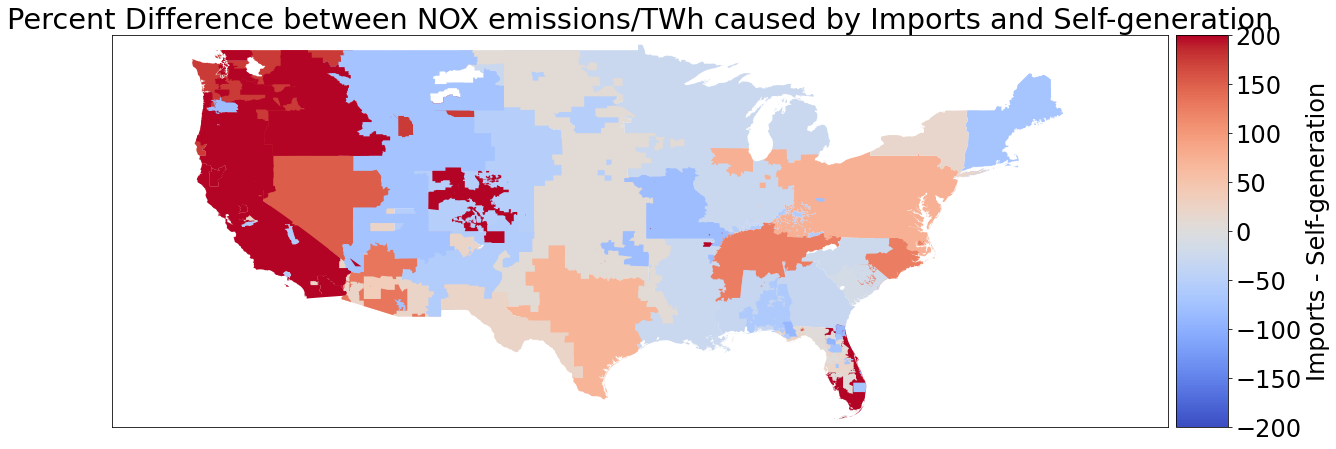

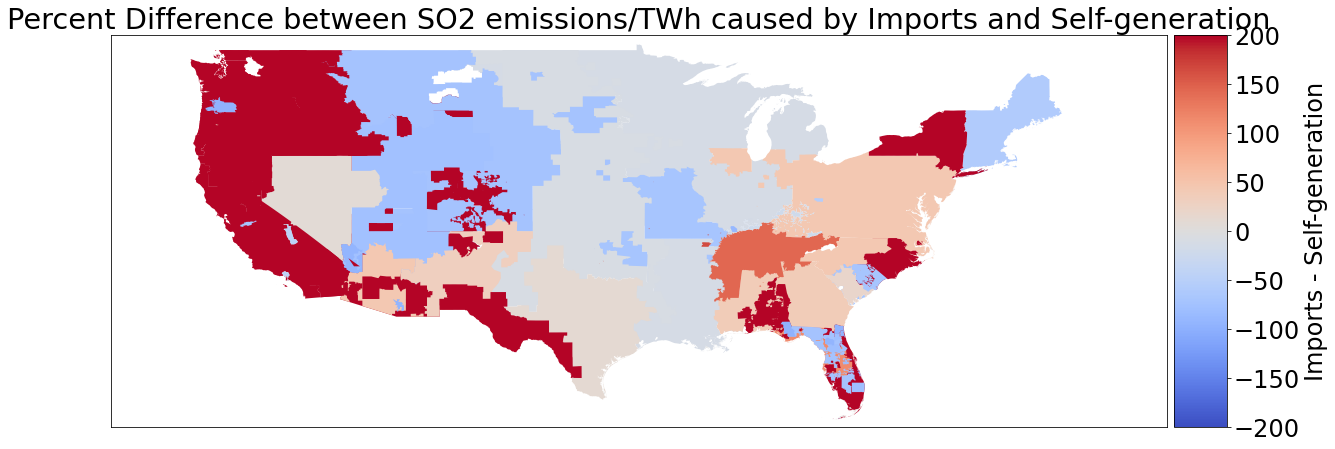

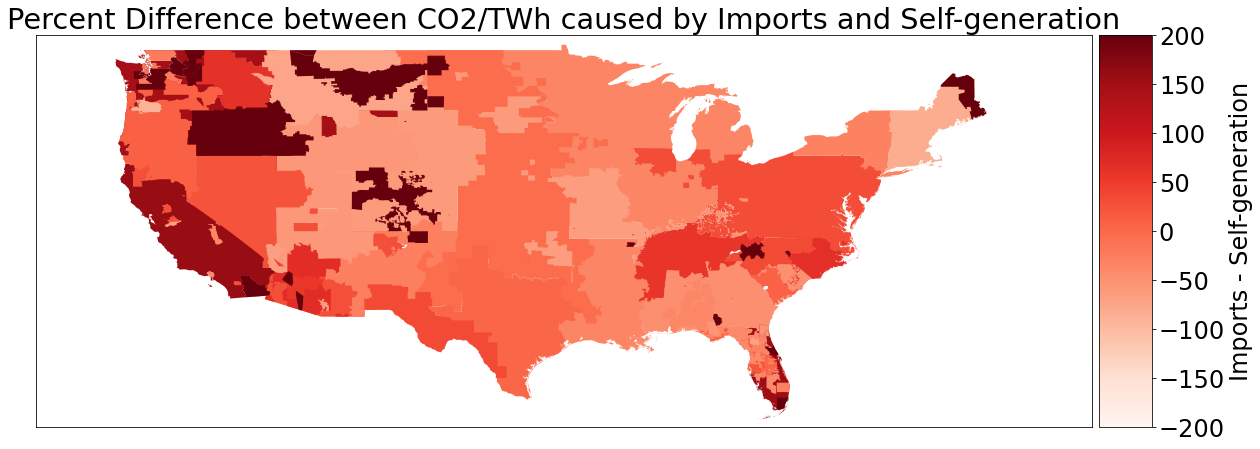

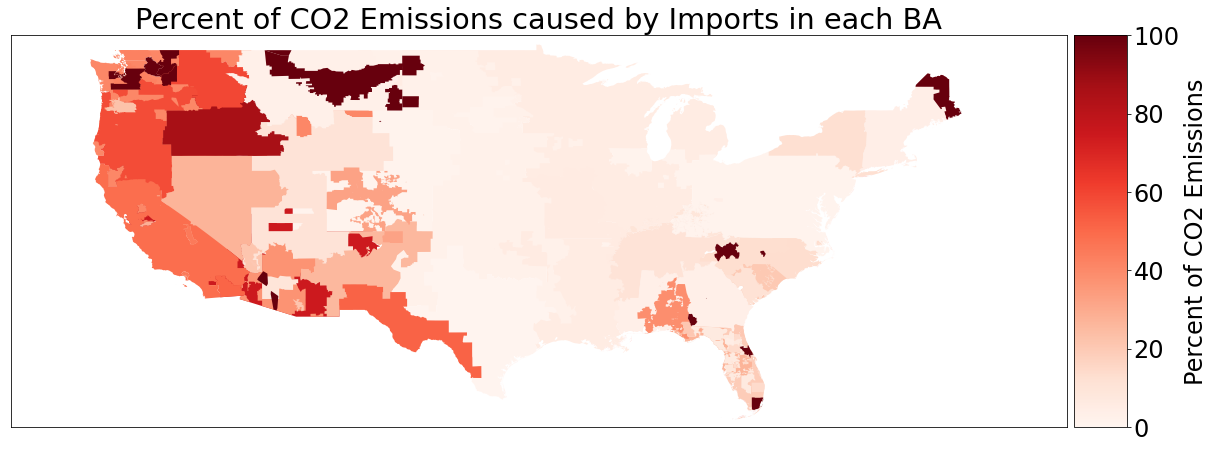

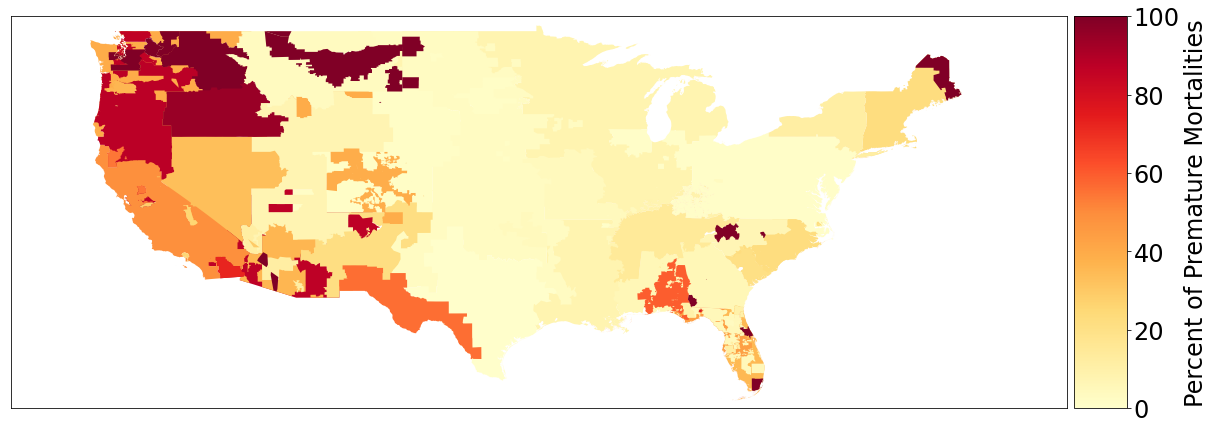

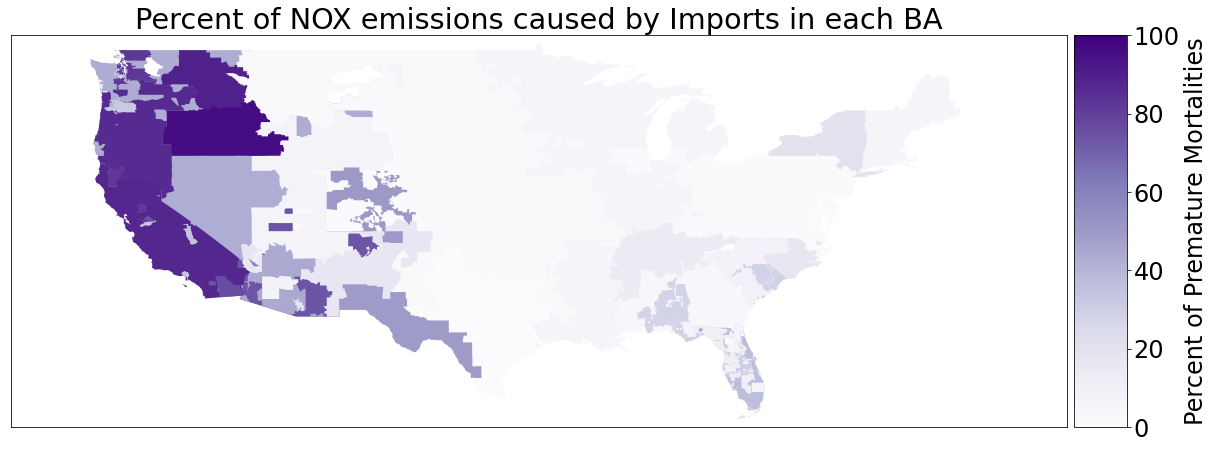

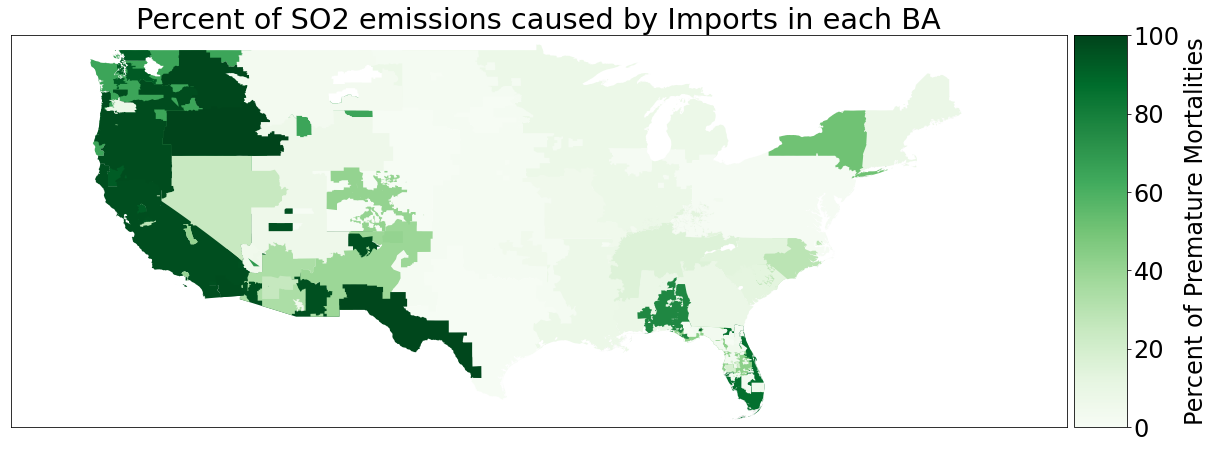

In [64]:
make_difference_maps (summary)

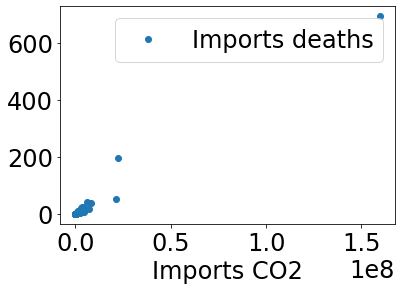

In [487]:
summary[summary["Total Demand"] > 0].plot(x = "Imports CO2", y = "Imports deaths", style = 'o')
summary["Imports CO2 log"] = np.log10(summary["Imports CO2"]+0.01)
summary["Imports deaths log"] = np.log10(summary["Imports deaths"]+0.01)
summary["Self-gen CO2 log"] = np.log10(summary["Self-gen CO2"]+0.01)
summary["Self-gen deaths log"] = np.log10(summary["Self-gen deaths"]+0.01)

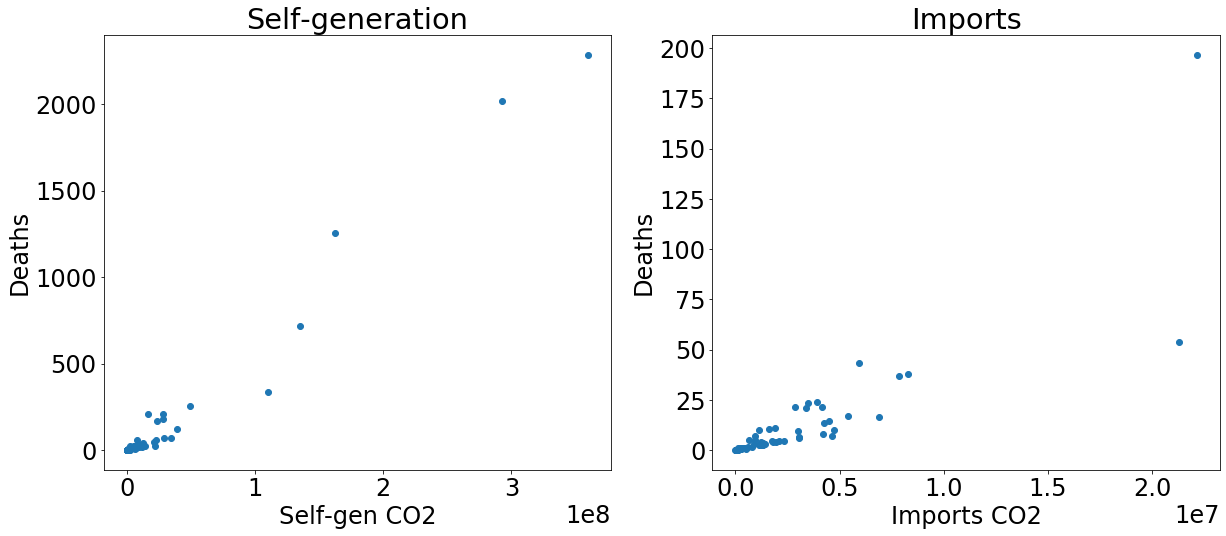

In [508]:
plot_summary = summary[0:len(summary)-1]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax = axes.flat[0]
#ax.set_xlim([0,0.5*1e8])
#ax.set_ylim([0,1000])
ax.set_ylabel("Deaths")
ax.set_title("Self-generation")
ax.set_xlabel("CO2 Emissions (Metric tonnes)")
plot_summary[plot_summary["Total Demand"] > 0].plot(x = "Self-gen CO2", y = "Self-gen deaths", style = 'o', ax = ax, legend = None)

ax = axes.flat[1]
#ax.set_xlim([0,0.3*1e8])
#ax.set_ylim([0,200])
ax.set_ylabel("Deaths")
ax.set_title("Imports")
ax.set_xlabel("CO2 Emissions (Metric tonnes)")
plot_summary[plot_summary["Total Demand"] > 0].plot(x = "Imports CO2", y = "Imports deaths", style = 'o', ax = ax, legend = None)

fig.savefig("Paper_figures/CO2_death_plot.png")

In [501]:
plot_summary

Imports Self-generation Total Demand   Imports CO2  Self-gen CO2  \
BACODE                                                                       
HECO            0               0            0  0.000000e+00  0.000000e+00   
CEA             0               0            0  0.000000e+00  0.000000e+00   
AMPL            0               0            0  0.000000e+00  0.000000e+00   
PGE     15.103814        5.530137    20.633951  1.940558e+06  6.507235e+06   
BANC     5.953949       11.228933    17.182881  1.299953e+06  1.893967e+06   
SCL      5.235721               0     5.235721  7.886171e+05  0.000000e+00   
TPWR     3.656402               0     3.656402  4.844986e+05  0.000000e+00   
PSEI    14.841265       15.622297    30.463562  1.795463e+06  2.420074e+06   
PACW    11.681318        9.290423    20.971741  1.216663e+06  8.763903e+05   
TIDC     1.549904        1.176346     2.726249  2.046721e+05  5.192652e+05   
CHPD     0.177445               0     0.177445  7.890945e+03  0.000000e+00   
DOPD     0.211191               0     0.211191  1.220607e+04  0.000000e+00   
CISO    57.467184      157.908508   215.375692  2.130854e+07  2.256129e+07   
GCPD     0.952865               0     0.952865  1.373800e+05  0.000000e+00   
BPAT     9.547939       34.344091     43.89203  3.060182e+06  4.453515e+06   
LDWP    14.660786       11.651437    26.312222  4.637290e+06  5.646765e+06   
AVA      6.264313        7.044343    13.308656  1.150605e+06  7.915243e+05   
NEVP     8.772819       29.180672    37.953491  4.494940e+06  1.206689e+07   
IPCO     6.035546       12.383896    18.419441  5.407116e+06  8.453232e+05   
IID      0.813786        2.934367     3.748153  2.524753e+05  2.398861e+05   
WALC     6.457034        2.843001     9.300035  3.049199e+06  1.046536e+06   
GRIF     0.022801        0.120081     0.142882  1.298118e+04  4.863788e+04   
TEPC     6.025498        7.525345    13.550843  2.351357e+06  8.528476e+06   
HGMA      1.19864               0      1.19864  4.926842e+05  0.000000e+00   
DEAA     0.115208        0.780159     0.895367  5.439852e+04  3.727310e+05   
GRMA     0.969556               0     0.969556  2.772633e+05  0.000000e+00   
GWA       0.04115               0      0.04115  3.119648e+04  0.000000e+00   
SRP      1.854548       27.552837    29.407385  1.257918e+06  1.204543e+07   
WWA      0.031007               0     0.031007  2.295522e+04  0.000000e+00   
AZPS     8.420304       24.090549    32.510853  4.191683e+06  7.069452e+06   
PACE    11.182732       38.875684    50.058416  4.737764e+06  3.883082e+07   
NWMT     1.300234       11.959469    13.259702  2.717520e+05  9.311701e+06   
WAUW     0.743404               0     0.743404  5.954632e+05  0.000000e+00   
PSCO     6.024853       42.173446    48.198299  6.896675e+06  1.417973e+07   
PNM      4.773235        9.982975    14.756209  2.101449e+06  6.001470e+06   
WACM     0.970635       24.763396    25.734031  4.417321e+05  2.871768e+07   
EPE      3.892896        4.828229     8.721125  3.006543e+06  2.787692e+06   
GRIS            0               0            0  0.000000e+00  0.000000e+00   
SWPP     6.873743      262.985685   269.859427  3.369444e+06  1.351292e+08   
ERCO     2.149522       381.35048   383.500002  9.463587e+05  1.621412e+08   
AECI     3.603306       20.254421    23.857727  1.125211e+06  1.688643e+07   
MISO    55.403557      595.740174   651.143731  2.214288e+07  3.596793e+08   
SPA      0.000031        0.009111     0.009142  2.505363e+01  1.781451e+03   
EEI      0.001733        0.007525     0.009258  9.457061e+02  8.711016e+03   
TVA     11.217995      147.518402   158.736396  5.921695e+06  4.910598e+07   
AEC      1.912683        1.906384     3.819067  6.590478e+05  1.035331e+06   
LGEE     5.899947       29.995544    35.895491  2.839726e+06  2.840528e+07   
SOCO    15.706568      223.261333     238.9679  4.164854e+06  1.102974e+08   
SEPA     0.994928               0     0.994928  4.666753e+05  0.000000e+00   
TAL      0.766677        2.06260

In [257]:
summary

Imports Self-generation Total Demand   Imports CO2  Self-gen CO2  \
BACODE                                                                        
HECO             0               0            0  0.000000e+00  0.000000e+00   
CEA              0               0            0  0.000000e+00  0.000000e+00   
AMPL             0               0            0  0.000000e+00  0.000000e+00   
PGE      15.103814        5.530137    20.633951  1.940558e+06  6.507235e+06   
BANC      5.953949       11.228933    17.182881  1.299953e+06  1.893967e+06   
...            ...             ...          ...           ...           ...   
CPLE      5.377193        58.20639    63.583583  1.913775e+06  1.241433e+07   
NYIS     27.323416      128.055579   155.378995  3.476332e+06  2.355448e+07   
ISNE     22.420824       95.531341   117.952166  9.300686e+05  2.166838e+07   
NBSO      0.041768               0     0.041768  9.849216e+03  0.000000e+00   
Total   447.149192     3571.083382  4018.232574  1.596415e+08  1.529681e+09   

        Imports deaths  Self-gen deaths  CO2/TWh_self  CO2/TWh_imports  \
BACODE                                                                   
HECO          0.000000         0.000000  0.000000e+00         0.000000   
CEA           0.000000         0.000000  0.000000e+00         0.000000   
AMPL          0.000000         0.000000  0.000000e+00         0.000000   
PGE           4.172389         7.384818  1.176686e+06    128481.294953   
BANC          2.634018         2.216150  1.686685e+05    218334.539987   
...                ...              ...           ...              ...   
CPLE         10.827694        37.776209  2.132813e+05    355906.019019   
NYIS         23.169307       169.491726  1.839395e+05    127229.048034   
ISNE          6.884764        23.638118  2.268196e+05     41482.355328   
NBSO          0.009401         0.000000  0.000000e+00    235809.765984   
Total       694.540544      8438.513710  4.283521e+05    357020.742396   

        deaths/TWh_self  ...    SO2_diff  deaths_diff  CO2_pct_diff  \
BACODE                   ...                                          
HECO           0.000000  ...         NaN     0.000000           NaN   
CEA            0.000000  ...         NaN     0.000000           NaN   
AMPL           0.000000  ...         NaN     0.000000           NaN   
PGE            1.335377  ... -690.885320    -1.059130    -89.081090   
BANC           0.197361  ...   18.293703     0.245038     29.445950   
...                 ...  ...         ...          ...           ...   
CPLE           0.649005  ...  113.079388     1.364629     66.871676   
NYIS           1.323579  ...   54.903631    -0.475614    -30.831052   
ISNE           0.247438  ...   -4.708886     0.059632    -81.711299   
NBSO           0.000000  ...         NaN     0.225078           inf   
Total          2.363012  ...  -73.916978    -0.809749    -16.652504   

        NOX_pct_diff  SO2_pct_diff  deaths_pct_diff  CO2_pct_imports  \
BACODE                                                                 
HECO             NaN           NaN              NaN              NaN   
CEA              NaN           NaN              NaN              NaN   
AMPL             NaN           NaN              NaN              NaN   
PGE       -82.676405    -96.863248       -79.313159        22.971180   
BANC      769.368498   2142.627058       124.157283        40.700853   
...              ...           ...              ...              ...   
CPLE      125.235265    347.768247       210.264888        13.356791   
NYIS       17.191039    388.103750       -35.933936        12.860626   
ISNE      -71.303893    -58.034121        24.099621         4.115630   
NBSO             NaN           NaN              inf       100.000000   
Total      -4.373226    -31.164770       -34.267646         9.450033   

        NOX_pct_imports  SO2_pct_imports  deaths_pct_imports  
BACODE                                                        
HECO                NaN          

In [443]:
def make_pct_diff_figure(summary):
    from matplotlib.colors import DivergingNorm
    
    Control_areas = gpd.read_file("Control_Areas.shp")
    #mapping_ISRM_k = Control_areas.merge(deaths_bar)

    BA = pd.read_csv("ba_tz.csv")
    BA["NAME"]=BA["BANAME"].str.upper()
    Control_areas=Control_areas.merge(BA,how="left",left_on="NAME",right_on = "NAME")
     

    mapping_df = Control_areas.merge(summary, how="left",left_on="BACODE",right_index = True)
    mapping_df.replace([np.inf, -np.inf], np.nan, inplace = True)
    
    #print(mapping_df.dtypes)

    from mpl_toolkits.axes_grid1 import make_axes_locatable

    matplotlib.rcParams.update({'font.size': 25})
    ########Imports
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
    fig.suptitle("Percent Difference between Emissions and Deaths per TWh \n Caused by Imports and Self-generation")
    
    ax = axes.flat[0]
    ax.set_xlim([-130, -60])
    ax.set_ylim([24, 50])
    ax.set_title("Deaths/TWh", fontsize = 20)
    ax.set_xticks([])
    ax.set_yticks([])
    
    mapping_df["deaths_pct_diff"].fillna(0, inplace = True)
    mapping_df["NOX_pct_diff"].fillna(0, inplace = True)
    mapping_df["SO2_pct_diff"].fillna(0, inplace = True)

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="deaths_pct_diff", ax=ax, cmap="coolwarm", vmin=-200, vmax=200)#,
#                     cax=cax, legend=True, legend_kwds={'label': "Imports - Self-generation",'orientation': "vertical"})
    
    ax = axes.flat[1]
    ax.set_xlim([-130, -60])
    ax.set_ylim([24, 50])
    ax.set_title("NOX emissions (tonnes/TWh)", fontsize = 20)
    ax.set_xticks([])
    ax.set_yticks([])

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="NOX_pct_diff", ax=ax, cmap="coolwarm", vmin=-200, vmax=200)#,
#                     cax=cax, legend=True, legend_kwds={'label': "Imports - Self-generation",'orientation': "vertical"})
    
    ax = axes.flat[2]
    ax.set_xlim([-130, -60])
    ax.set_ylim([24, 50])
    ax.set_title("SO2 emissions (tonnes/TWh)", fontsize = 20)
    ax.set_xticks([])
    ax.set_yticks([])

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="SO2_pct_diff", ax=ax, cmap="coolwarm", vmin=-200, vmax=200)#,
#                     cax=cax, legend=True, legend_kwds={'label': "Imports - Self-generation",'orientation': "vertical"})

    fig.subplots_adjust(bottom=0.1, top=0.85, left=0.1, right=0.8, wspace=0.01, hspace=0.1)

    sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=-200, vmax=200))
    cax = fig.add_axes([0.83, 0.1, 0.05, 0.75])
    cbar = fig.colorbar(sm, cax=cax)
#     cbar.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     cbar.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label("(Imports - Self-generation)/Total", fontsize=25)
    
    fig.savefig("Paper_figures/pct_diff_fig")

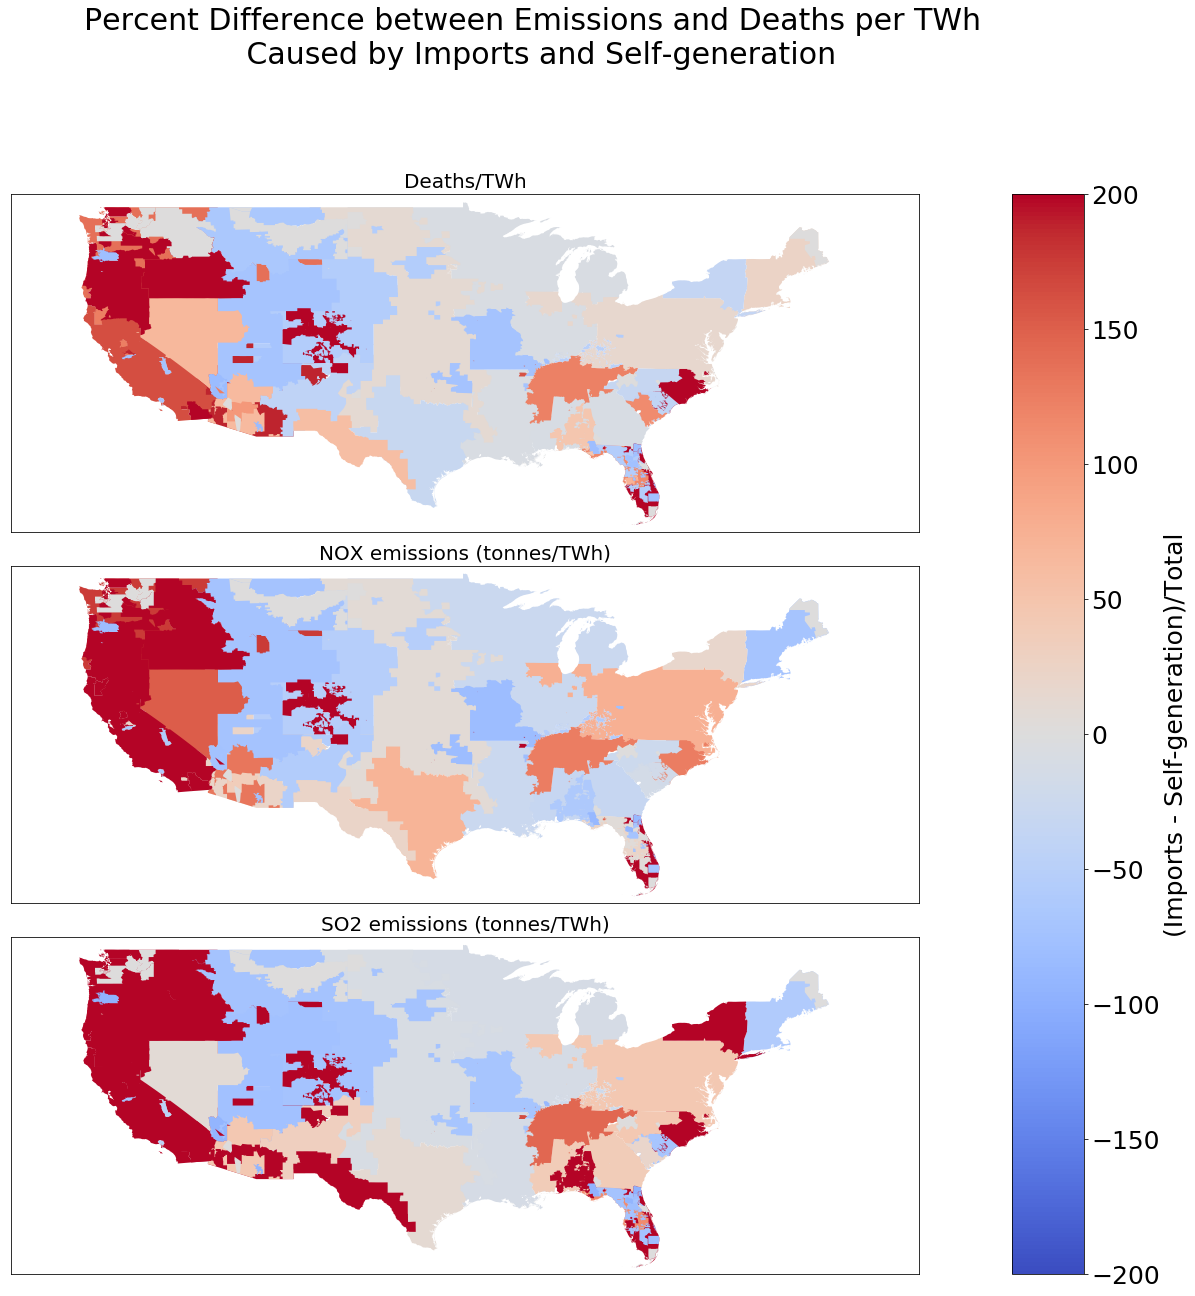

In [444]:
make_pct_diff_figure(summary)

In [328]:
def make_pct_imports_figure(summary):
    from matplotlib.colors import DivergingNorm
    
    Control_areas = gpd.read_file("Control_Areas.shp")
    #mapping_ISRM_k = Control_areas.merge(deaths_bar)

    BA = pd.read_csv("ba_tz.csv")
    BA["NAME"]=BA["BANAME"].str.upper()
    Control_areas=Control_areas.merge(BA,how="left",left_on="NAME",right_on = "NAME")
     

    mapping_df = Control_areas.merge(summary, how="left",left_on="BACODE",right_index = True)
    mapping_df["Total Demand"].replace({0:np.nan},inplace=True)
    mapping_df["gen_pct_imports"] = mapping_df["Imports"]/mapping_df["Total Demand"]*100
    mapping_df.replace([np.inf, -np.inf], np.nan, inplace = True)
    
    print(mapping_df.dtypes)

    from mpl_toolkits.axes_grid1 import make_axes_locatable

    matplotlib.rcParams.update({'font.size': 24})
    ########Imports
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
    
    ax = axes.flat[0]
    ax.set_xlim([-130, -60])
    ax.set_ylim([24, 50])
    ax.set_title("Percent of NOX Emissions Caused by Imports")
    ax.set_xticks([])
    ax.set_yticks([])
    
    mapping_df["deaths_pct_diff"].fillna(0, inplace = True)
    mapping_df["NOX_pct_diff"].fillna(0, inplace = True)
    mapping_df["SO2_pct_diff"].fillna(0, inplace = True)

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="gen_pct_imports", ax=ax, cmap="Reds", vmin=0, vmax=100)#,
#                     cax=cax, legend=True, legend_kwds={'label': "Imports - Self-generation",'orientation': "vertical"})
    
    ax = axes.flat[1]
    ax.set_xlim([-130, -60])
    ax.set_ylim([24, 50])
    ax.set_title("Percent of SO2 Emissions Caused by Imports")
    ax.set_xticks([])
    ax.set_yticks([])

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="SO2_pct_imports", ax=ax, cmap="Reds", vmin=0, vmax=100)#,
#                     cax=cax, legend=True, legend_kwds={'label': "Imports - Self-generation",'orientation': "vertical"})
    
    ax = axes.flat[2]
    ax.set_xlim([-130, -60])
    ax.set_ylim([24, 50])
    ax.set_title("Percent of Deaths Caused by Imports")
    ax.set_xticks([])
    ax.set_yticks([])

#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)
    mapping_df.plot(column="deaths_pct_imports", ax=ax, cmap="Reds", vmin=0, vmax=100)#,
#                     cax=cax, legend=True, legend_kwds={'label': "Imports - Self-generation",'orientation': "vertical"})

    fig.subplots_adjust(bottom=0.1, top=0.85, left=0.1, right=0.8, wspace=0.01, hspace=0)

    sm = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0, vmax=100))
    cax = fig.add_axes([0.83, 0.1, 0.05, 0.75])
    cbar = fig.colorbar(sm, cax=cax)
#     cbar.set_ticks(np.log10([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20]))
#     cbar.set_ticklabels([0.125/2, 0.125, .25, 0.5, 1, 2, 5, 10, 20])
    cbar.ax.tick_params(labelsize=25)
    cbar.set_label("Percent", fontsize=25)

OBJECTID                int64
ID                     object
NAME                   object
ADDRESS                object
CITY                   object
                       ...   
CO2_pct_imports       float64
NOX_pct_imports       float64
SO2_pct_imports       float64
deaths_pct_imports    float64
gen_pct_imports       float64
Length: 63, dtype: object


/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less

/Users/Hennessy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning:

invalid value encountered in less



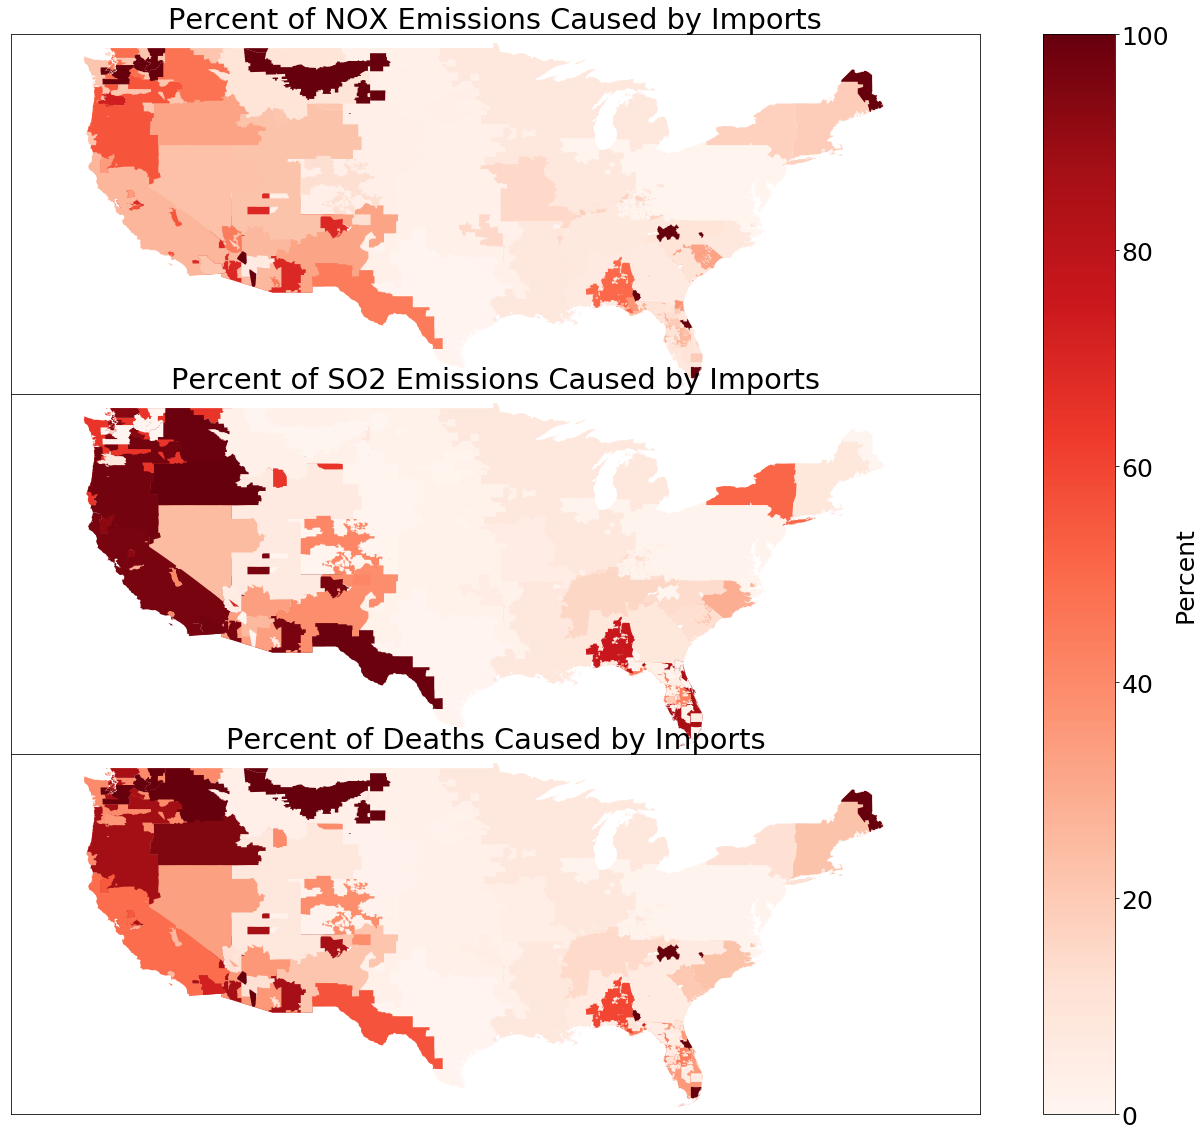

In [329]:
make_pct_imports_figure(summary)

In [347]:
results_self_a_L["AVA"]["plants"]

SOx        NOx     PM2_5   height     diam        temp  \
Plant.Code                                                                
7456        0.459352  28.264521  8.461838  15.8496  4.20624  785.927778   
55179       3.536528  71.400071  0.000000  45.7200  4.72440  422.038889   

            velocity       VOC       NH3                     geometry  \
Plant.Code                                                              
7456        51.20640  2.169679  3.183607  POINT (-116.86731 47.80427)   
55179       20.90928  0.000000  0.000000  POINT (-116.92030 47.78580)   

             NOx_plot  
Plant.Code             
7456        16.958712  
55179       42.840043

In [427]:
def create_co2_map_log(CO2):
    Control_areas = gpd.read_file("Control_Areas.shp")
    BA = pd.read_csv("ba_tz.csv")
    BA["NAME"]=BA["BANAME"].str.upper()
    Control_areas=Control_areas.merge(BA,how="left",left_on="NAME",right_on = "NAME")
    
    CO2_map = Control_areas.merge(CO2.astype(float), how = "right", left_on = "BACODE", right_index = True)
    #CO2_map_imports["CO2"].fillna(0)
    CO2_map["CO2_imports_log"] = np.log10(pd.to_numeric(CO2_map["Imports"]*0.907+0.01))
    CO2_map["CO2_self_log"] = np.log10(pd.to_numeric(CO2_map["Self-generation"]*0.907+0.01))
    CO2_map = CO2_map.loc[range(0,len(CO2_map))]
    
#     CO2_map_self = CO2_map_self.loc[range(0,len(CO2_map_self))]
#     CO2_map_imports = CO2_map_imports.loc[range(0,len(CO2_map_imports))]
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    matplotlib.rcParams.update({'font.size': 24})
    ########Imports
    fig=plt.figure(figsize=(20,20))

    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Total CO2 Emissions from Self-generation in Each Balancing Area")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    CO2_map.plot(column="CO2_self_log", ax = ax, cax=cax, cmap = "YlGnBu",vmin = 3,vmax = CO2_map["CO2_self_log"].max(),legend=True, legend_kwds={'label': "Total CO2 Emissions Caused (Metric Tons)",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "YlGnBu", norm=plt.Normalize(vmin = 3,vmax = CO2_map["CO2_self_log"].max() ))
    cbr = fig.colorbar(sm, cax=cax,)
    cbr.set_ticks([0.01,1,2,3,4,5,6,7,8])
    cbr.set_ticklabels(['1','10e1','$10^2$', '$10^3$', '$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$'])
    cbr.set_label("Metric tons per year")

    fig.savefig("Paper_figures/co2_self_log.png", bbox_inches="tight")
    
    ### Imports
    fig=plt.figure(figsize=(20,20))

    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([-130,-60])
    ax.set_ylim([24,50])
    ax.set_title("Total CO2 Emissions from Imports in Each Balancing Area")
    ax.set_xticks([])
    ax.set_yticks([])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    CO2_map.plot(column="CO2_imports_log", ax = ax, cax=cax, cmap = "YlGnBu",vmin = 3,vmax = CO2["CO2_self_log"].max(),legend=True, legend_kwds={'label': "Total CO2 Emissions Caused (Metric Tons)",'orientation': "vertical"})

    sm = plt.cm.ScalarMappable(cmap = "YlGnBu", norm=plt.Normalize(vmin = 3,vmax = CO2["CO2_self_log"].max() ))
    cbr = fig.colorbar(sm, cax=cax,)
    cbr.set_ticks([0.01,1,2,3,4,5,6,7,8])
    cbr.set_ticklabels(['1','10e1','$10^2$', '$10^3$', '$10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$'])
    cbr.set_label("Metric tons per year")



    fig.savefig("Paper_figures/co2_imports_log.png", bbox_inches="tight")

  

In [393]:
def create_emissions_matrix(results, BA_list):
    BAs = results.keys()
    #print(BAs)
    emissions = pd.DataFrame(index = BAs, columns = ["SO2","NOx","CO2","PM2.5","NH3","VOC"])
    #print(emissions)
    for ba in BAs:
        #print(results[ba]["emissions"])
        emissions.loc[ba,:] = results[ba]["emissions"]
        
    emissions.to_csv('~/Desktop/IMSR/2019_final/emissions_matrix.csv')
        
    return emissions

emissions_imports = create_emissions_matrix(results_imports_i_L, BAs_sorted)
emissions_self = create_emissions_matrix(results_self_i_L, BAs_sorted)
    



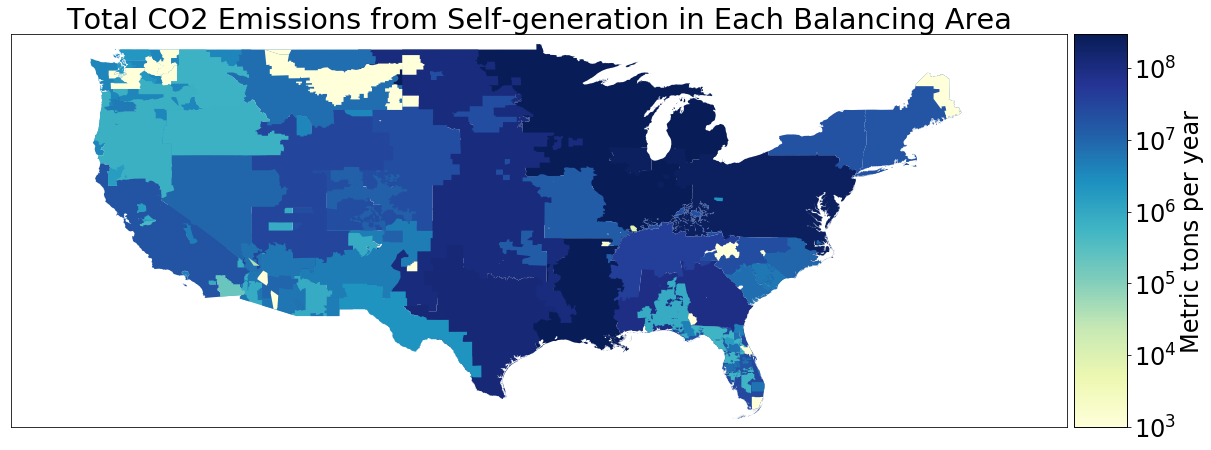

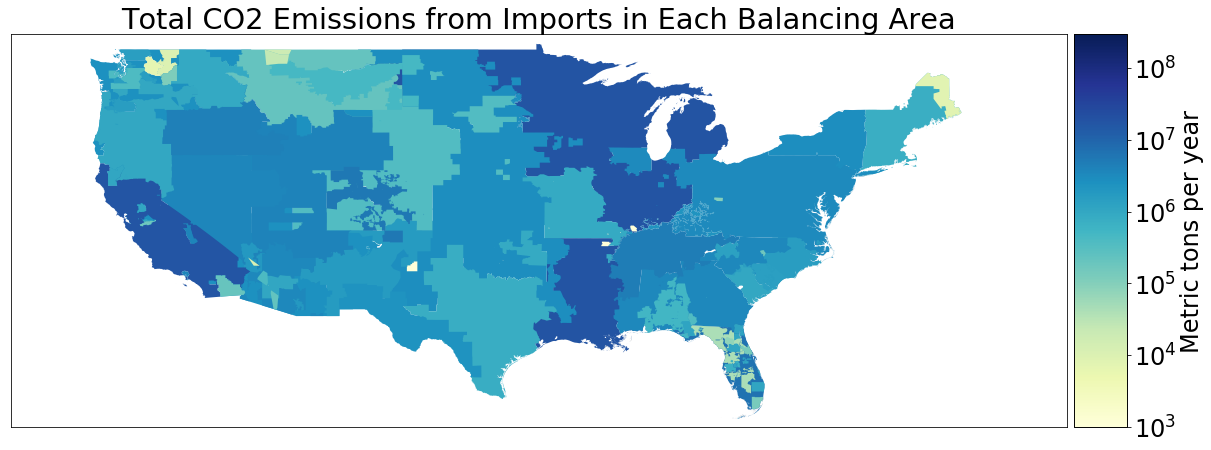

In [428]:
create_co2_map_log(CO2)

In [515]:
sum(total_imports_i_l["total_deaths"].values())/(sum(total_imports_i_l["total_deaths"].values())+sum(total_self_i_l["total_deaths"].values()))

0.07604690877687259

In [522]:
CO2_i_L["Imports"].sum()/(CO2_i_L["Imports"].sum()+CO2_i_L["Self-generation"].sum())

0.09450032786499911

In [106]:
(sum(total_imports_i_l["total_deaths"].values()) - sum(total_imports_i_l_coal2gasCCS["total_deaths"].values()))/sum(total_imports_i_l["total_deaths"].values())

0.7861849591829203

In [547]:
results_self_i_L_coalCCS["MISO"]["emissions"][2]

110656817.72231232

In [546]:
results_self_i_L["MISO"]["emissions"][2]

(283070.711641866,
 204418.44616291087,
 359679344.3429161,
 10638.08812091083,
 4025.0103760013735,
 3643.69362487231)

In [548]:
110656817.72231232/359679344.3429161

0.3076540798428858

In [605]:
results_self_i_L["CISO"]["results_county"]["Deaths"].sum()

55.88149930700095

In [554]:
with open("all_self_i_l",'rb') as f:
    all_BA_self_i_l = pickle.load(f)
with open("all_imports_i_l",'rb') as f:
    all_BA_imports_i_l = pickle.load(f)

In [563]:
(all_BA_self_i_l["results_county"]["Deaths"] - county_self_i_L["Deaths"]).max()

0.3390363854494183

In [556]:
county_self_i_L.head()

STATEFP     NAME GEOIDDeaths     Population  Deaths_pc  GEOID    Deaths
0        1  Autauga         NaN   58735.576661   1.999249   1001  1.174270
1        1  Baldwin         NaN  184975.920173   1.819512   1003  3.365659
2        1  Barbour         NaN   18932.865251   2.017903   1005  0.382047
3        1     Bibb         NaN   37231.491798   2.169430   1007  0.807711
4        1   Blount         NaN   66106.437398   3.167913   1009  2.094194

In [618]:
all_BA_self_i_l["results_county"][all_BA_self_i_l["results_county"]["STATEFP"]=="11"]

STATEFP                  NAME  GEOID     Deaths     Population  Deaths_pc
290      11  District of Columbia  11001  30.057829  644449.835652   4.664107

In [592]:
all_diff_self = {key: all_BA_self_i_l["results_county"]["Deaths"][key] - county_self_i_L["Deaths"].get(key, 1) 
                        for key in all_BA_self_i_l["results_county"]["Deaths"].keys()} 

all_diff_imports = {key: all_BA_imports_i_l["results_county"]["Deaths"][key] - county_imports_i_L["Deaths"].get(key, 1) 
                        for key in all_BA_imports_i_l["results_county"]["Deaths"].keys()} 

In [596]:
for key, value in all_diff_imports.items():
    if value > 0.002:
        print(key,value)

175 0.00222324177528499
291 0.002033222363027054
331 0.0029115356733839803
1014 0.0030445899081605887
2945 0.0025195884118476286


In [601]:
all_BA_imports_i_l["results_county"].loc[291,:]
#Biggest differences in self
#Hamilton County Ohio
#Jefferson County KY
#Harris County TX
#Caddo County, LA
#Kings County, NY
#New York County, New York
#Queens County, NY
# Gregg County, TX

#Big (small) difference in imports
#Jefferson County KY
#Marion County, FL
#Pierce County, WA
#Los Angeles County, CA
#Alachua County, FL










STATEFP                  12
NAME                Alachua
GEOID                 12001
Deaths             3.965522
Population    264069.462339
Deaths_pc          1.501697
Name: 291, dtype: object

In [615]:
df[(df.c1=="Baseline") & (df.c2 == "Self-generation")]["values"].sum()

8408.489731653926

In [116]:
sum(total_imports_a_l_coal2gasCCS["total_deaths"].values())

144.17444283446503